In [325]:
#importons les librairies principales pour le calcul et le nettoyage
import pandas as pd
import numpy as np

#Librairies visualisation:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec

#librairies statistiques
from scipy.optimize.lbfgsb import float64
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [326]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mission

Permettre aux managers de répondre aux questions:\
1-Quels sont les pays avec un fort potentiel de clients pour nos services ?\
2-Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?\
3-Dans quels pays l'entreprise doit-elle opérer en priorité ?

### les étapes à suivre:

1-Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)\
2-Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)\
3-Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)\
4-Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

# 1.Qualité du DataSet

   ##      1.1 Analyse du dataset : EdstatsCountry.csv

In [327]:
#Chargeons le fichier csv
df1 = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 2/EdStatsCountry.csv")

In [328]:
#vérifions que nous avons bien chargé les données:
df1.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   

            IMF data dissemination standard  Latest population census  \
0                                       NaN                      2010   
1  General Data Dissemination System (GDDS)                      1979   
2  General Data Dissemination System (GDDS)                      1970   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  

[3 rows x 32 columns]

In [329]:
df1.shape  #nombre de lignes et de colonnes 

(241, 32)

Nous avons 241 lignes et 32 colonnes

In [330]:
df1.dtypes # affichons les titres des colonnes ainsi que leur caracteristiques

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [331]:
df1.isnull().sum() # affichons les sommes des valeurs manquantes par colonne

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

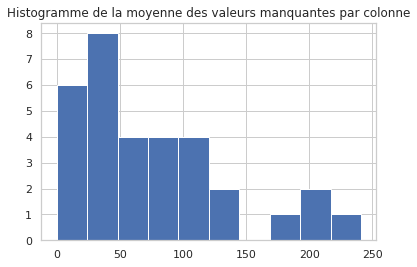

In [332]:
plt.hist(df1.isnull().sum()) # histogramme de la moyenne des valeurs manquantes (nan)
plt.title ("Histogramme de la moyenne des valeurs manquantes par colonne")
plt.show()

Nous remarquons que nous avons beaucoup de valeurs manquantes.
les colonnes avec le plus de valeurs manquantes sont :National accounts reference year(209),Alternative conversion factor(194) et Other groups(183).

  

In [333]:
df1.duplicated().sum() # verifions les valeurs dupliquées

0

Nous n'avons pas de valeurs dupliquées

## A retenir

**les colonnes qui pourraient servir plustard:**\


*   Country Code
*   Short Name
*   Table Name
*   Long Name
*   Region
*   Income Group




##      1.2 Analyse du dataset : EdstatsCountry-Series.csv

In [334]:
#Chargeons le fichier:
df2 = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 2/EdStatsCountry-Series.csv")
df2.head(2)  # vérifions que les données sont bien chargées

CountryCode   SeriesCode                                        DESCRIPTION  \
0         ABW  SP.POP.TOTL  Data sources : United Nations World Population...   
1         ABW  SP.POP.GROW  Data sources: United Nations World Population ...   

   Unnamed: 3  
0         NaN  
1         NaN

In [335]:
df2.shape #Nombre de lignes et de colonnes

(613, 4)

Nous avons 613 lignes et 4 colonnes

In [336]:
df2.isnull().sum() #somme des valeurs manquantes par colonne

CountryCode      0
SeriesCode       0
DESCRIPTION      0
Unnamed: 3     613
dtype: int64

In [337]:
df2.isnull().info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CountryCode  613 non-null    bool 
 1   SeriesCode   613 non-null    bool 
 2   DESCRIPTION  613 non-null    bool 
 3   Unnamed: 3   613 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


In [338]:
df2[df2.isna().any(axis=1)].count()

CountryCode    613
SeriesCode     613
DESCRIPTION    613
Unnamed: 3       0
dtype: int64

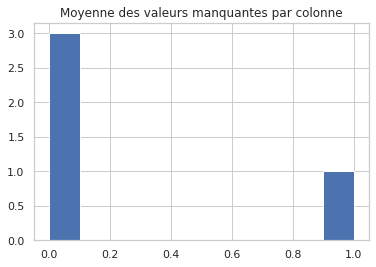

In [339]:
# Moyenne des valeurs manquantes
plt.hist(df2.isnull().mean()) # Moyenne des valeurs manquantes
plt.title('Moyenne des valeurs manquantes par colonne')

plt.show()

Pour ce dataframe nous n'avons pas de valeurs manquées. Sauf pour la colonne Unnamed 3.

In [340]:
df2.duplicated().sum() #somme des valeurs dupliquées

0

Nous n'avons pas de valeurs dupliquées

## A retenir

**Les colonnes qui pourraient servir plus tard:**\

*   CountryCode
*   SeriesCode


##     1.3 Analyse du dataset : EdstatsData.csv


In [341]:
#Chargeons le fichier:
df3 = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 2/EdStatsData.csv")
df3.head(3) # vérifions que les données sont bien chargées

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  ...  2060  2065  2070  2075  2080  2085  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN          NaN  

[3 rows x 70 columns]

In [342]:
df3.shape #nombre de lignes et de colonne

(886930, 70)

Nous avons 886930 lignes et 70 colonnes

In [343]:
df3.isnull().mean()  #Moyenne des valeurs manquantes par colonne

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

Text(0.5, 1.0, 'Moyenne des valeurs manquantes')

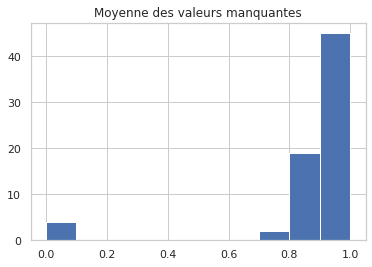

In [344]:
plt.hist(df3.isnull().mean())
plt.title('Moyenne des valeurs manquantes')

Nous avons beaucoup de valeurs manquantes. Nous avons plus de 20 colonnes avec plus de 80% de valeurs manquantes et plus de 48 colonnes avec plus de 90% de valeurs manquantes

In [345]:
df3.duplicated().mean()

0.0

Nous n'avons pas de lignes dupliquées.

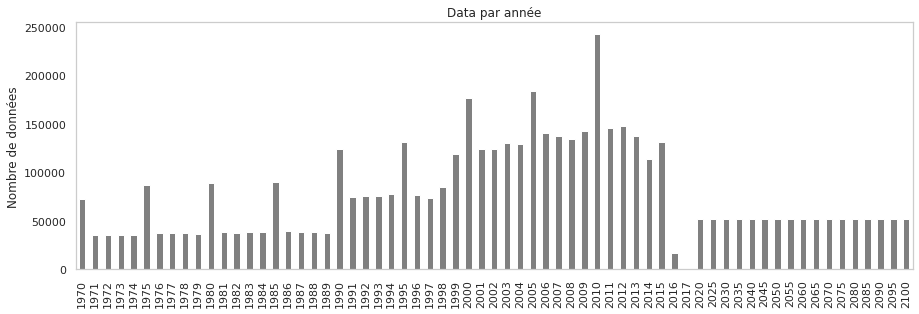

In [346]:
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)

ax1 = plt.subplot(G[0, :])

present = df3.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='grey')
ax1.set_title('Data par année')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)

plt.show()

## A retenir
 
**les colonnes qui pourraient servir plus tard:**



*   Country Code
*   Country Name
*   Indicator Name

Comme le montre le graphe ci_dessus: les années 2000 à 2015 vu qu'elles sont les plus remplies.

## 1.4 Analyse du dataset : EdstatsFootNote.csv


In [347]:
#Chargeons le fichier:
df4 = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 2/EdStatsFootNote.csv")
df4.head(2)  # vérifions que les données sont bien chargées

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN

In [348]:
df4.shape  #Nombre de lignes et de colonnes

(643638, 5)

Nous avons 643638 lignes et 5 colonnes

In [349]:
df4.isnull().sum() #somme des valeurs manquantes par colonne

CountryCode         0
SeriesCode          0
Year                0
DESCRIPTION         0
Unnamed: 4     643638
dtype: int64

Nous n'avons pas de valeurs manquantes (sauf pour la colonne Unnamed: 4)




In [350]:
df4.duplicated().sum()

0

Nous n'avons pas de valeurs dupliquées

## A retenir:
 
**les colonnes qui pourraient servir plus tard:**

*   Country Code
*   SeriesCode





## 1.5 Analyse du dataset : EdstatsSeries.csv


In [351]:
#Chargeons le fichier:
df5 = pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 2/EdStatsSeries.csv")
df5.head(2)  # vérifions que les données sont bien chargées

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  

[2 rows x 21 columns]

In [352]:
df5.shape #Nombre de lignes et de colonnes

(3665, 21)

Nous avons 3665 lignes et 21 colonnes

In [353]:
df5.isnull().sum() #somme des valeurs manquantes

Series Code                               0
Topic                                     0
Indicator Name                            0
Short definition                       1509
Long definition                           0
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Source                                    0
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

Text(0.5, 1.0, 'Moyenne des valeurs manquantes par colonne')

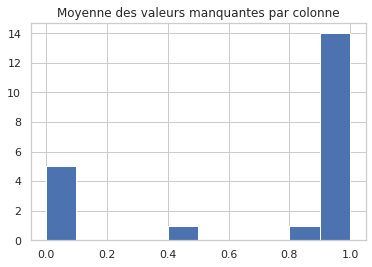

In [354]:
plt.hist(df5.isnull().mean())
plt.title("Moyenne des valeurs manquantes par colonne")

Nous avons beaucoup de valeurs manquantes.
Nous remarquons aussi que nous avons des colonnes sans valeurs manquantes mais qui vont nous aider avec notre analyse telle que **Series Code** ou **Indicator Name**. D'autres colonnes telle que unit of measure, other web links, related indicators ou license type sont vides.

In [355]:
df5.duplicated().sum()

0

Nous n'avons pas de lignes dupliquées.

## A retenir:
 
**les colonnes qui pourraient servir plus tard:**



*   SeriesCode
*   Indicator Name
*   Short definition
*   Long definition





# 2.Nettoyage 

Notre nettoyage va être orienté de facon à pouvoir rassembler les differents indicateurs pertinents et voir le comportement des courbes indicateurs / pays / année.

**Les étapes à suivre:**
 

1.  filtrer les indicateurs pour trouver les pertinents pour notre analyse

       a. Age entre 15 et 29 ans\
       b. Nombre étudiants scholarisés (high school et tertiary) \
       c. PIB \
       d. Accès à l'electricité, internet et matériel.
2.   Nettoyer la liste "Country Code" et retirer les non pays.
3.   Limiter l'analyse aux années 2005 à 2017



## 2.1 Nettoyage des dataframes 

### 2.1.1 Nettoyage du dataframe EdStatsCountry.csv ici appelé df1

In [356]:
# Affichons les colonnes du dataframe et leurs types
df1.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

**De ce dataframe, nous gardons les colonnes "Country Name", "Short Name" et "Income Group"**



In [357]:
df1["Income Group"].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Nombre de pays selon Income Group')

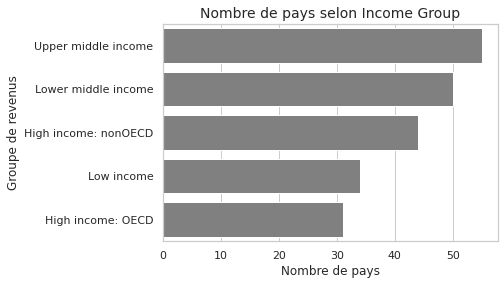

In [358]:
# Regroupons les pays selon "Income Group"

nb_pays_par_groupe_revenu=df1.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)

sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'], color='grey')
plt.xlabel('Nombre de pays', fontsize=12) # Titre des abscisses
plt.ylabel('Groupe de revenus', fontsize=12)  # Titre des ordonnés
plt.title('Nombre de pays selon Income Group', fontsize=14)#Titre du graphe


**=> Nous avons deux indicateurs "High Income":OECD et nonOECD, ce qui représente le classement modial de l'education.**


In [359]:
#Recupérons les données des pays High Income
high_Income_Countries = df1.loc[(df1["Income Group"] == 'High income: OECD')|(df1["Income Group"] == 'High income: nonOECD')] 
high_Income_Countries['Short Name'].nunique()

75

In [360]:
high_Income_Countries

Country Code                Short Name                Table Name  \
0            ABW                     Aruba                     Aruba   
4            AND                   Andorra                   Andorra   
6            ARE      United Arab Emirates      United Arab Emirates   
10           ATG       Antigua and Barbuda       Antigua and Barbuda   
11           AUS                 Australia                 Australia   
..           ...                       ...                       ...   
210          TCA  Turks and Caicos Islands  Turks and Caicos Islands   
218          TTO       Trinidad and Tobago       Trinidad and Tobago   
226          URY                   Uruguay                   Uruguay   
227          USA             United States             United States   
231          VIR            Virgin Islands     Virgin Islands (U.S.)   

                               Long Name 2-alpha code  \
0                                  Aruba           AW   
4                Principality of Andorra           AD   
6                   United Arab Emirates           AE   
10                   Antigua and Barbuda           AG   
11             Commonwealth of Australia           AU   
..                                   ...          ...   
210             Turks and Caicos Islands           TC   
218      Republic of Trinidad and Tobago           TT   
226         Oriental Republic of Uruguay           UY   
227             United States of America           US   
231  Virgin Islands of the United States           VI   

                  Currency Unit  \
0                 Aruban florin   
4                          Euro   
6                 U.A.E. dirham   
10        East Caribbean dollar   
11            Australian dollar   
..                          ...   
210                 U.S. dollar   
218  Trinidad and Tobago dollar   
226              Uruguayan peso   
227                 U.S. dollar   
231                 U.S. dollar   

                                         Special Notes  \
0    SNA data for 2000-2011 are updated from offici...   
4                                                  NaN   
6    April 2013 database update: Based on data from...   
10   April 2012 database update: Based on official ...   
11   Fiscal year end: June 30; reporting period for...   
..                                                 ...   
210                                                NaN   
218                                                NaN   
226  In 2011, the Central Bank revised national acc...   
227  Fiscal year end: September 30; reporting perio...   
231                                                NaN   

                         Region          Income Group WB-2 code  ...  \
0     Latin America & Caribbean  High income: nonOECD        AW  ...   
4         Europe & Central Asia  High income: nonOECD        AD  ...   
6    Middle East & North Africa  High income: nonOECD        AE  ...   
10    Latin America & Caribbean  High income: nonOECD        AG  ...   
11          East Asia & Pacific     High income: OECD        AU  ...   
..                          ...                   ...       ...  ...   
210   Latin America & Caribbean  High income: nonOECD        TC  ...   
218   Latin America & Caribbean  High income: nonOECD        TT  ...   
226   Latin America & Caribbean  High income: nonOECD        UY  ...   
227               North America     High income: OECD        US  ...   
231   Latin America & Caribbean  High income: nonOECD        VI  ...   

                IMF data dissemination standard  \
0                                           NaN   
4                                           NaN   
6      General Data Dissemination System (GDDS)   
10     General Data Dissemination System (GDDS)   
11   Special Data Dissemination Standard (SDDS)   
..                                          ...   
210                                         NaN   
218    General Data Dissemination System (GDDS)   
226  Special

Nous manquons trois pays importants qui ont un high Income mais vu lancienne version du data set n'y figurent pas.

Nous allons alors les rajouter manuellement

Il s'agit du Brésil, la Chine et l'Inde

In [361]:
# Récuperons les donées du Brésil
brazil = df1[ df1['Short Name'] == 'Brazil']

# les donées de l'Inde
india = df1[ df1['Short Name'] == 'India']

# et enfin celles de la Chine
china = df1[ df1['Short Name'] == 'China']

# Créons un dataframe des 3 pays :
h3= china.append((brazil, india), ignore_index=True)

In [362]:
#Vérifions que nous avons bien recupére les 3 pays
h3['Short Name'].unique()

array(['China', 'Brazil', 'India'], dtype=object)

In [363]:
high_Income_Countries = high_Income_Countries.append(h3, ignore_index = True)
high_Income_Countries["Short Name"].unique()


array(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'The Bahamas',
       'Bermuda', 'Barbados', 'Brunei', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'Faeroe Islands', 'United Kingdom',
       'Equatorial Guinea', 'Greece', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Croatia', 'Isle of Man', 'Ireland',
       'Iceland', 'Israel', 'Italy', 'Japan', 'St. Kitts and Nevis',
       'Korea', 'Kuwait', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco',
       'Malta', 'Northern Mariana Islands', 'New Caledonia',
       'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Poland',
       'Puerto Rico', 'Portugal', 'French Polynesia', 'Qatar', 'Russia',
       'Saudi Arabia', 'Singapore', 'San Marino'

## **Conclusion**

Nous avons pu récuperer la liste des pays avec un grand Income, nous continuons notre analyse avec cette liste
         

## 2.1.2 Nettoyage du dataframe EdStatsData.csv ici appelé df3

Precedement nous avons decidé de garder les années 2015 à 2020

In [364]:
df3.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [365]:
len(df3.columns)

70

In [366]:
#Supprimons les colonnes 1970 à 2014
annees_a_supprimer = ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2025', '2030', '2035', '2040', '2045', '2050', '2055',
       '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100', '2016','2017','2020' ]

In [367]:
len(annees_a_supprimer)

49

In [368]:
#on supprime les colonnes faisant partie de la liste annees à supprimer
for col in df3.columns:
      if col in annees_a_supprimer:
       del df3[col]


In [369]:
df3.shape

(886930, 21)

Nous sommes passé d'un dataframe df3 avec 70 colonnes à df3 avec 24 colonnes


In [370]:
#liste faisant partie du dataset representant des zones geographiques et non des pays
not_country = ["EMU", "EAS", "ARB", "OEC", "OED", "OSS", "PSS", "SST", "SAS", "SSF", "SSA","UMC", "WLD",
               "EAP", "EAS", "CEB", "CSS", "ECS",  "HIC", "ECA", "EUU", "FCS", "HPC", "NOC", "LCN", "LAC", "LDC",
               "LMY", "LIC", "LMC", "MEA", "MNA", "MIC","NAC"]

In [371]:
# Retirons les lignes ne representant pas des pays

df3 = df3[~df3['Country Code'].isin(not_country)]



In [372]:
df3.shape

(795305, 21)

In [373]:
# nombre d'indicateur par pays
df3.groupby('Country Code')['Indicator Name'].count()


Country Code
ABW    3665
AFG    3665
AGO    3665
ALB    3665
AND    3665
       ... 
XKX    3665
YEM    3665
ZAF    3665
ZMB    3665
ZWE    3665
Name: Indicator Name, Length: 217, dtype: int64

## 2.1.2 Nettoyage du dataframe EdStatsSeries.csv ici appelé df5

In [374]:
df5.columns #les colonnes de notre dataframe

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [375]:
#nous retirons les colonnes dont nous allons pas nous servir 
df5.drop(['Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'], axis =1)

Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                                                 ...   
3660  Government expenditure per upper secondary stu...   
3661  Government expenditure per post-secondary non-...   
3662  Government expenditure per tertiary student (c...   
3663  Government expenditure in secondary institutio...   
3664  Government expenditure in tertiary institution...   

                                       Short definition  \
0     Percentage of female population age 15-19 with...   
1     Percentage of population age 15-19 with no edu...   
2     Percentage of female population age 15+ with n...   
3     Percentage of population age 15+ with no educa...   
4     Percentage of female population age 20-24 with...   
...                                                 ...   
3660                                                NaN   
3661                                                NaN   
3662                                                NaN   
3663  Total general (local, regional and central) go...   
3664  Total general (local, regional and central) go...   

                                        Long definition  
0     Percentage of female population age 15-19 with...  
1     Percentage of population age 15-19 with no edu...  
2     Percentage of female population age 15+ with n...  
3     Percentage of population age 15+ with no educa...  
4     Percentage of female population age 20-24 with...  
...                                                 ...  
3660  Average total (current, capital and transfers)...  
3661  Average total (current, capital and transfers)...  
3662  Average total (current, capital and transfers)...  
3663  Total general (local, regional and central) go...  
3664  Total general (local, regional and central) go...  

[3665 rows x 5 columns]

On passe d'un df5 avec 21 colonnes à un df5 avec 5 colonnes

In [376]:
df5['Indicator Name'].duplicated().sum()

0

In [377]:
len(df5['Indicator Name'])

3665

Nous remarquons que dans les deux dataframe, df3 et df5 nous avons le meme nombre d'Indicator name.

Verifions si nous avons les memes indicateurs dans les deux dataframe

## 2.2  Exploration

In [378]:
#Les indicateurs dans df5 et non dans df3
df5[~df5['Indicator Name'].isin(df3['Indicator Name'])][['Indicator Name']].sort_values(by = 'Indicator Name')

Indicator Name
2511              Age population, age 0, female, UNESCO
2513               Age population, age 0, total, UNESCO
2514             Age population, age 01, female, UNESCO
2516              Age population, age 01, total, UNESCO
2517             Age population, age 02, female, UNESCO
...                                                 ...
2396  Share of youth not in education, employment or...
2397  Share of youth not in education, employment or...
2398  Unemployment, female (% of female labor force)...
2399  Unemployment, male (% of male labor force) (mo...
2400  Unemployment, total (% of total labor force) (...

[462 rows x 1 columns]

In [379]:
#Les indicateurs dans df3 et non dans df5
df3[~df3['Indicator Name'].isin(df5['Indicator Name'])][['Indicator Name']].sort_values(by = 'Indicator Name')

Indicator Name
92867            GDP at market prices (constant 2005 US$)
265122           GDP at market prices (constant 2005 US$)
682932           GDP at market prices (constant 2005 US$)
298107           GDP at market prices (constant 2005 US$)
323762           GDP at market prices (constant 2005 US$)
...                                                   ...
263871  Wittgenstein Projection: Population in thousan...
714666  Wittgenstein Projection: Population in thousan...
260206  Wittgenstein Projection: Population in thousan...
355496  Wittgenstein Projection: Population in thousan...
886921  Wittgenstein Projection: Population in thousan...

[100254 rows x 1 columns]

il y'a 461 indicateurs non presents dans df3.

In [380]:
df = pd.merge(df3,df5, how = 'outer', on = 'Indicator Name' )

In [381]:
df5['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

# 3.Etude Exploratoire par indicateur 

In [382]:
#vérifions notre dataframe
df.head(3)

Country Name Country Code  \
0  Afghanistan          AFG   
1      Albania          ALB   
2      Algeria          DZA   

                                      Indicator Name Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
2  Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   

        2000      2001  2002  2003  2004  2005  ...  \
0        NaN       NaN   NaN   NaN   NaN   NaN  ...   
1  84.558281  85.30661   NaN   NaN   NaN   NaN  ...   
2        NaN       NaN   NaN   NaN   NaN   NaN  ...   

   Notes from original source  General comments  \
0                         NaN               NaN   
1                         NaN               NaN   
2                         NaN               NaN   

                            Source  Statistical concept and methodology  \
0  UNESCO Institute for Statistics                                  NaN   
1  UNESCO Institute for Statistics                                  NaN   
2  UNESCO Institute for Statistics                                  NaN   

   Development relevance  Related source links  Other web links  \
0                    NaN                   NaN              NaN   
1                    NaN                   NaN              NaN   
2                    NaN                   NaN              NaN   

   Related indicators  License Type  Unnamed: 20  
0                 NaN           NaN          NaN  
1                 NaN           NaN          NaN  
2                 NaN           NaN          NaN  

[3 rows x 41 columns]

In [383]:
#affichons les colonnes de notre dataframe
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Unnamed: 69',
       'Series Code', 'Topic', 'Short definition', 'Long definition',
       'Unit of measure', 'Periodicity', 'Base Period', 'Other notes',
       'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [384]:
# On supprime les colonnes dont nous n'allons pas nous servir
df.drop(['Unnamed: 69', 'Series Code', 'Topic', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20','Indicator Code','Country Name' ], axis =1)


Country Code                                     Indicator Name  \
0               AFG  Adjusted net enrolment rate, lower secondary, ...   
1               ALB  Adjusted net enrolment rate, lower secondary, ...   
2               DZA  Adjusted net enrolment rate, lower secondary, ...   
3               ASM  Adjusted net enrolment rate, lower secondary, ...   
4               AND  Adjusted net enrolment rate, lower secondary, ...   
...             ...                                                ...   
795762          NaN              Age population, age 23, total, UNESCO   
795763          NaN             Age population, age 24, female, UNESCO   
795764          NaN              Age population, age 24, total, UNESCO   
795765          NaN             Age population, age 25, female, UNESCO   
795766          NaN              Age population, age 25, total, UNESCO   

             2000      2001  2002  2003  2004  2005  2006      2007  2008  \
0             NaN       NaN   NaN   NaN   NaN   NaN   NaN  28.05987   NaN   
1       84.558281  85.30661   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
2             NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
3             NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
4             NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
...           ...       ...   ...   ...   ...   ...   ...       ...   ...   
795762        NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
795763        NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
795764        NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
795765        NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   
795766        NaN       NaN   NaN   NaN   NaN   NaN   NaN       NaN   NaN   

        2009  2010  2011  2012       2013       2014  2015  
0        NaN   NaN   NaN   NaN  47.436790  50.627232   NaN  
1        NaN   NaN   NaN   NaN  87.666588  88.778252   NaN  
2        NaN   NaN   NaN   NaN        NaN        NaN   NaN  
3        NaN   NaN   NaN   NaN        NaN        NaN   NaN  
4        NaN   NaN   NaN   NaN        NaN        NaN   NaN  
...      ...   ...   ...   ...        ...        ...   ...  
795762   NaN   NaN   NaN   NaN        NaN        NaN   NaN  
795763   NaN   NaN   NaN   NaN        NaN        NaN   NaN  
795764   NaN   NaN   NaN   NaN        NaN        NaN   NaN  
795765   NaN   NaN   NaN   NaN        NaN        NaN   NaN  
795766   NaN   NaN   NaN   NaN        NaN        NaN   NaN  

[795767 rows x 18 columns]

In [385]:
liste_pays =( high_Income_Countries ["Short Name"].unique())
liste_pays

array(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'The Bahamas',
       'Bermuda', 'Barbados', 'Brunei', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curaçao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'Faeroe Islands', 'United Kingdom',
       'Equatorial Guinea', 'Greece', 'Greenland', 'Guam',
       'Hong Kong SAR, China', 'Croatia', 'Isle of Man', 'Ireland',
       'Iceland', 'Israel', 'Italy', 'Japan', 'St. Kitts and Nevis',
       'Korea', 'Kuwait', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Latvia', 'Macao SAR, China', 'St. Martin (French part)', 'Monaco',
       'Malta', 'Northern Mariana Islands', 'New Caledonia',
       'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Poland',
       'Puerto Rico', 'Portugal', 'French Polynesia', 'Qatar', 'Russia',
       'Saudi Arabia', 'Singapore', 'San Marino'

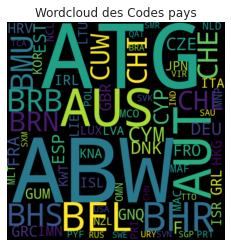

In [386]:
# Présentons un wordcloud des codes pays
text = ('ABW AND ARE ATG AUS AUT BEL BHR BHS BMU BRB BRN CAN CHE CHI CHL CUW CYM CYP CZE DEU DNK ESP EST F IN FRA FRO GBR GNQ GRC GRL GUM HKG HRV IMN IRL ISL ISR ITA JPN KNA KOR KWT LIE LTU LUX LVA MAC MAF MCO MLT MNP NCL NLD NOR NZL OMN POL PRI PRT PYF QAT RUS SAU SGP SMR SVK SVN SWE SXM TCA TTO URY USA VIR CHN BRA IND')
wordcloud = WordCloud(width=800, height =800, margin=0).generate(text)


plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("OFF")
plt.title("Wordcloud des Codes pays")
plt.show()

In [387]:
high_Income_Countries.head(1)

Country Code Short Name Table Name Long Name 2-alpha code  Currency Unit  \
0          ABW      Aruba      Aruba     Aruba           AW  Aruban florin   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   

  IMF data dissemination standard  Latest population census  \
0                             NaN                      2010   

  Latest household survey Source of most recent Income and expenditure data  \
0                     NaN                                               NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   

  Unnamed: 31  
0         NaN  

[1 rows x 32 columns]

Notre nouveau dataframe:

In [388]:
data = pd.merge(high_Income_Countries, df, on ='Country Code')
data.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31', 'Country Name',
       'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '20

In [389]:
#Supprimons les colonnes dont on a pas besoin
data = data.drop(['Short Name','Indicator Code','Table Name', 'Long Name', '2-alpha code','Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code','National accounts base year', 'National accounts reference year','SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor','PPP survey year', 'Balance of Payments Manual in use','External debt Reporting status', 'System of trade','Government Accounting concept', 'IMF data dissemination standard','Latest population census', 'Latest household survey','Source of most recent Income and expenditure data','Vital registration complete', 'Latest agricultural census','Latest industrial data', 'Latest trade data','Latest water withdrawal data', 'Unnamed: 31', 'Unnamed: 69', 'Series Code', 'Topic','Short definition', 'Long definition', 'Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source','General comments', 'Source', 'Statistical concept and methodology','Development relevance', 'Related source links', 'Other web links','Related indicators', 'License Type', 'Unnamed: 20'], axis=1)

In [390]:
data.head(2)

Country Code Country Name  \
0          ABW        Aruba   
1          ABW        Aruba   

                                      Indicator Name       2000       2001  \
0  Adjusted net enrolment rate, lower secondary, ...  56.156502  45.716419   
1  Adjusted net enrolment rate, lower secondary, ...  59.691120  49.288391   

        2002       2003       2004       2005  2006       2007       2008  \
0  52.996460  49.965080  53.096840  59.058441   NaN  60.718788  60.643719   
1  59.051239  58.223461  57.107738  62.097809   NaN  65.384621  65.938301   

        2009  2010       2011  2012  2013  2014  2015  
0  62.808041   NaN  78.047157   NaN   NaN   NaN   NaN  
1  68.178833   NaN  82.111633   NaN   NaN   NaN   NaN

In [391]:
# données statistiques
data.describe()


2000          2001          2002          2003          2004  \
count  5.883000e+04  3.940100e+04  3.990300e+04  4.472000e+04  4.122100e+04   
mean   3.861496e+09  5.916741e+09  6.054096e+09  5.744953e+09  6.710900e+09   
std    1.357961e+11  1.694965e+11  1.732334e+11  1.714662e+11  1.898578e+11   
min   -6.759300e+04 -6.973700e+04 -9.214300e+04 -1.111860e+05 -1.262600e+05   
25%    6.086475e+00  1.500000e+01  1.452525e+01  1.397662e+01  1.282774e+01   
50%    4.873109e+01  4.502610e+02  4.230000e+02  1.301257e+02  1.300000e+02   
75%    1.243550e+04  6.548900e+04  6.516100e+04  4.588674e+04  5.881200e+04   
max    1.297554e+13  1.310217e+13  1.333620e+13  1.371051e+13  1.422956e+13   

               2005          2006          2007          2008          2009  \
count  6.092500e+04  4.566400e+04  4.445700e+04  4.309800e+04  4.831900e+04   
mean   4.819135e+09  6.887431e+09  7.622854e+09  8.269223e+09  7.256672e+09   
std    1.651907e+11  2.022858e+11  2.165560e+11  2.276846e+11  2.146698e+11   
min   -1.347240e+05 -3.708940e+05 -3.882170e+05 -4.088540e+05 -4.561240e+05   
25%    5.940000e+00  1.171821e+01  1.100080e+01  1.067812e+01  9.621410e+00   
50%    4.794000e+01  9.986211e+01  9.970543e+01  9.969348e+01  9.653125e+01   
75%    1.197800e+04  4.307375e+04  5.097400e+04  5.444650e+04  3.840590e+04   
max    1.470557e+13  1.509771e+13  1.536623e+13  1.532142e+13  1.489617e+13   

               2010          2011          2012          2013          2014  \
count  8.003800e+04  4.810200e+04  4.952100e+04  4.334900e+04  3.531600e+04   
mean   4.660163e+09  8.295127e+09  8.327290e+09  9.861065e+09  1.254467e+10   
std    1.768640e+11  2.422621e+11  2.507726e+11  2.797148e+11  3.261014e+11   
min   -4.969050e+05 -5.709940e+05 -6.049930e+05 -6.157480e+05 -1.956178e+00   
25%    1.231823e+00  1.123756e+01  9.827510e+00  1.228647e+01  1.439192e+01   
50%    1.752853e+01  9.873050e+01  9.692077e+01  1.003336e+02  1.000000e+02   
75%    1.444580e+03  3.927950e+04  3.471500e+04  6.270700e+04  6.583333e+04   
max    1.527333e+13  1.580290e+13  1.659608e+13  1.707372e+13  1.835893e+13   

               2015  
count  4.558500e+04  
mean   9.818894e+09  
std    2.990435e+11  
min   -1.760677e+00  
25%    4.400000e-01  
50%    3.719362e+01  
75%    2.507681e+04  
max    1.985273e+13

In [392]:
data['Country Name'].unique()

array(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'Bahamas, The',
       'Bermuda', 'Barbados', 'Brunei Darussalam', 'Canada',
       'Switzerland', 'Channel Islands', 'Chile', 'Curacao',
       'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Denmark',
       'Spain', 'Estonia', 'Finland', 'France', 'Faroe Islands',
       'United Kingdom', 'Equatorial Guinea', 'Greece', 'Greenland',
       'Guam', 'Hong Kong SAR, China', 'Croatia', 'Isle of Man',
       'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Monaco', 'Malta',
       'Northern Mariana Islands', 'New Caledonia', 'Netherlands',
       'Norway', 'New Zealand', 'Oman', 'Poland', 'Puerto Rico',
       'Portugal', 'French Polynesia', 'Qatar', 'Russian Federation',
       'Saud

## **3.1 Indicateur : GDP (PIB)**


In [393]:
# Le Pib nous permet d'avoir une idee sur la richesse d'un pays. 
## Dans notre set le code indicateur est NY.GDP.MKTP.PP.CD

data_gpd = data[data['Indicator Name'] ==  "GDP per capita (current US$)"]
data_gpd.head(3)

Country Code          Country Name                Indicator Name  \
1245          ABW                 Aruba  GDP per capita (current US$)   
4910          AND               Andorra  GDP per capita (current US$)   
8575          ARE  United Arab Emirates  GDP per capita (current US$)   

              2000          2001          2002          2003          2004  \
1245  20620.700626  20670.655664  20434.299436  20834.510199  22567.824925   
4910  21936.530101  22228.846493  24741.493570  32776.442270  38503.479614   
8575  33071.268687  31061.529345  31311.359356  33230.523181  36161.170607   

              2005          2006          2007          2008          2009  \
1245  23302.831988  24014.944267  25921.026052  27546.899390  24631.434860   
4910  41282.020122  43748.772159  48582.808455  47785.659086  43339.379875   
8575  39439.801968  42372.221662  42672.613229  45758.905536  33072.575166   

              2010          2011          2012          2013          2014  \
1245  24271.940421  25324.720362           NaN           NaN           NaN   
4910  39736.354063  41098.766942  38391.080867  40619.711298  42294.994727   
8575  35049.148317  40462.312089  42112.235647  43350.642681  44449.740349   

              2015  
1245           NaN  
4910  36038.267604  
8575  39101.746890

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


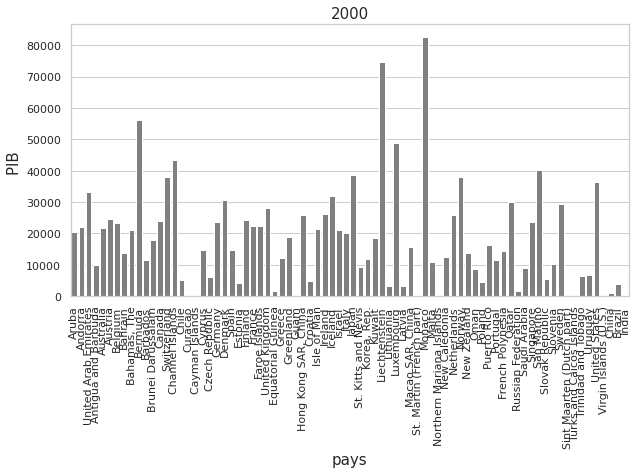

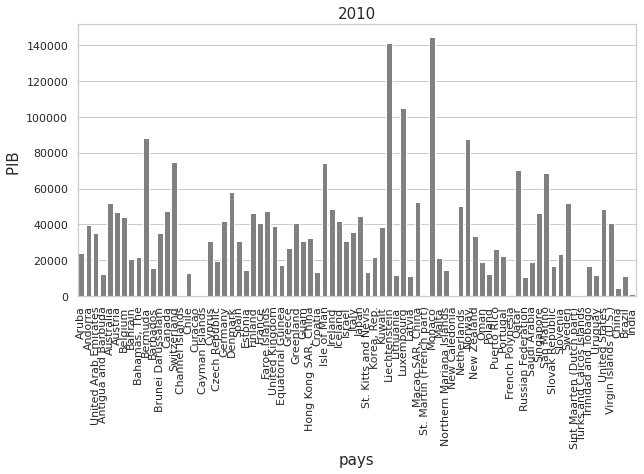

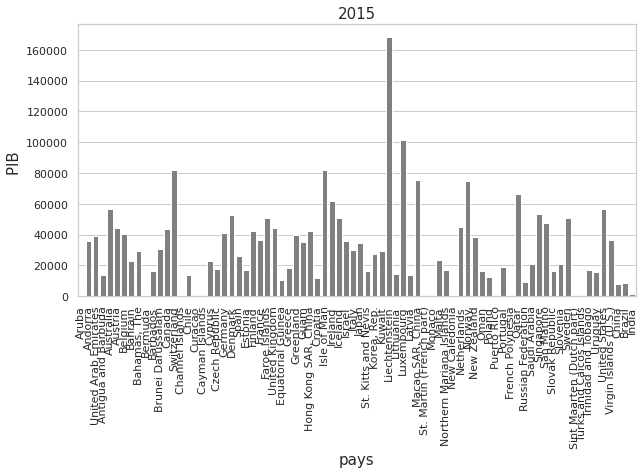

In [394]:
# Affichons les données selon les années 2000, 2010 et  2015

for x in [ '2000', '2010', '2015'] :
   if x in [ '2000', '2010', '2015']:
      fig, ax = plt.subplots(figsize=(10,5))
      plt.setp(ax.get_xticklabels(), rotation=90)
      sns.barplot(data_gpd['Country Name'], data_gpd[x], color='grey')
      plt.xlabel('pays', fontsize=15) # Titre des abscisses
      plt.ylabel('PIB ', fontsize=15)  # Titre des ordonnés
      plt.title(x, fontsize=15)
plt.show()

In [395]:
data_gpd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 1245 to 283450
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    78 non-null     object 
 1   Country Name    78 non-null     object 
 2   Indicator Name  78 non-null     object 
 3   2000            70 non-null     float64
 4   2001            68 non-null     float64
 5   2002            71 non-null     float64
 6   2003            71 non-null     float64
 7   2004            71 non-null     float64
 8   2005            71 non-null     float64
 9   2006            72 non-null     float64
 10  2007            71 non-null     float64
 11  2008            70 non-null     float64
 12  2009            70 non-null     float64
 13  2010            70 non-null     float64
 14  2011            70 non-null     float64
 15  2012            68 non-null     float64
 16  2013            68 non-null     float64
 17  2014            66 non-null   

In [396]:
# valeurs statistiques

data_gpd.describe()

2000          2001          2002           2003           2004  \
count     70.000000     68.000000     71.000000      71.000000      71.000000   
mean   20415.109589  20482.994327  21898.657739   25345.089964   28870.148459   
std    15814.039428  15905.420045  16740.851855   19658.730505   22153.644575   
min      438.864630    447.013897    466.200804     541.135228     621.318377   
25%     9433.823544   9221.493945   9900.668116    9824.785307   11412.347353   
50%    18696.745810  19396.657507  20081.817626   22009.200433   24918.645842   
75%    25880.011900  26680.402412  29194.513836   33023.342030   37662.417035   
max    82534.873767  82552.567453  89061.050666  108978.489682  123382.014903   

                2005           2006           2007           2008  \
count      71.000000      72.000000      71.000000      70.000000   
mean    31107.411327   34059.074883   38666.407935   41444.324046   
std     23124.716430   24961.108782   29565.826811   32190.962681   
min       707.008019     792.025970    1018.166373     991.484630   
25%     13543.002918   15296.911468   16501.173244   20620.009237   
50%     26510.717453   29231.231979   32672.367171   35485.007409   
75%     40296.929251   43548.962613   48175.043380   49746.046416   
max    126655.598082  135535.002415  170156.694368  192989.189527   

                2009           2010           2011           2012  \
count      70.000000      70.000000      70.000000      68.000000   
mean    36396.204447   37834.316889   41640.845486   39454.099120   
std     27228.602053   27791.895415   30966.247155   26811.724670   
min      1090.317765    1345.770153    1461.671957    1446.985410   
25%     16517.288822   17667.231071   21102.471812   19585.416135   
50%     31401.578142   33120.673300   36738.585892   35760.949673   
75%     44495.274733   47262.938011   51228.899841   49251.757374   
max    152111.598027  144246.368775  162009.877819  149295.646044   

                2013           2014           2015  
count      68.000000      66.000000      66.000000  
mean    40893.072217   40959.237182   36270.514978  
std     29062.991421   29638.574624   26513.778698  
min      1452.195373    1573.118089    1596.470003  
25%     19838.961236   19430.097692   17054.401994  
50%     36114.433188   36468.308770   32721.013933  
75%     51695.984029   52051.425632   44636.139194  
max    173528.150454  179308.075616  168146.015281

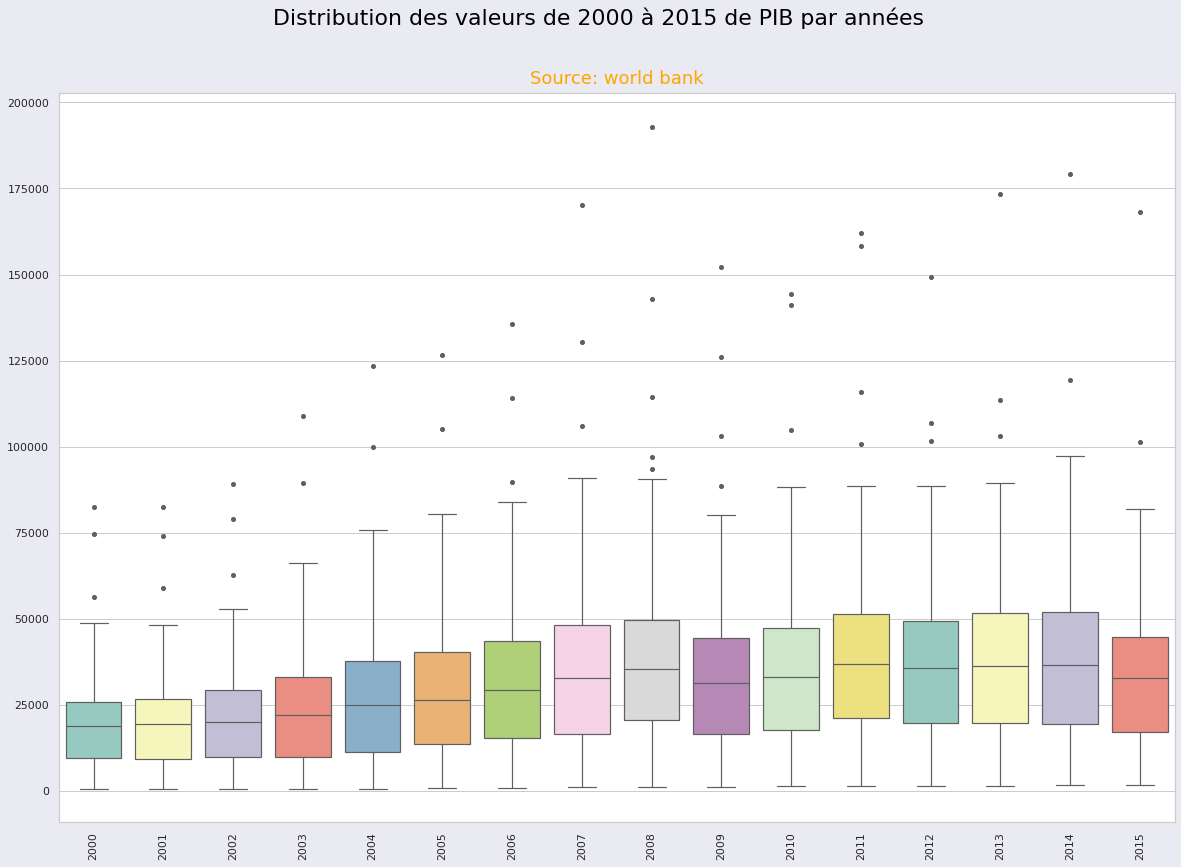

In [397]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

x = sns.boxplot(data=data_gpd,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=90)
title = 'Distribution des valeurs de 2000 à 2015 de PIB par années'
fig.suptitle(title, y=0.88, fontsize=22, color='Black')
subtitle = 'Source: world bank'
plt.title(subtitle, fontsize=18, pad=10, color='orange')
plt.subplots_adjust(top=0.80)

In [398]:
data_gpd2 = data_gpd.drop(['Country Code', 'Indicator Name'], axis=1)

data_gpd2.head(2)

Country Name          2000          2001          2002          2003  \
1245        Aruba  20620.700626  20670.655664  20434.299436  20834.510199   
4910      Andorra  21936.530101  22228.846493  24741.493570  32776.442270   

              2004          2005          2006          2007          2008  \
1245  22567.824925  23302.831988  24014.944267  25921.026052  27546.899390   
4910  38503.479614  41282.020122  43748.772159  48582.808455  47785.659086   

              2009          2010          2011          2012          2013  \
1245  24631.434860  24271.940421  25324.720362           NaN           NaN   
4910  43339.379875  39736.354063  41098.766942  38391.080867  40619.711298   

              2014          2015  
1245           NaN           NaN  
4910  42294.994727  36038.267604

In [399]:
data_gpd2.describe()

2000          2001          2002           2003           2004  \
count     70.000000     68.000000     71.000000      71.000000      71.000000   
mean   20415.109589  20482.994327  21898.657739   25345.089964   28870.148459   
std    15814.039428  15905.420045  16740.851855   19658.730505   22153.644575   
min      438.864630    447.013897    466.200804     541.135228     621.318377   
25%     9433.823544   9221.493945   9900.668116    9824.785307   11412.347353   
50%    18696.745810  19396.657507  20081.817626   22009.200433   24918.645842   
75%    25880.011900  26680.402412  29194.513836   33023.342030   37662.417035   
max    82534.873767  82552.567453  89061.050666  108978.489682  123382.014903   

                2005           2006           2007           2008  \
count      71.000000      72.000000      71.000000      70.000000   
mean    31107.411327   34059.074883   38666.407935   41444.324046   
std     23124.716430   24961.108782   29565.826811   32190.962681   
min       707.008019     792.025970    1018.166373     991.484630   
25%     13543.002918   15296.911468   16501.173244   20620.009237   
50%     26510.717453   29231.231979   32672.367171   35485.007409   
75%     40296.929251   43548.962613   48175.043380   49746.046416   
max    126655.598082  135535.002415  170156.694368  192989.189527   

                2009           2010           2011           2012  \
count      70.000000      70.000000      70.000000      68.000000   
mean    36396.204447   37834.316889   41640.845486   39454.099120   
std     27228.602053   27791.895415   30966.247155   26811.724670   
min      1090.317765    1345.770153    1461.671957    1446.985410   
25%     16517.288822   17667.231071   21102.471812   19585.416135   
50%     31401.578142   33120.673300   36738.585892   35760.949673   
75%     44495.274733   47262.938011   51228.899841   49251.757374   
max    152111.598027  144246.368775  162009.877819  149295.646044   

                2013           2014           2015  
count      68.000000      66.000000      66.000000  
mean    40893.072217   40959.237182   36270.514978  
std     29062.991421   29638.574624   26513.778698  
min      1452.195373    1573.118089    1596.470003  
25%     19838.961236   19430.097692   17054.401994  
50%     36114.433188   36468.308770   32721.013933  
75%     51695.984029   52051.425632   44636.139194  
max    173528.150454  179308.075616  168146.015281

In [400]:
data_gpd.shape


(78, 19)

In [401]:
data_gpd2 = data_gpd2.iloc[ :, 1:]
data_gpd2.head(2)

2000          2001          2002          2003          2004  \
1245  20620.700626  20670.655664  20434.299436  20834.510199  22567.824925   
4910  21936.530101  22228.846493  24741.493570  32776.442270  38503.479614   

              2005          2006          2007          2008          2009  \
1245  23302.831988  24014.944267  25921.026052  27546.899390  24631.434860   
4910  41282.020122  43748.772159  48582.808455  47785.659086  43339.379875   

              2010          2011          2012          2013          2014  \
1245  24271.940421  25324.720362           NaN           NaN           NaN   
4910  39736.354063  41098.766942  38391.080867  40619.711298  42294.994727   

              2015  
1245           NaN  
4910  36038.267604

In [402]:
#on transpose les lignes et les colonnes
data_gpd2 = data_gpd2.T

In [403]:
data_gpd2.columns = data_gpd['Country Name'].unique()

In [404]:
data_gpd2.head(3)

Aruba       Andorra  United Arab Emirates  Antigua and Barbuda  \
2000  20620.700626  21936.530101          33071.268687          9932.029681   
2001  20670.655664  22228.846493          31061.529345          9414.160591   
2002  20434.299436  24741.493570          31311.359356          9443.063591   

         Australia       Austria       Belgium       Bahrain  Bahamas, The  \
2000  21690.920999  24564.458295  23207.405911  13636.346684  21241.236698   
2001  19517.841677  24537.514263  23121.601144  12868.210997  21497.520907   
2002  20081.817626  26401.745456  25052.339390  13102.334568  22506.351142   

           Bermuda  ...        Sweden  Sint Maarten (Dutch part)  \
2000  56284.168648  ...  29283.005046                        NaN   
2001  58883.959427  ...  26969.244575                        NaN   
2002  62583.100203  ...  29571.704464                        NaN   

      Turks and Caicos Islands  Trinidad and Tobago      Uruguay  \
2000                       NaN          6430.947262  6871.897677   
2001                       NaN          6935.721451  6281.377047   
2002                       NaN          7049.626612  4088.768855   

      United States  Virgin Islands (U.S.)        China       Brazil  \
2000   36449.855116                    NaN   959.372484  3739.119036   
2001   37273.618103                    NaN  1053.108243  3146.950177   
2002   38166.037841            30210.33565  1148.508290  2819.649531   

           India  
2000  438.864630  
2001  447.013897  
2002  466.200804  

[3 rows x 78 columns]

In [405]:

print('Ecart type par année')#Ecart type par année
print(data_gpd.std())

print ('-----------------------------')
print('Ecart type par pays')#Ecart type par pays
print(data_gpd2.std()) 

Ecart type par année
2000    15814.039428
2001    15905.420045
2002    16740.851855
2003    19658.730505
2004    22153.644575
2005    23124.716430
2006    24961.108782
2007    29565.826811
2008    32190.962681
2009    27228.602053
2010    27791.895415
2011    30966.247155
2012    26811.724670
2013    29062.991421
2014    29638.574624
2015    26513.778698
dtype: float64
-----------------------------
Ecart type par pays
Aruba                     2357.359085
Andorra                   8288.972772
United Arab Emirates      4983.709681
Antigua and Barbuda       1717.236542
Australia                17265.533668
                             ...     
United States             6202.407752
Virgin Islands (U.S.)     4017.965491
China                     2541.420734
Brazil                    3793.353422
India                      433.469025
Length: 78, dtype: float64


<ipython-input-405-4c86470b174d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data_gpd.std())


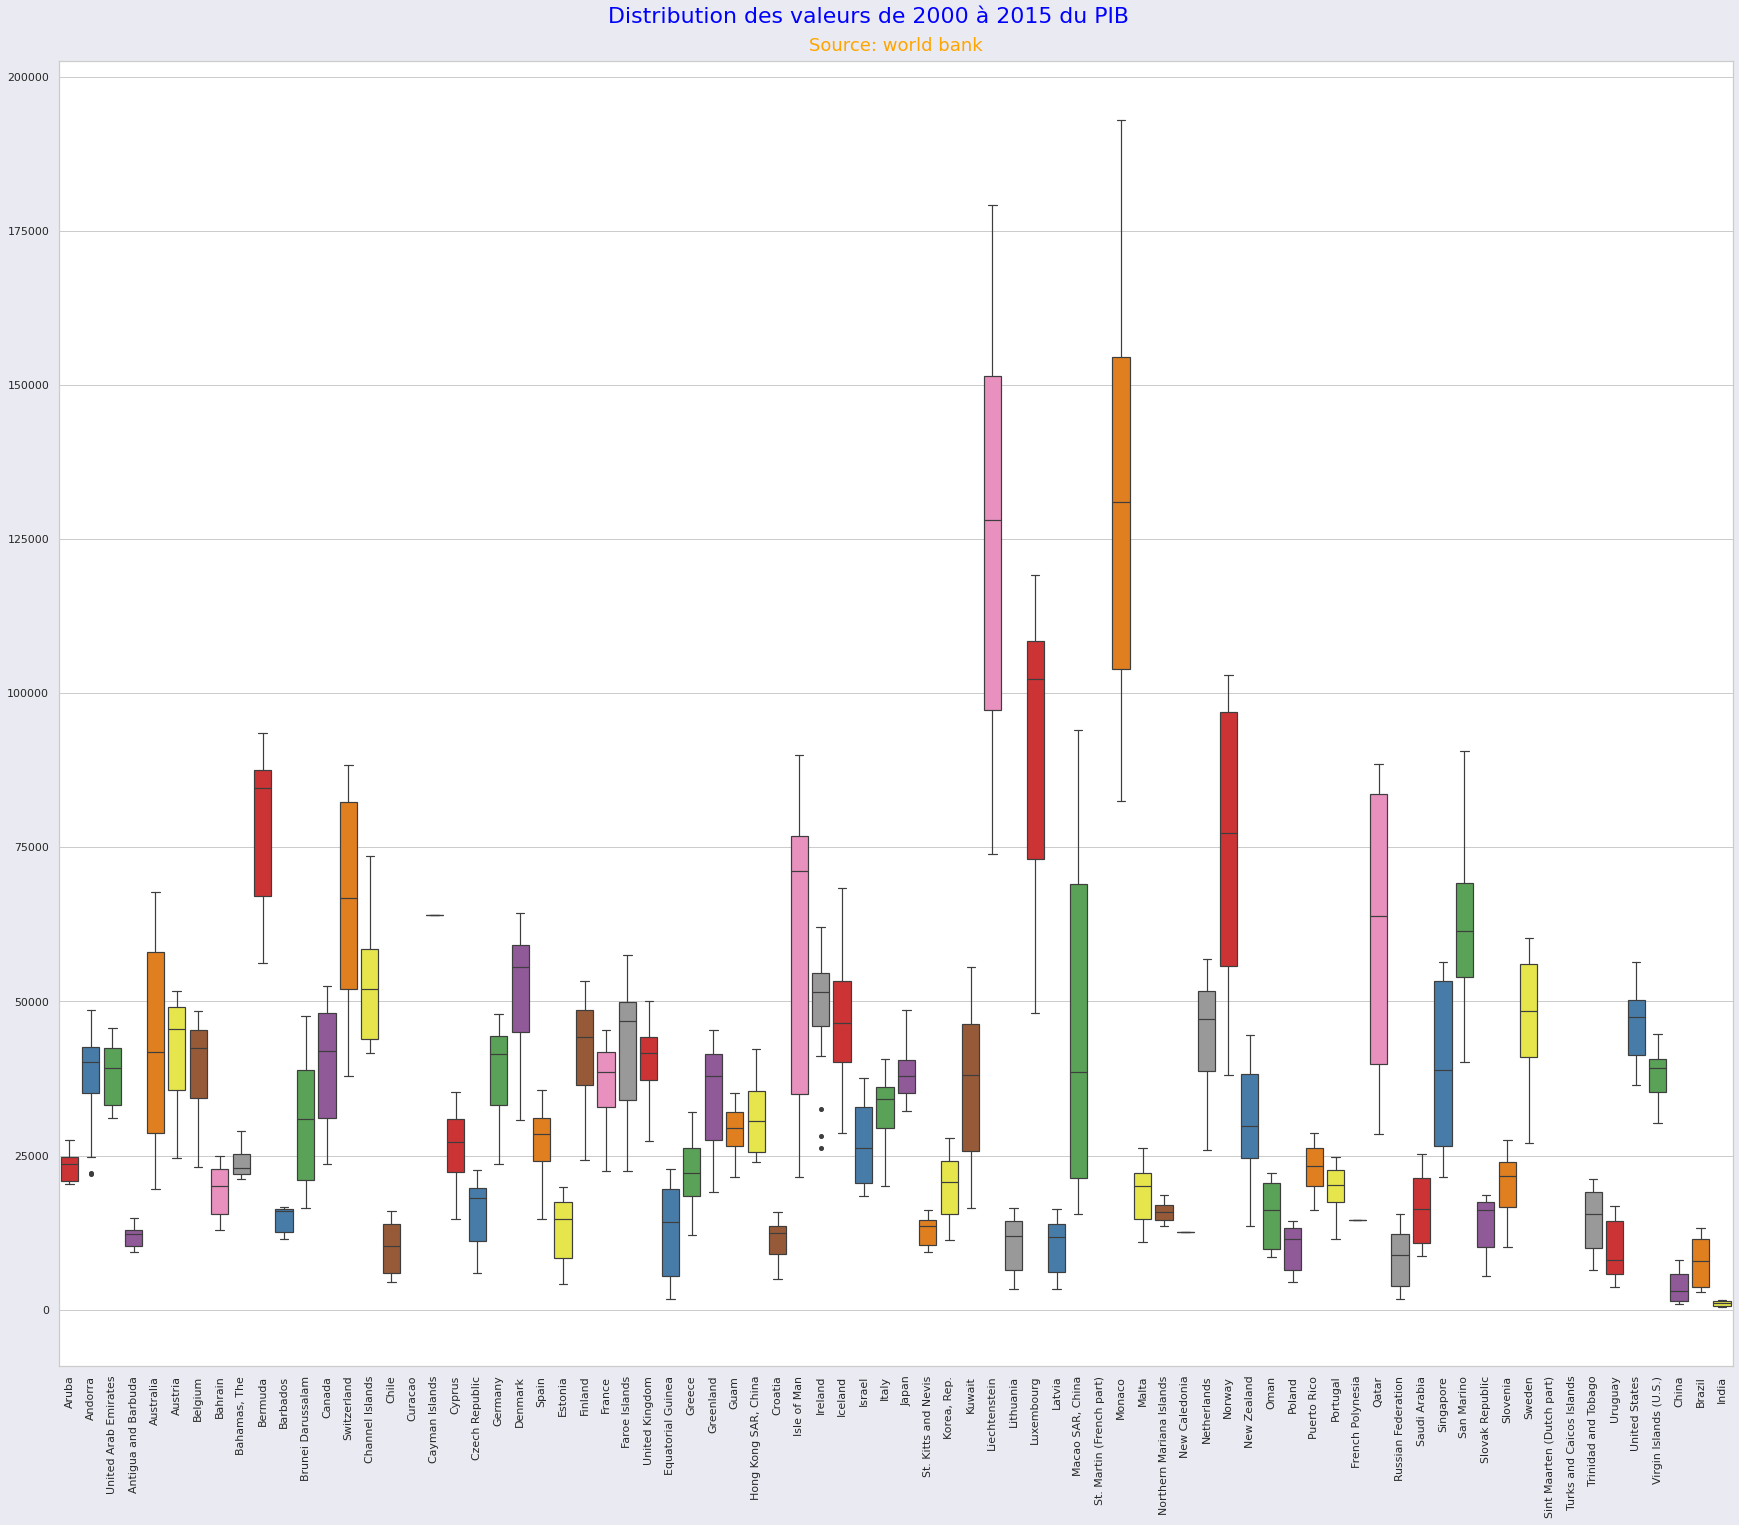

In [406]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 25), facecolor=facecolor)

x = sns.boxplot(data=data_gpd2,
                       palette='Set1',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=90)
title = 'Distribution des valeurs de 2000 à 2015 du PIB'
fig.suptitle(title, y=0.88, fontsize=22, color='Blue')
subtitle = 'Source: world bank'
plt.title(subtitle, fontsize=18, pad=10, color='orange')
plt.subplots_adjust(top=0.85)


## **3.2 Indicateur : Utilsateurs internet par 100 (Internet users (per 100 people))**

---




In [407]:
# Cet indicateur nous permet d'echantilloner, etant donnée que l'activité se fait essentiellement avec acces internet. C'est interessant de savoir quels sont les pays avec cet infrastructure
## le code indicateur dans notre dataset pour cet indicateur est IT.NET.USER.P2
data_int = data[data['Indicator Name'] ==  "Internet users (per 100 people)"]
data_int.head(2)

Country Code Country Name                   Indicator Name       2000  \
1375          ABW        Aruba  Internet users (per 100 people)  15.442823   
5040          AND      Andorra  Internet users (per 100 people)  10.538836   

      2001       2002       2003       2004       2005       2006   2007  \
1375  17.1  18.800000  20.800000  23.000000  25.400000  28.000000  30.90   
5040   NaN  11.260469  13.546413  26.837954  37.605766  48.936847  70.87   

       2008   2009  2010  2011       2012  2013   2014       2015  
1375  52.00  58.00  62.0  69.0  74.000000  78.9  83.78  88.661227  
5040  70.04  78.53  81.0  81.0  86.434425  94.0  95.90  96.910000

In [408]:
#valeurs statistiques 
data_int.describe()

2000       2001       2002       2003       2004       2005  \
count  70.000000  69.000000  69.000000  69.000000  69.000000  71.000000   
mean   21.014703  25.929126  32.188466  36.924681  41.186785  44.520421   
std    15.679572  17.492496  20.130754  20.872382  21.472341  21.607042   
min     0.132355   0.165260   0.321198   0.520524   0.843930   1.149790   
25%     7.394424  11.558573  17.760000  20.800000  24.266544  27.172160   
50%    15.349109  19.100000  27.836322  31.640000  35.500000  40.000000   
75%    33.526698  41.670425  48.047117  54.534260  61.847628  62.860106   
max    52.000000  64.000000  79.120000  83.140000  83.890000  87.000000   

            2006       2007      2008       2009       2010       2011  \
count  71.000000  71.000000  71.00000  71.000000  70.000000  71.000000   
mean   48.470142  52.895403  56.75888  60.132092  63.854940  67.024894   
std    21.365557  20.953996  20.41861  19.824948  18.766852  17.439719   
min     1.279194   1.557123   1.82000   2.130000   6.000000  10.070000   
25%    30.001874  35.465000  42.15500  48.550000  52.992500  55.224998   
50%    47.930000  52.000000  59.60000  63.120000  66.750000  69.000000   
75%    65.107081  69.830000  71.85000  74.625000  76.960000  80.516086   
max    89.510000  90.600000  91.00000  93.000000  93.390000  94.819687   

            2012       2013       2014       2015  
count  70.000000  70.000000  70.000000  70.000000  
mean   70.681085  73.653407  76.046474  78.063310  
std    16.571941  16.311256  15.537248  14.798447  
min    12.580061  15.100000  18.860000  21.320000  
25%    60.844901  65.413700  68.620000  70.300000  
50%    71.474101  73.393000  76.161930  77.817350  
75%    82.837500  85.675000  87.330000  88.613420  
max    96.209800  96.546800  98.160000  98.323610

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

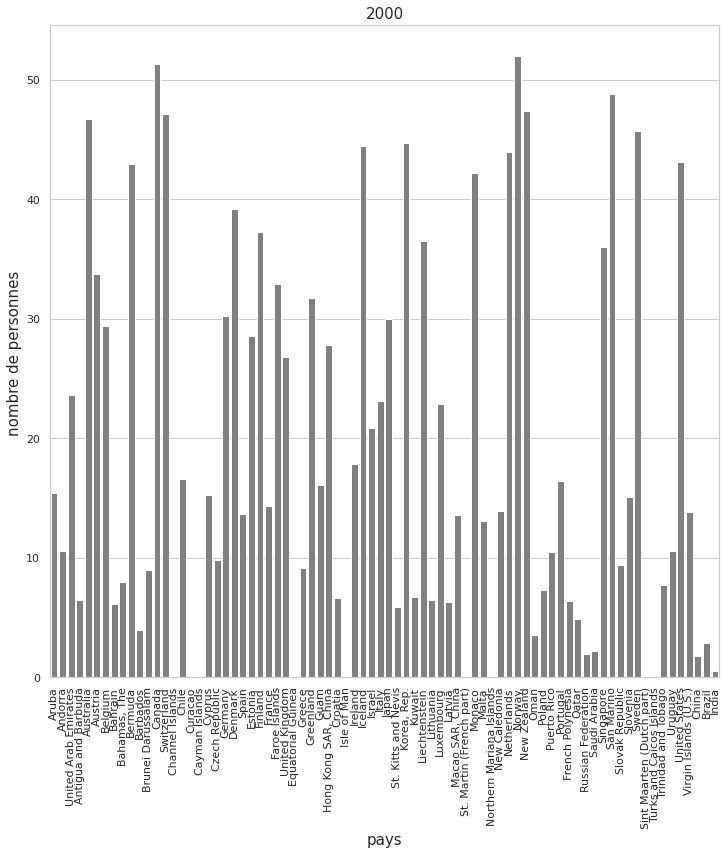

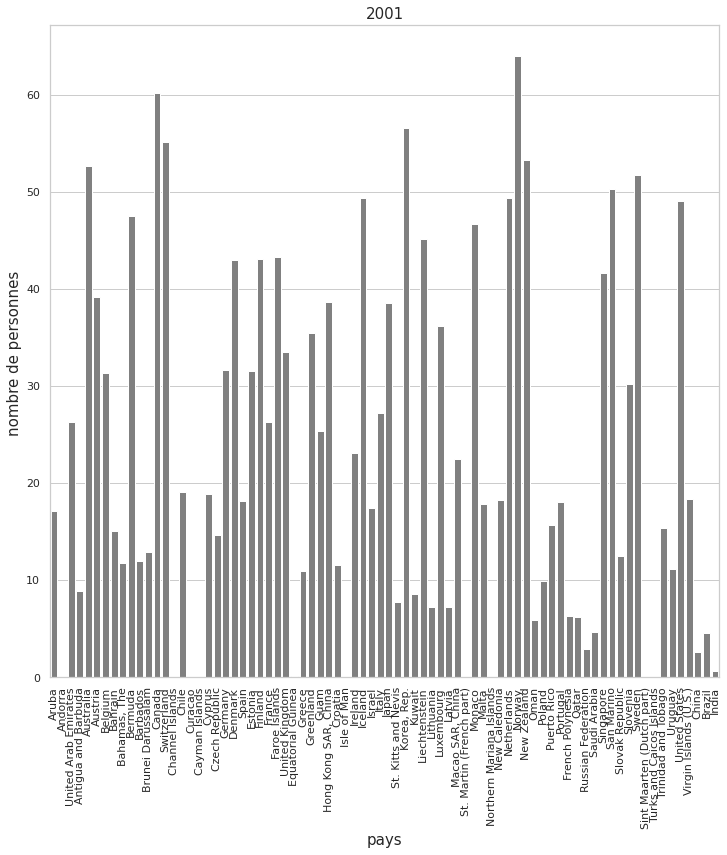

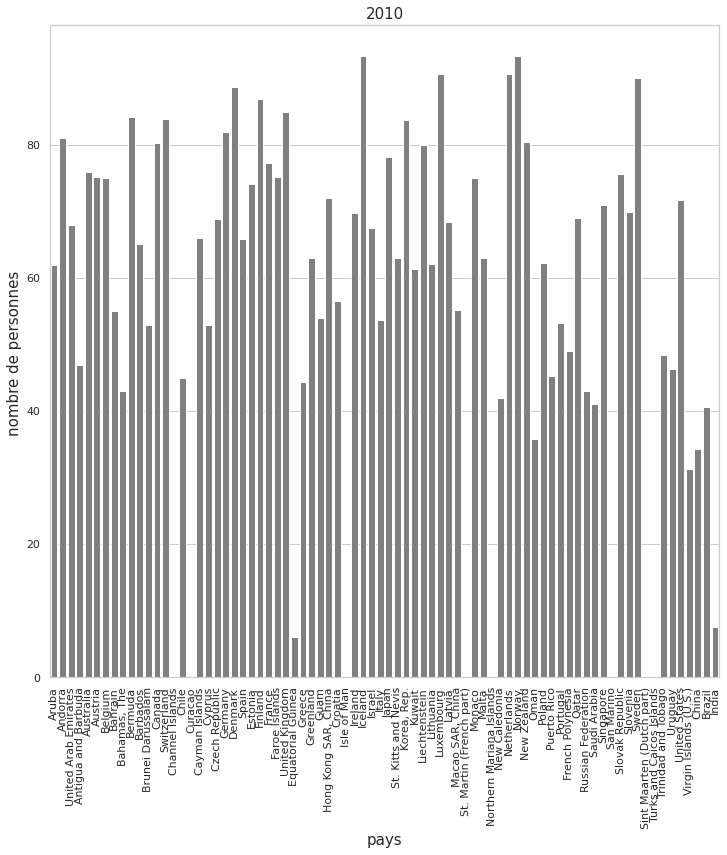

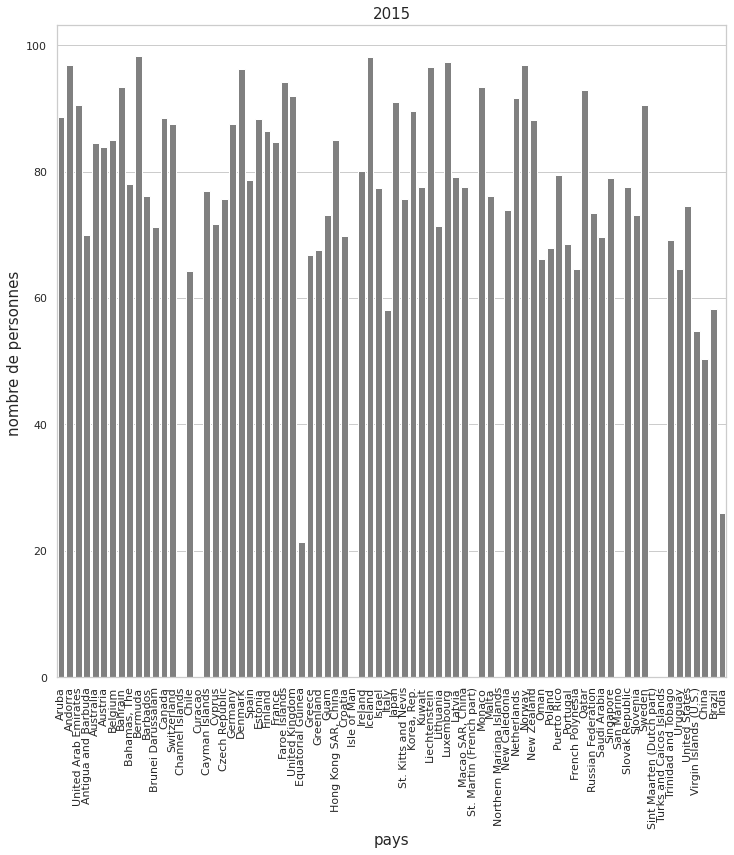

In [409]:
# Affichons les données selon les années 2000, 2001, 2010 et  2015
for x in ['2000', '2001','2010','2015']:
     
        fig, ax = plt.subplots(figsize=(12,12))
        sns.barplot(data_int['Country Name'], data_int[x], color='grey')
        plt.setp(ax.get_xticklabels(), rotation=90)
        plt.xlabel('pays', fontsize=15) # Titre des abscisses
        plt.ylabel('nombre de personnes ', fontsize=15)  # Titre des ordonnés
        plt.title(x, fontsize=15)


plt.show()

In [410]:
data_int.T

1375    \
Country Code                                ABW   
Country Name                              Aruba   
Indicator Name  Internet users (per 100 people)   
2000                                  15.442823   
2001                                       17.1   
2002                                       18.8   
2003                                       20.8   
2004                                       23.0   
2005                                       25.4   
2006                                       28.0   
2007                                       30.9   
2008                                       52.0   
2009                                       58.0   
2010                                       62.0   
2011                                       69.0   
2012                                       74.0   
2013                                       78.9   
2014                                      83.78   
2015                                  88.661227   

                                         5040    \
Country Code                                AND   
Country Name                            Andorra   
Indicator Name  Internet users (per 100 people)   
2000                                  10.538836   
2001                                        NaN   
2002                                  11.260469   
2003                                  13.546413   
2004                                  26.837954   
2005                                  37.605766   
2006                                  48.936847   
2007                                      70.87   
2008                                      70.04   
2009                                      78.53   
2010                                       81.0   
2011                                       81.0   
2012                                  86.434425   
2013                                       94.0   
2014                                       95.9   
2015                                      96.91   

                                         8705    \
Country Code                                ARE   
Country Name               United Arab Emirates   
Indicator Name  Internet users (per 100 people)   
2000                                  23.625301   
2001                                  26.271754   
2002                                  28.316485   
2003                                  29.477953   
2004                                  30.131296   
2005                                       40.0   
2006                                       52.0   
2007                                       61.0   
2008                                       63.0   
2009                                       64.0   
2010                                       68.0   
2011                                       78.0   
2012                                  84.999991   
2013                                       88.0   
2014                                       90.4   
2015                                       90.5   

                                         12370   \
Country Code                                ATG   
Country Name                Antigua and Barbuda   
Indicator Name  Internet users (per 100 people)   
2000                                   6.482226   
2001                                   8.899286   
2002                                       12.5   
2003                                  17.228649   
2004                                  24.266544   
2005                                       27.0   
2006                                       30.0   
2007                                       34.0   
2008                                       38.0   
2009                                       42.0   
2010                                       47.0   
2011                                       52.0   
2012                                       58.0   
2013                                       63.4   
2014                                      67.78   
2015     

In [411]:
data_int.drop(columns=["Country Code", "Indicator Name"], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [412]:
data_int.head(2)

Country Name       2000  2001       2002       2003       2004  \
1375        Aruba  15.442823  17.1  18.800000  20.800000  23.000000   
5040      Andorra  10.538836   NaN  11.260469  13.546413  26.837954   

           2005       2006   2007   2008   2009  2010  2011       2012  2013  \
1375  25.400000  28.000000  30.90  52.00  58.00  62.0  69.0  74.000000  78.9   
5040  37.605766  48.936847  70.87  70.04  78.53  81.0  81.0  86.434425  94.0   

       2014       2015  
1375  83.78  88.661227  
5040  95.90  96.910000

pivot table, les années vont etre en index

In [413]:
data_int.shape

(78, 17)

In [414]:
data_int2 = data_int.iloc[ :, 1: ]
data_int2.head(2)

2000  2001       2002       2003       2004       2005       2006  \
1375  15.442823  17.1  18.800000  20.800000  23.000000  25.400000  28.000000   
5040  10.538836   NaN  11.260469  13.546413  26.837954  37.605766  48.936847   

       2007   2008   2009  2010  2011       2012  2013   2014       2015  
1375  30.90  52.00  58.00  62.0  69.0  74.000000  78.9  83.78  88.661227  
5040  70.87  70.04  78.53  81.0  81.0  86.434425  94.0  95.90  96.910000

In [415]:
data_int2 = data_int2.T

In [416]:
data_int2.columns = data_int['Country Name'].unique()

In [417]:
data_int2.columns

Index(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'Bahamas, The', 'Bermuda',
       'Barbados', 'Brunei Darussalam', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'Faroe Islands', 'United Kingdom', 'Equatorial Guinea',
       'Greece', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Croatia',
       'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Monaco', 'Malta',
       'Northern Mariana Islands', 'New Caledonia', 'Netherlands', 'Norway',
       'New Zealand', 'Oman', 'Poland', 'Puerto Rico', 'Portugal',
       'French Polynesia', 'Qatar', 'Russian Federation', 'Saudi Arabia',
   

In [418]:
data_int2.describe()


Aruba    Andorra  United Arab Emirates  Antigua and Barbuda  \
count  16.000000  15.000000             16.000000            16.000000   
mean   46.611503  60.227381             57.357674            37.409794   
std    26.735665  32.351840             24.923874            20.904487   
min    15.442823  10.538836             23.625301             6.482226   
25%    22.450000  32.221860             29.967960            22.507070   
50%    41.450000  70.870000             62.000000            36.000000   
75%    70.250000  83.717212             79.749998            53.500000   
max    88.661227  96.910000             90.500000            70.000000   

       Australia    Austria    Belgium    Bahrain  Bahamas, The    Bermuda  \
count  13.000000  16.000000  16.000000  16.000000     16.000000  16.000000   
mean   71.562854  63.952521  63.525823  47.727865     39.368013  74.345017   
std    11.868595  17.564619  18.117734  31.238027     24.756023  18.330322   
min    46.756116  33.730133  29.431692   6.153733      8.000000  42.949860   
25%    66.000000  51.385000  52.887500  21.419944     21.500000  59.873653   
50%    74.250000  71.120000  65.220000  42.430000     29.270000  78.325297   
75%    79.487698  79.062493  80.942492  79.749975     66.687051  89.076826   
max    84.560519  83.940142  85.052900  93.478301     78.000000  98.323610   

       ...     Sweden  Sint Maarten (Dutch part)  Turks and Caicos Islands  \
count  ...  16.000000                        0.0                       0.0   
mean   ...  82.531693                        NaN                       NaN   
std    ...  14.628807                        NaN                       NaN   
min    ...  45.687652                        NaN                       NaN   
25%    ...  81.290000                        NaN                       NaN   
50%    ...  88.880000                        NaN                       NaN   
75%    ...  91.380000                        NaN                       NaN   
max    ...  94.783600                        NaN                       NaN   

       Trinidad and Tobago    Uruguay  United States  Virgin Islands (U.S.)  \
count            16.000000  16.000000      16.000000              16.000000   
mean             39.362242  35.417301      66.835855              31.802684   
std              18.956011  19.313218       9.410371              10.947805   
min               7.721411  10.539058      43.079163              13.815081   
25%              26.761144  16.781608      63.992972              27.343074   
50%              33.550000  36.650000      70.364730              27.412791   
75%              56.279050  52.166938      73.250000              36.836975   
max              69.198471  64.600000      75.000000              54.839137   

           China     Brazil      India  
count  16.000000  16.000000  16.000000  
mean   22.997362  31.298747   7.330114  
std    17.890567  18.129654   7.683911  
min     1.775913   2.870685   0.527532  
25%     7.025000  17.607151   1.903725  
50%    19.300000  32.355000   4.165000  
75%    39.300029  46.407500  10.697515  
max    50.300000  58.327952  26.000000  

[8 rows x 78 columns]

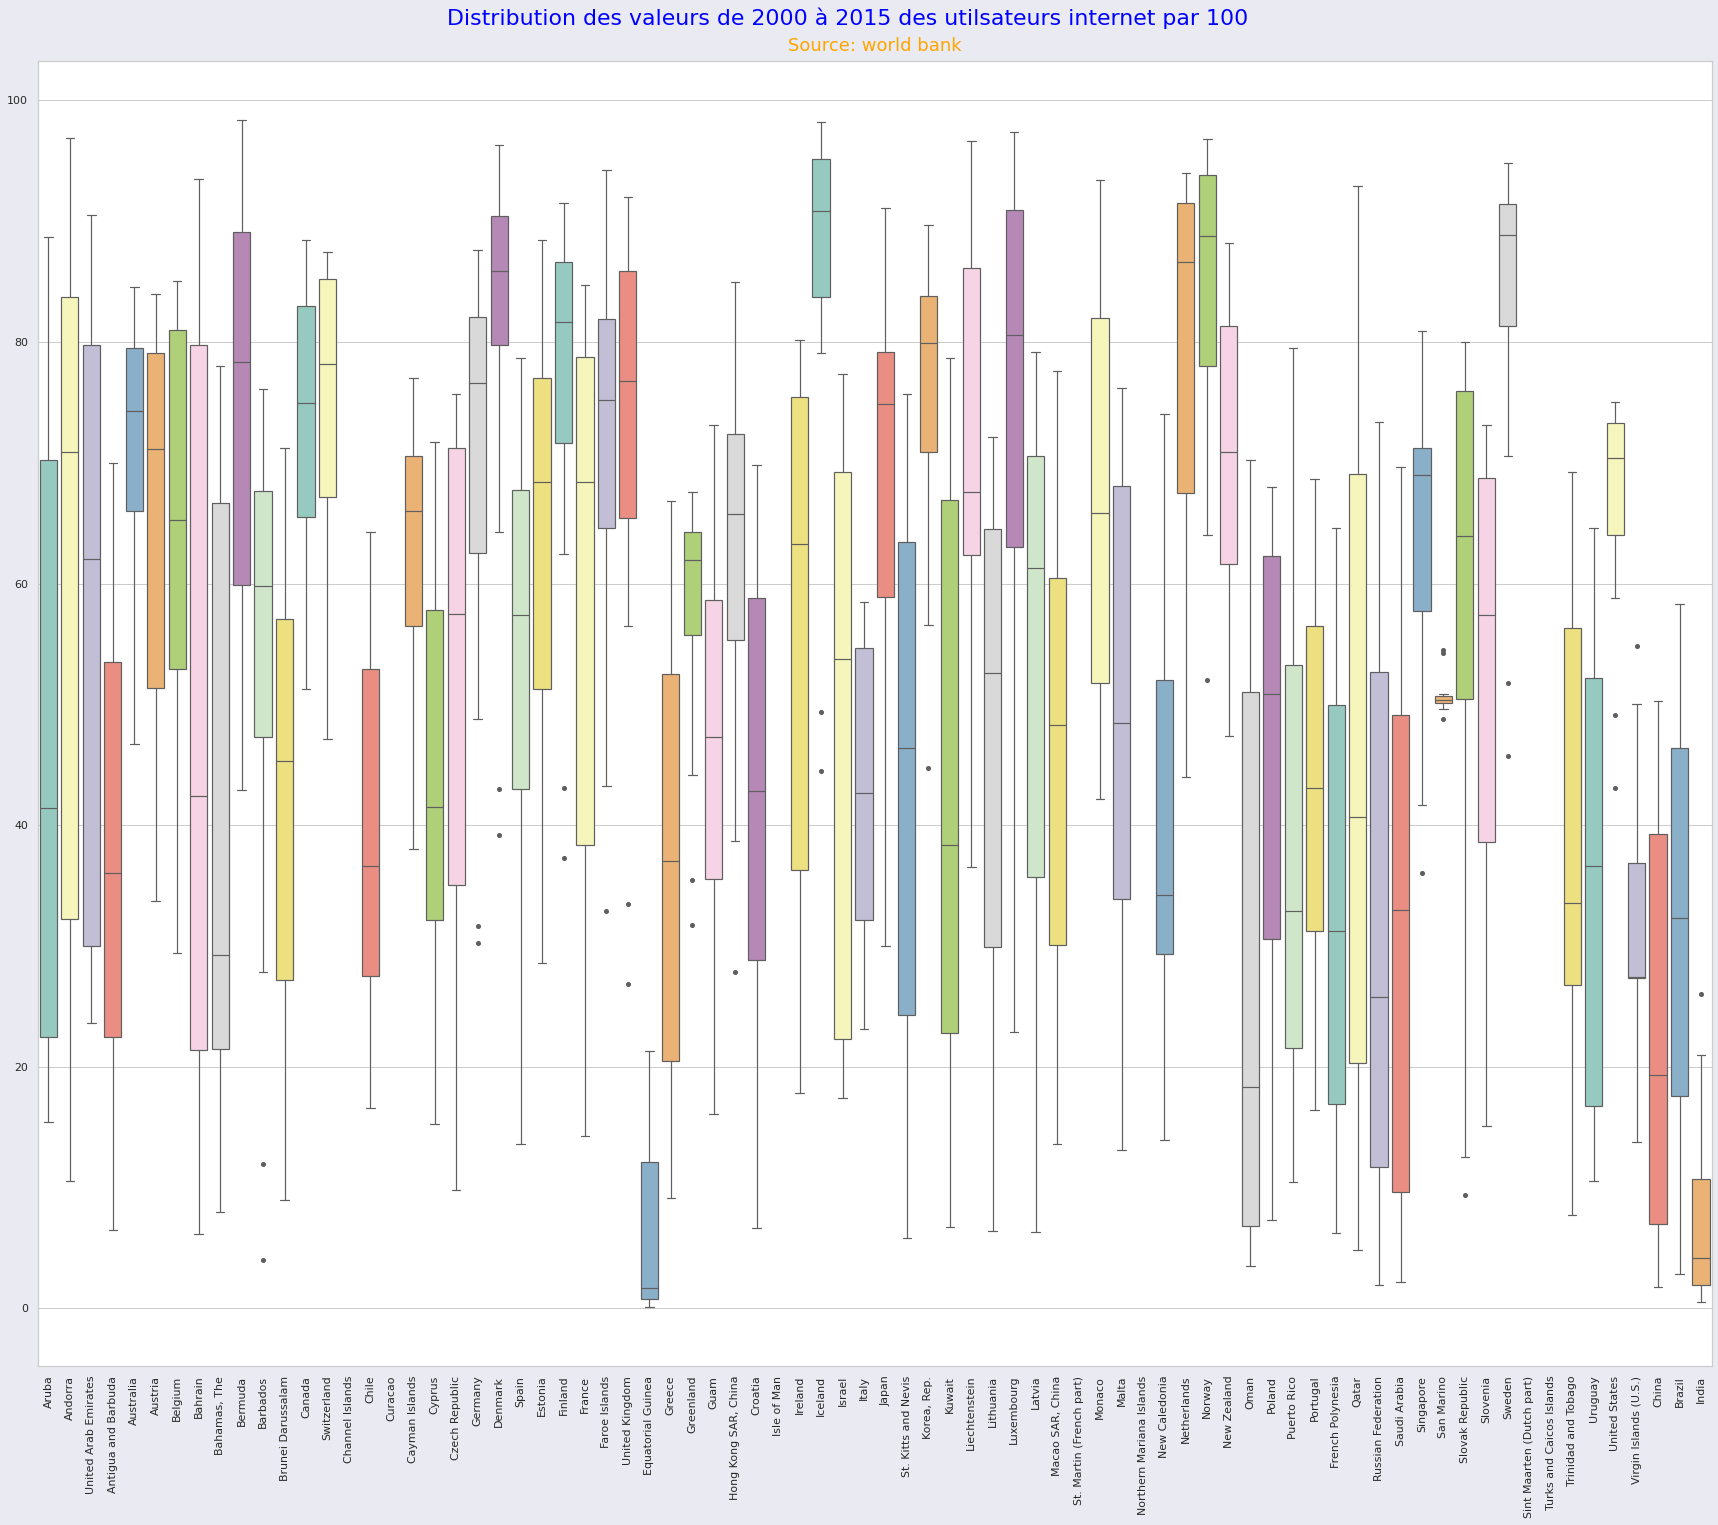

In [419]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(30, 25), facecolor=facecolor)

x = sns.boxplot(data=data_int2,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=90)
title = 'Distribution des valeurs de 2000 à 2015 des utilsateurs internet par 100'
fig.suptitle(title, y=0.88, fontsize=22, color='Blue')
subtitle = 'Source: world bank'
plt.title(subtitle, fontsize=18, pad=10, color='orange')
plt.subplots_adjust(top=0.85)




## **3.3 Indicateur: Personal computers (per 100)**


In [420]:
# maintenat on se concentre sur le nombre d'individu avec un ordinateur
## le code indicateur dans notre dataset pour cet indicateur est IT.CMP.PCMP.P2
data_PC = data[data['Indicator Name'] ==  "Personal computers (per 100)"]
data_PC.head(2)

Empty DataFrame
Columns: [Country Code, Country Name, Indicator Name, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Index: []

In [421]:
#valeurs statistiques 
data_PC.describe()

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2012  2013  2014  2015  
count   0.0   0.0   0.0   0.0  
mean    NaN   NaN   NaN   NaN  
std     NaN   NaN   NaN   NaN  
min     NaN   NaN   NaN   NaN  
25%     NaN   NaN   NaN   NaN  
50%     NaN   NaN   NaN   NaN  
75%     NaN   NaN   NaN   NaN  
max     NaN   NaN   NaN   NaN

## **3.4 Indicateur: Percentage of population age 15+ with secondary schooling. Completed Secondary**

In [422]:
## le code indicateur dans notre dataset pour cet indicateur est BAR.SEC.CMPT.15UP.ZS
data_PHS15 = data[data['Indicator Name'] ==  "Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary"]
data_PHS15.head(2)

Country Code Country Name  \
377           ABW        Aruba   
4042          AND      Andorra   

                                         Indicator Name  2000  2001  2002  \
377   Barro-Lee: Percentage of population age 15+ wi...   NaN   NaN   NaN   
4042  Barro-Lee: Percentage of population age 15+ wi...   NaN   NaN   NaN   

      2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
377    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4042   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2015  
377    NaN  
4042   NaN

In [423]:
#valeurs statistiques 
data_PHS15.describe()

2000  2001  2002  2003  2004       2005  2006  2007  2008  2009  \
count  52.000000   0.0   0.0   0.0   0.0  52.000000   0.0   0.0   0.0   0.0   
mean   31.557115   NaN   NaN   NaN   NaN  33.951923   NaN   NaN   NaN   NaN   
std    11.428543   NaN   NaN   NaN   NaN  12.041905   NaN   NaN   NaN   NaN   
min     9.520000   NaN   NaN   NaN   NaN  14.000000   NaN   NaN   NaN   NaN   
25%    23.762500   NaN   NaN   NaN   NaN  26.357500   NaN   NaN   NaN   NaN   
50%    30.160000   NaN   NaN   NaN   NaN  32.005000   NaN   NaN   NaN   NaN   
75%    37.642500   NaN   NaN   NaN   NaN  39.987500   NaN   NaN   NaN   NaN   
max    65.920000   NaN   NaN   NaN   NaN  69.750000   NaN   NaN   NaN   NaN   

            2010  2011  2012  2013  2014  2015  
count  52.000000   0.0   0.0   0.0   0.0   0.0  
mean   35.965962   NaN   NaN   NaN   NaN   NaN  
std    12.430941   NaN   NaN   NaN   NaN   NaN  
min    15.460000   NaN   NaN   NaN   NaN   NaN  
25%    26.080000   NaN   NaN   NaN   NaN   NaN  
50%    35.570000   NaN   NaN   NaN   NaN   NaN  
75%    42.135000   NaN   NaN   NaN   NaN   NaN  
max    68.770000   NaN   NaN   NaN   NaN   NaN

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


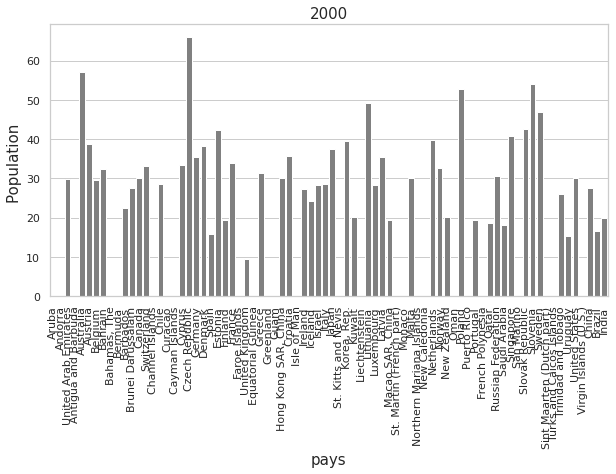

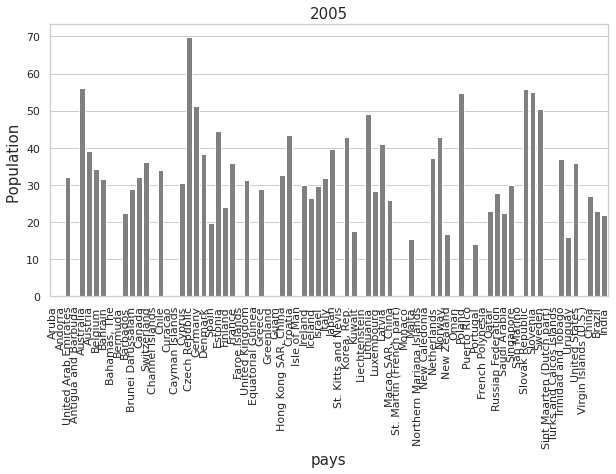

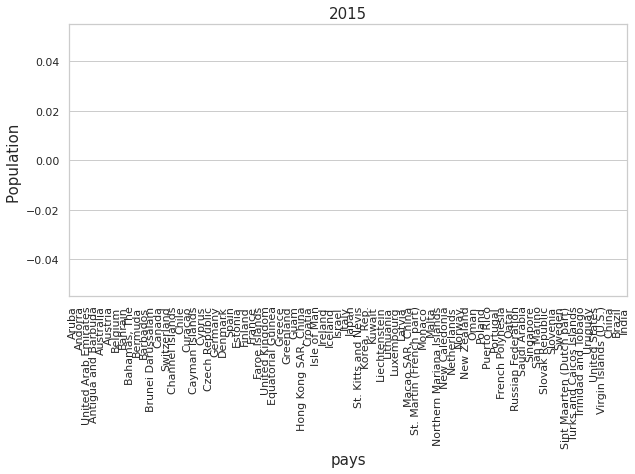

In [424]:
# Affichons les données selon les années 2000, 2015 et 2015
for x in  ['2000', '2005', '2015']:
  
      fig, ax = plt.subplots(figsize=(10,5))
      sns.barplot(data_PHS15['Country Name'], data_PHS15[x], color='grey')
      plt.setp(ax.get_xticklabels(), rotation=90)
      plt.xlabel('pays', fontsize=15) # Titre des abscisses
      plt.ylabel('Population ', fontsize=15)  # Titre des ordonnés
      plt.title(x, fontsize=15)
plt.show()

In [425]:
data_PHS15.drop(columns=["Country Code", "Indicator Name"], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [426]:
data_PHS15.head(2)

Country Name  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
377         Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4042      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2010  2011  2012  2013  2014  2015  
377    NaN   NaN   NaN   NaN   NaN   NaN  
4042   NaN   NaN   NaN   NaN   NaN   NaN

pivot table, les années vont etre en index

In [427]:
data_PHS15.T

377      4042                  7707                 11372   \
Country Name  Aruba  Andorra  United Arab Emirates  Antigua and Barbuda   
2000            NaN      NaN                 29.96                  NaN   
2001            NaN      NaN                   NaN                  NaN   
2002            NaN      NaN                   NaN                  NaN   
2003            NaN      NaN                   NaN                  NaN   
2004            NaN      NaN                   NaN                  NaN   
2005            NaN      NaN                  32.2                  NaN   
2006            NaN      NaN                   NaN                  NaN   
2007            NaN      NaN                   NaN                  NaN   
2008            NaN      NaN                   NaN                  NaN   
2009            NaN      NaN                   NaN                  NaN   
2010            NaN      NaN                 35.68                  NaN   
2011            NaN      NaN                   NaN                  NaN   
2012            NaN      NaN                   NaN                  NaN   
2013            NaN      NaN                   NaN                  NaN   
2014            NaN      NaN                   NaN                  NaN   
2015            NaN      NaN                   NaN                  NaN   

                 15037    18702    22367    26032         29697    33362   \
Country Name  Australia  Austria  Belgium  Bahrain  Bahamas, The  Bermuda   
2000              57.04    38.76    29.65    32.48           NaN      NaN   
2001                NaN      NaN      NaN      NaN           NaN      NaN   
2002                NaN      NaN      NaN      NaN           NaN      NaN   
2003                NaN      NaN      NaN      NaN           NaN      NaN   
2004                NaN      NaN      NaN      NaN           NaN      NaN   
2005              55.98    39.19    34.15    31.57           NaN      NaN   
2006                NaN      NaN      NaN      NaN           NaN      NaN   
2007                NaN      NaN      NaN      NaN           NaN      NaN   
2008                NaN      NaN      NaN      NaN           NaN      NaN   
2009                NaN      NaN      NaN      NaN           NaN      NaN   
2010              38.49    40.81    33.24    32.11           NaN      NaN   
2011                NaN      NaN      NaN      NaN           NaN      NaN   
2012                NaN      NaN      NaN      NaN           NaN      NaN   
2013                NaN      NaN      NaN      NaN           NaN      NaN   
2014                NaN      NaN      NaN      NaN           NaN      NaN   
2015                NaN      NaN      NaN      NaN           NaN      NaN   

              ...  249597                     253262  \
Country Name  ...  Sweden  Sint Maarten (Dutch part)   
2000          ...   46.98                        NaN   
2001          ...     NaN                        NaN   
2002          ...     NaN                        NaN   
2003          ...     NaN                        NaN   
2004          ...     NaN                        NaN   
2005          ...   50.36                        NaN   
2006          ...     NaN                        NaN   
2007          ...     NaN                        NaN   
2008          ...     NaN                        NaN   
2009          ...     NaN                        NaN   
2010          ...   48.29                        NaN   
2011          ...     NaN                        NaN   
2012          ...     NaN                        NaN   
2013          ...     NaN                        NaN   
2014          ...     NaN                        NaN   
2015          ...     NaN                        NaN   

                                256927               260592   264257  \
Country Name  Turks and Caicos Islands  Trinidad and Tobago  Uruguay   
2000                               NaN                25.96    15.39   
2001                               NaN            

In [428]:
data_PHS15.shape

(78, 17)

In [429]:
data_PHS15['Country Name'].nunique()

78

In [430]:
data_PHS152 = data_PHS15.iloc[ :, 1: ]
data_PHS152.head(2)

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
377    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4042   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2012  2013  2014  2015  
377    NaN   NaN   NaN   NaN  
4042   NaN   NaN   NaN   NaN

In [431]:
data_PHS152 = data_PHS152.T

In [432]:
data_PHS152.columns = data_PHS15['Country Name'].unique()

In [433]:
data_PHS152.describe()


Aruba  Andorra  United Arab Emirates  Antigua and Barbuda  Australia  \
count    0.0      0.0              3.000000                  0.0   3.000000   
mean     NaN      NaN             32.613333                  NaN  50.503333   
std      NaN      NaN              2.882314                  NaN  10.417343   
min      NaN      NaN             29.960000                  NaN  38.490000   
25%      NaN      NaN             31.080000                  NaN  47.235000   
50%      NaN      NaN             32.200000                  NaN  55.980000   
75%      NaN      NaN             33.940000                  NaN  56.510000   
max      NaN      NaN             35.680000                  NaN  57.040000   

         Austria    Belgium    Bahrain  Bahamas, The  Bermuda  ...     Sweden  \
count   3.000000   3.000000   3.000000           0.0      0.0  ...   3.000000   
mean   39.586667  32.346667  32.053333           NaN      NaN  ...  48.543333   
std     1.081033   2.379293   0.457639           NaN      NaN  ...   1.704181   
min    38.760000  29.650000  31.570000           NaN      NaN  ...  46.980000   
25%    38.975000  31.445000  31.840000           NaN      NaN  ...  47.635000   
50%    39.190000  33.240000  32.110000           NaN      NaN  ...  48.290000   
75%    40.000000  33.695000  32.295000           NaN      NaN  ...  49.325000   
max    40.810000  34.150000  32.480000           NaN      NaN  ...  50.360000   

       Sint Maarten (Dutch part)  Turks and Caicos Islands  \
count                        0.0                       0.0   
mean                         NaN                       NaN   
std                          NaN                       NaN   
min                          NaN                       NaN   
25%                          NaN                       NaN   
50%                          NaN                       NaN   
75%                          NaN                       NaN   
max                          NaN                       NaN   

       Trinidad and Tobago    Uruguay  United States  Virgin Islands (U.S.)  \
count             3.000000   3.000000       3.000000                    0.0   
mean             37.776667  16.610000      34.113333                    NaN   
std              12.317314   1.706429       3.425147                    NaN   
min              25.960000  15.390000      30.160000                    NaN   
25%              31.395000  15.635000      33.075000                    NaN   
50%              36.830000  15.880000      35.990000                    NaN   
75%              43.685000  17.220000      36.090000                    NaN   
max              50.540000  18.560000      36.190000                    NaN   

           China     Brazil      India  
count   3.000000   3.000000   3.000000  
mean   25.770000  21.996667  22.220000  
std     2.546527   4.958279   2.625319  
min    22.850000  16.610000  19.830000  
25%    24.890000  19.810000  20.815000  
50%    26.930000  23.010000  21.800000  
75%    27.230000  24.690000  23.415000  
max    27.530000  26.370000  25.030000  

[8 rows x 78 columns]

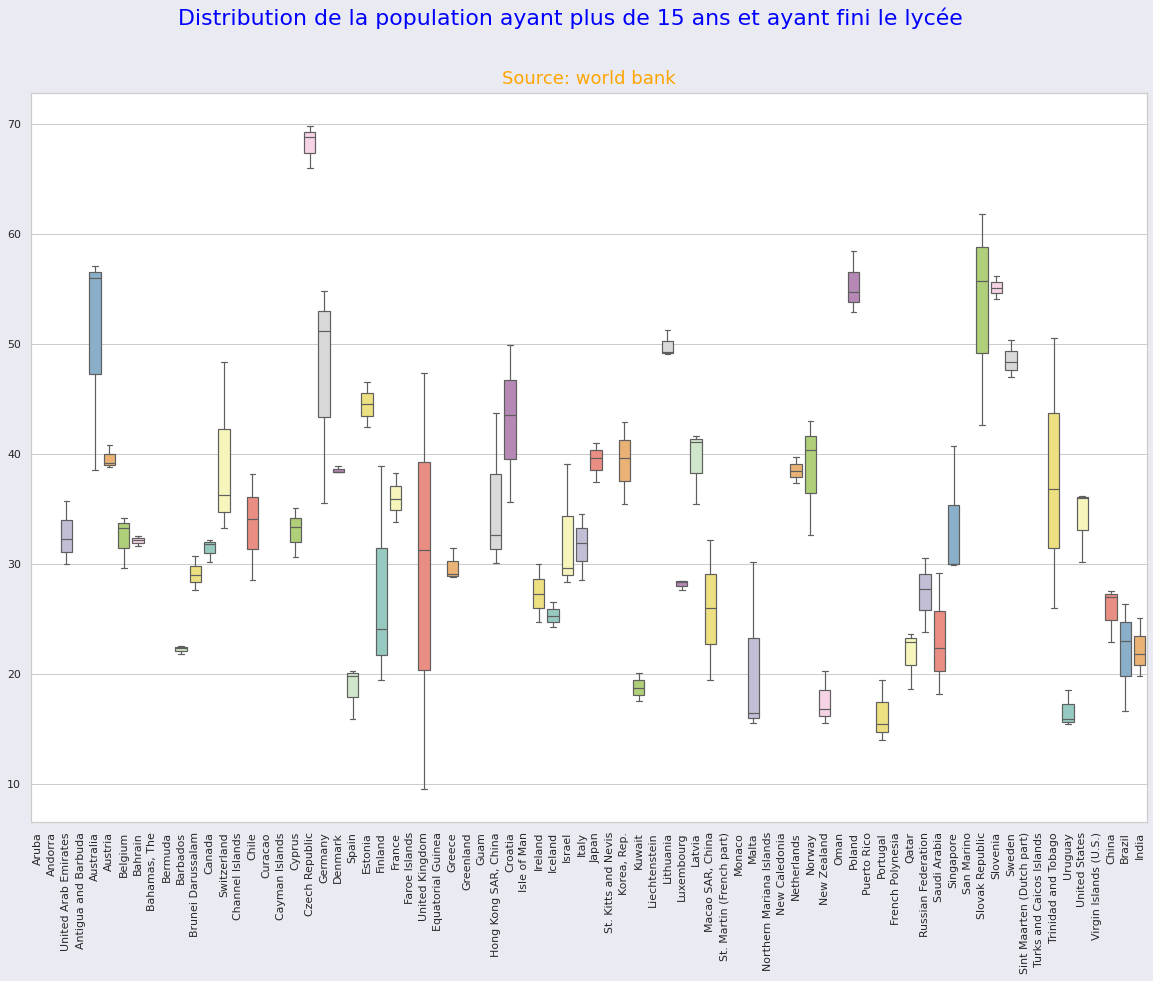

In [434]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

x = sns.boxplot(data=data_PHS152,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=90)
title = 'Distribution de la population ayant plus de 15 ans et ayant fini le lycée'
fig.suptitle(title, y=0.88, fontsize=22, color='Blue')
subtitle = 'Source: world bank'
plt.title(subtitle, fontsize=18, pad=10, color='orange')
plt.subplots_adjust(top=0.80)



## **3.5 Indicateur:Percentage of population age 15+ with tertiary schooling. Completed Tertiary**

In [435]:
## le code indicateur dans notre dataset pour cet indicateur est BAR.TER.CMPT.15UP.ZS
data_PT15 = data[data['Indicator Name'] ==  "Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary"]
data_PT15.head(2)

Country Code Country Name  \
379           ABW        Aruba   
4044          AND      Andorra   

                                         Indicator Name  2000  2001  2002  \
379   Barro-Lee: Percentage of population age 15+ wi...   NaN   NaN   NaN   
4044  Barro-Lee: Percentage of population age 15+ wi...   NaN   NaN   NaN   

      2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
379    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4044   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2015  
379    NaN  
4044   NaN

In [436]:
#valeurs statistiques 
data_PT15.describe()

2000  2001  2002  2003  2004       2005  2006  2007  2008  2009  \
count  52.000000   0.0   0.0   0.0   0.0  52.000000   0.0   0.0   0.0   0.0   
mean    9.981538   NaN   NaN   NaN   NaN  11.521731   NaN   NaN   NaN   NaN   
std     4.943969   NaN   NaN   NaN   NaN   5.697868   NaN   NaN   NaN   NaN   
min     0.660000   NaN   NaN   NaN   NaN   1.530000   NaN   NaN   NaN   NaN   
25%     6.022500   NaN   NaN   NaN   NaN   7.177500   NaN   NaN   NaN   NaN   
50%     9.750000   NaN   NaN   NaN   NaN  11.015000   NaN   NaN   NaN   NaN   
75%    13.240000   NaN   NaN   NaN   NaN  14.805000   NaN   NaN   NaN   NaN   
max    22.970000   NaN   NaN   NaN   NaN  22.390000   NaN   NaN   NaN   NaN   

            2010  2011  2012  2013  2014  2015  
count  52.000000   0.0   0.0   0.0   0.0   0.0  
mean   13.514038   NaN   NaN   NaN   NaN   NaN  
std     7.105615   NaN   NaN   NaN   NaN   NaN  
min     2.070000   NaN   NaN   NaN   NaN   NaN  
25%     7.717500   NaN   NaN   NaN   NaN   NaN  
50%    12.780000   NaN   NaN   NaN   NaN   NaN  
75%    18.047500   NaN   NaN   NaN   NaN   NaN  
max    30.040000   NaN   NaN   NaN   NaN   NaN

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


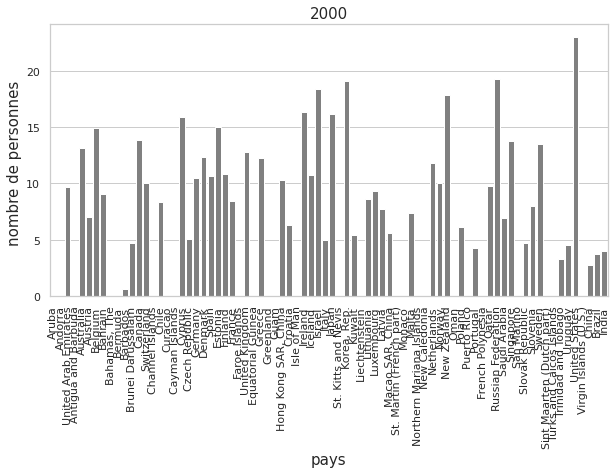

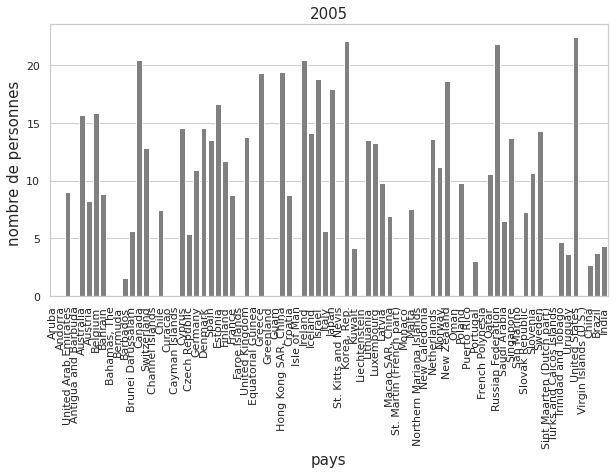

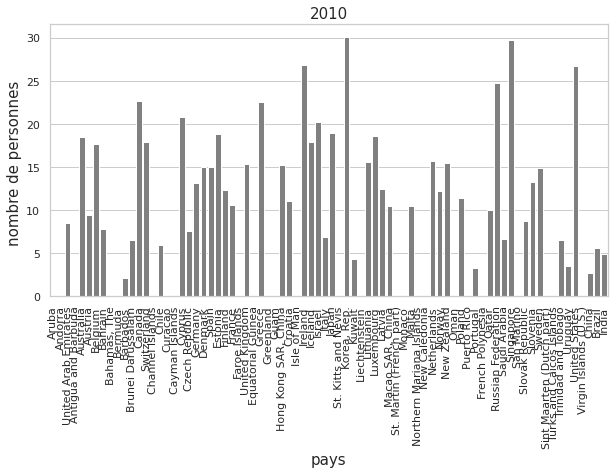

In [437]:
# Affichons les données selon les années 2000, 2005 et 2010
for x in ['2000', '2005','2010']:
    
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(data_PT15['Country Name'], data_PT15[x], color='grey')
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.xlabel('pays', fontsize=15) # Titre des abscisses
    plt.ylabel('nombre de personnes ', fontsize=15)  # Titre des ordonnés
    plt.title(x, fontsize=15)

plt.show()

In [438]:
data_PT15.T

379     \
Country Code                                                  ABW   
Country Name                                                Aruba   
Indicator Name  Barro-Lee: Percentage of population age 15+ wi...   
2000                                                          NaN   
2001                                                          NaN   
2002                                                          NaN   
2003                                                          NaN   
2004                                                          NaN   
2005                                                          NaN   
2006                                                          NaN   
2007                                                          NaN   
2008                                                          NaN   
2009                                                          NaN   
2010                                                          NaN   
2011                                                          NaN   
2012                                                          NaN   
2013                                                          NaN   
2014                                                          NaN   
2015                                                          NaN   

                                                           4044    \
Country Code                                                  AND   
Country Name                                              Andorra   
Indicator Name  Barro-Lee: Percentage of population age 15+ wi...   
2000                                                          NaN   
2001                                                          NaN   
2002                                                          NaN   
2003                                                          NaN   
2004                                                          NaN   
2005                                                          NaN   
2006                                                          NaN   
2007                                                          NaN   
2008                                                          NaN   
2009                                                          NaN   
2010                                                          NaN   
2011                                                          NaN   
2012                                                          NaN   
2013                                                          NaN   
2014                                                          NaN   
2015                                                          NaN   

                                                           7709    \
Country Code                                                  ARE   
Country Name                                 United Arab Emirates   
Indicator Name  Barro-Lee: Percentage of population age 15+ wi...   
2000                                                          9.7   
2001                                                          NaN   
2002                                                          NaN   
2003                                                          NaN   
2004                                                          NaN   
2005                                                         9.01   
2006                                                          NaN   
2007                                                          NaN   
2008                                                          NaN   
2009                                                          NaN   
2010                                                         8.54   
2011                                                          NaN   
2012                                                          NaN   
2013                                                          NaN   
2014                                                   

In [439]:
data_PT15.drop(columns=["Country Code", "Indicator Name"], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [440]:
data_PT15.head(2)

Country Name  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
379         Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4044      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2010  2011  2012  2013  2014  2015  
379    NaN   NaN   NaN   NaN   NaN   NaN  
4044   NaN   NaN   NaN   NaN   NaN   NaN

In [441]:
data_PT15.shape

(78, 17)

In [442]:
data_PT152 = data_PT15.iloc[ :, 1: ]
data_PT152.head(2)

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
379    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4044   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2012  2013  2014  2015  
379    NaN   NaN   NaN   NaN  
4044   NaN   NaN   NaN   NaN

In [443]:
data_PT152 = data_PT152.T

In [444]:
data_PT152.columns = data_PT15['Country Name'].unique()

In [445]:
data_PT152

Aruba  Andorra  United Arab Emirates  Antigua and Barbuda  Australia  \
2000    NaN      NaN                  9.70                  NaN      13.15   
2001    NaN      NaN                   NaN                  NaN        NaN   
2002    NaN      NaN                   NaN                  NaN        NaN   
2003    NaN      NaN                   NaN                  NaN        NaN   
2004    NaN      NaN                   NaN                  NaN        NaN   
2005    NaN      NaN                  9.01                  NaN      15.63   
2006    NaN      NaN                   NaN                  NaN        NaN   
2007    NaN      NaN                   NaN                  NaN        NaN   
2008    NaN      NaN                   NaN                  NaN        NaN   
2009    NaN      NaN                   NaN                  NaN        NaN   
2010    NaN      NaN                  8.54                  NaN      18.52   
2011    NaN      NaN                   NaN                  NaN        NaN   
2012    NaN      NaN                   NaN                  NaN        NaN   
2013    NaN      NaN                   NaN                  NaN        NaN   
2014    NaN      NaN                   NaN                  NaN        NaN   
2015    NaN      NaN                   NaN                  NaN        NaN   

      Austria  Belgium  Bahrain  Bahamas, The  Bermuda  ...  Sweden  \
2000     7.06    14.95     9.08           NaN      NaN  ...   13.51   
2001      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2002      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2003      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2004      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2005     8.27    15.82     8.80           NaN      NaN  ...   14.32   
2006      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2007      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2008      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2009      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2010     9.37    17.69     7.76           NaN      NaN  ...   14.93   
2011      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2012      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2013      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2014      NaN      NaN      NaN           NaN      NaN  ...     NaN   
2015      NaN      NaN      NaN           NaN      NaN  ...     NaN   

      Sint Maarten (Dutch part)  Turks and Caicos Islands  \
2000                        NaN                       NaN   
2001                        NaN                       NaN   
2002                        NaN                       NaN   
2003                        NaN                       NaN   
2004                        NaN                       NaN   
2005                        NaN                       NaN   
2006                        NaN                       NaN   
2007                        NaN                       NaN   
2008                        NaN                       NaN   
2009                        NaN                       NaN   
2010                        NaN                       NaN   
2011                        NaN                       NaN   
2012                        NaN                       NaN   
2013                        NaN                       NaN   
2014                        NaN                       NaN   
2015                        NaN                       NaN   

      Trinidad and Tobago  Uruguay  United States  Virgin Islands (U.S.)  \
2000                 3.28     4.50          22.97                    NaN   
2001                  NaN      NaN            NaN                    NaN   
2002                  NaN      NaN            NaN                    NaN   
2003                  NaN      NaN            NaN                    NaN   
2004                  NaN      NaN            NaN    

In [446]:
data_PT152.describe()


Aruba  Andorra  United Arab Emirates  Antigua and Barbuda  Australia  \
count    0.0      0.0              3.000000                  0.0   3.000000   
mean     NaN      NaN              9.083333                  NaN  15.766667   
std      NaN      NaN              0.583467                  NaN   2.687607   
min      NaN      NaN              8.540000                  NaN  13.150000   
25%      NaN      NaN              8.775000                  NaN  14.390000   
50%      NaN      NaN              9.010000                  NaN  15.630000   
75%      NaN      NaN              9.355000                  NaN  17.075000   
max      NaN      NaN              9.700000                  NaN  18.520000   

        Austria    Belgium   Bahrain  Bahamas, The  Bermuda  ...     Sweden  \
count  3.000000   3.000000  3.000000           0.0      0.0  ...   3.000000   
mean   8.233333  16.153333  8.546667           NaN      NaN  ...  14.253333   
std    1.155436   1.400083  0.695509           NaN      NaN  ...   0.712344   
min    7.060000  14.950000  7.760000           NaN      NaN  ...  13.510000   
25%    7.665000  15.385000  8.280000           NaN      NaN  ...  13.915000   
50%    8.270000  15.820000  8.800000           NaN      NaN  ...  14.320000   
75%    8.820000  16.755000  8.940000           NaN      NaN  ...  14.625000   
max    9.370000  17.690000  9.080000           NaN      NaN  ...  14.930000   

       Sint Maarten (Dutch part)  Turks and Caicos Islands  \
count                        0.0                       0.0   
mean                         NaN                       NaN   
std                          NaN                       NaN   
min                          NaN                       NaN   
25%                          NaN                       NaN   
50%                          NaN                       NaN   
75%                          NaN                       NaN   
max                          NaN                       NaN   

       Trinidad and Tobago  Uruguay  United States  Virgin Islands (U.S.)  \
count             3.000000  3.00000       3.000000                    0.0   
mean              4.826667  3.89000      24.040000                    NaN   
std               1.602664  0.53507       2.373373                    NaN   
min               3.280000  3.50000      22.390000                    NaN   
25%               4.000000  3.58500      22.680000                    NaN   
50%               4.720000  3.67000      22.970000                    NaN   
75%               5.600000  4.08500      24.865000                    NaN   
max               6.480000  4.50000      26.760000                    NaN   

       China    Brazil     India  
count   3.00  3.000000  3.000000  
mean    2.73  4.353333  4.413333  
std     0.02  1.105728  0.420991  
min     2.71  3.700000  4.010000  
25%     2.72  3.715000  4.195000  
50%     2.73  3.730000  4.380000  
75%     2.74  4.680000  4.615000  
max     2.75  5.630000  4.850000  

[8 rows x 78 columns]

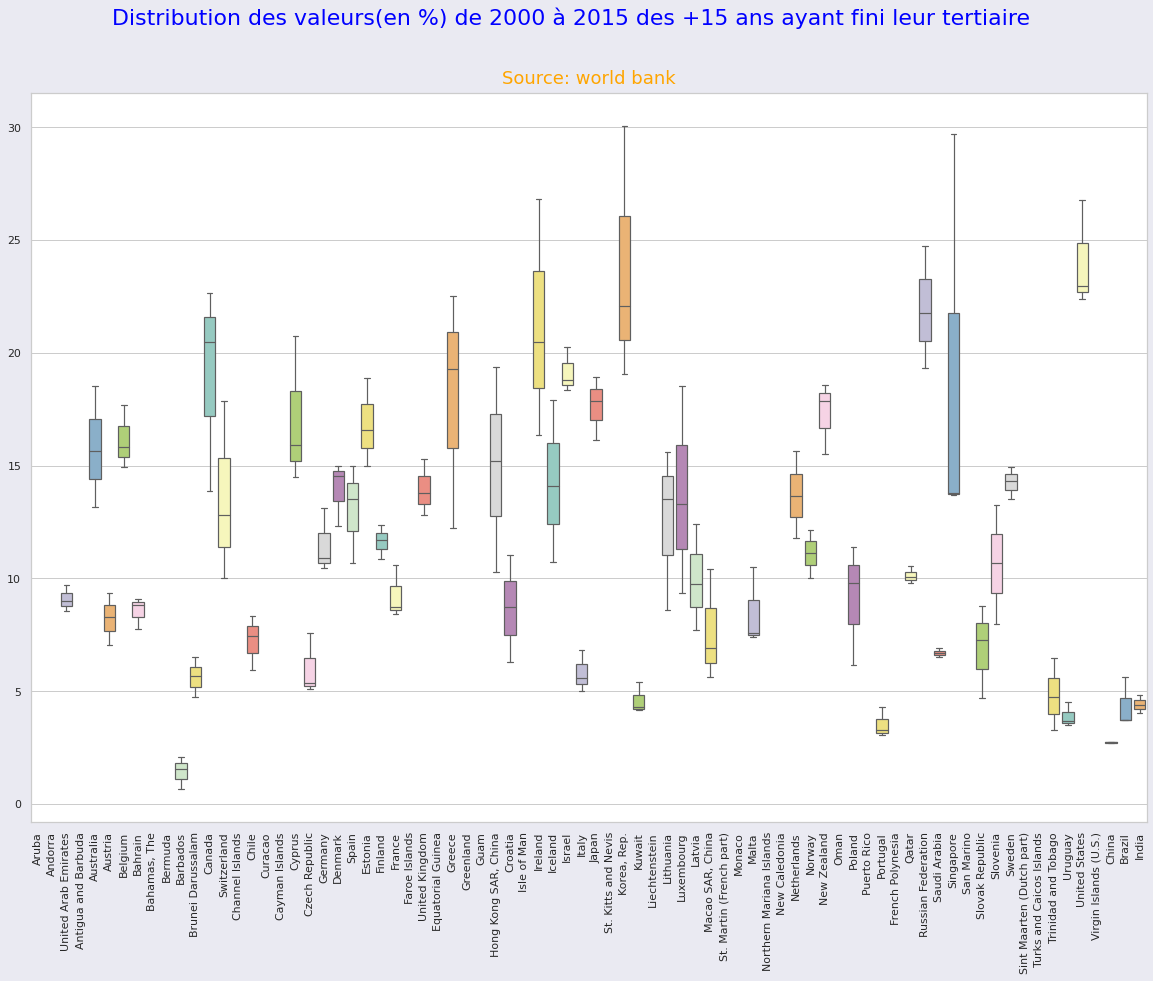

In [447]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(20, 15), facecolor=facecolor)

x = sns.boxplot(data=data_PT152,
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=90)
title = 'Distribution des valeurs(en %) de 2000 à 2015 des +15 ans ayant fini leur tertiaire'
fig.suptitle(title, y=0.88, fontsize=22, color='Blue')
subtitle = 'Source: world bank'
plt.title(subtitle, fontsize=18, pad=10, color='orange')
plt.subplots_adjust(top=0.80)



fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data_int['Country Name'], data_int['2000'], color='grey')
plt.setp(ax.get_xtickslabels(), rotation=90)
plt.xlabel('pays', fontsize=15) # Titre des abscisses
plt.ylabel('nombre de personnes ', fontsize=15)  # Titre des ordonnés
plt.title('Nombre personnes connectée selon pays', fontsize=15)


## **Conclusion**

Nous retenons de ces indicateurs que quatre:
1. GPD per capita (current US$)
2. Internet users (per 100)
3. Percentage of population age 15+ with secondary schoolin . complete secondary
4. Percentage of population age 15+ with tertiary schoolin . complete tertiary

Le dernier "Personal Computers (per 100)", vue qu enous n'avons aucune valeur cela ne vas pas nous aider pour  le chapitre suivant. celui de l'analyse.

# **4. Analyse**

In [448]:
time = ['2000', '2001', '2002','2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012','2013','2014','2015' ]

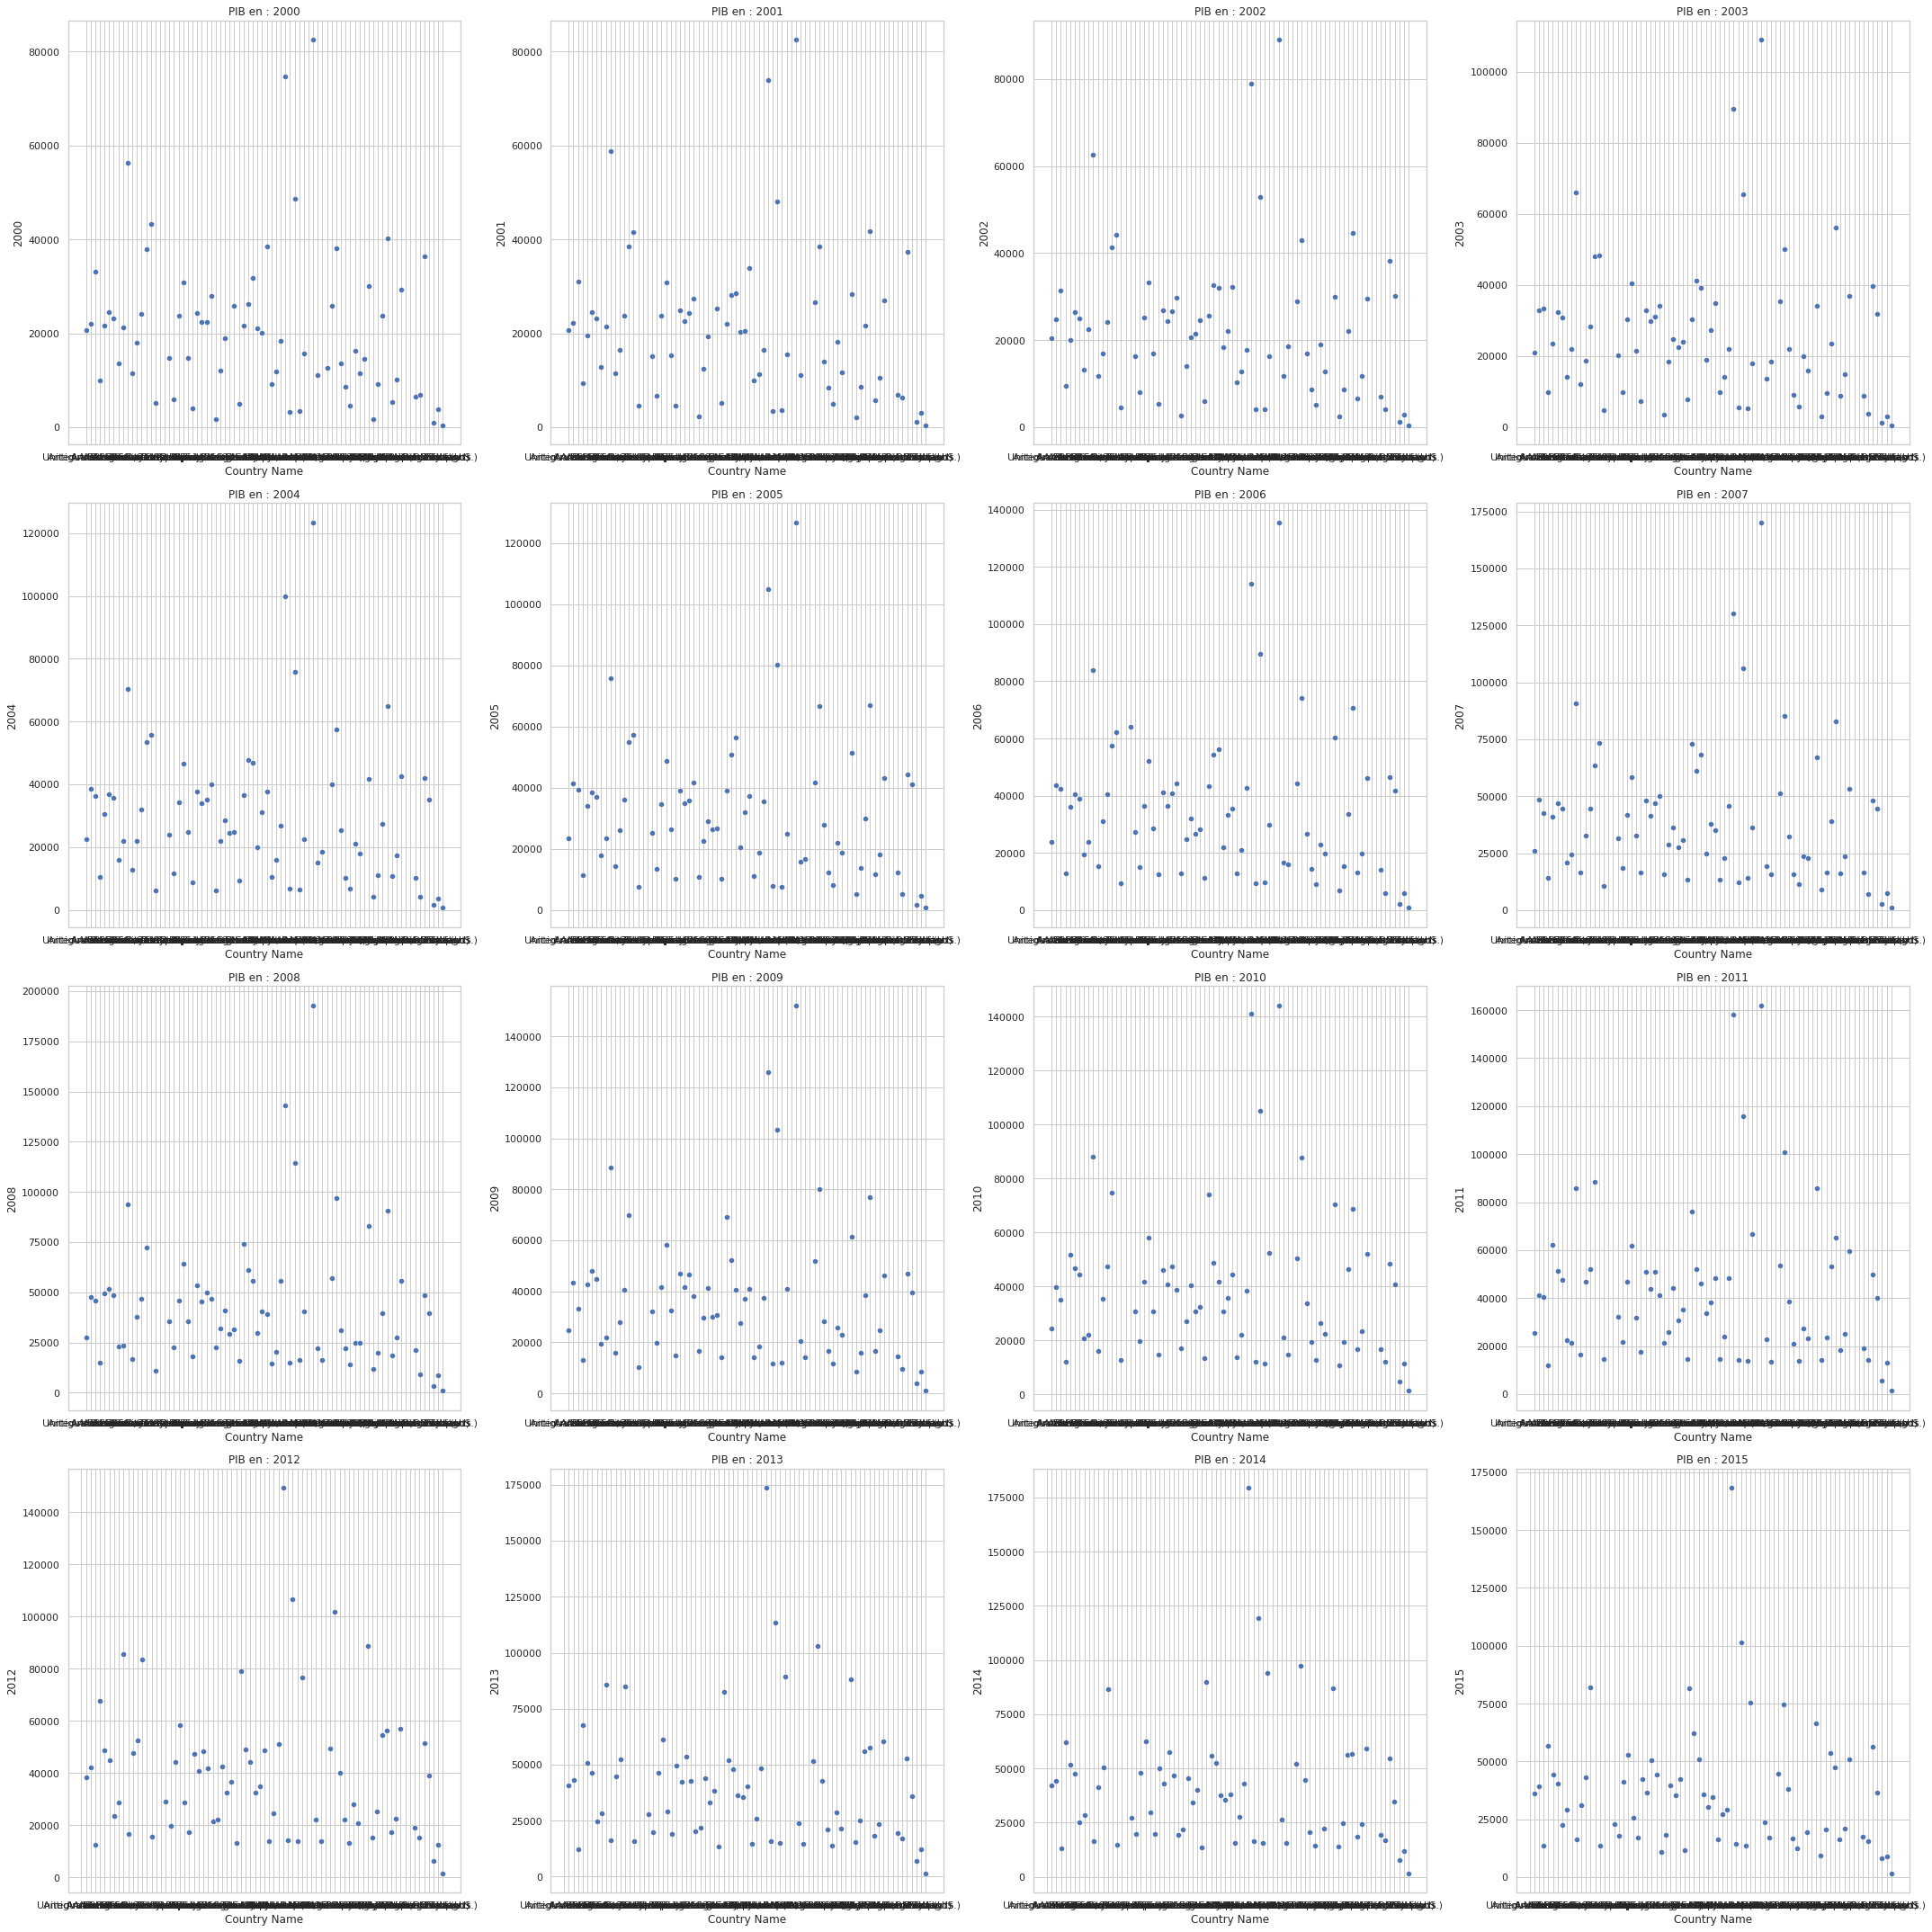

In [449]:
x_ax = range(len(data_gpd))
plt.figure(figsize=(30,30))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"PIB en : " + v   )
    sns.scatterplot(x = data_gpd['Country Name'], y=data_gpd[v])
    plt.tight_layout()
    plt.plot()

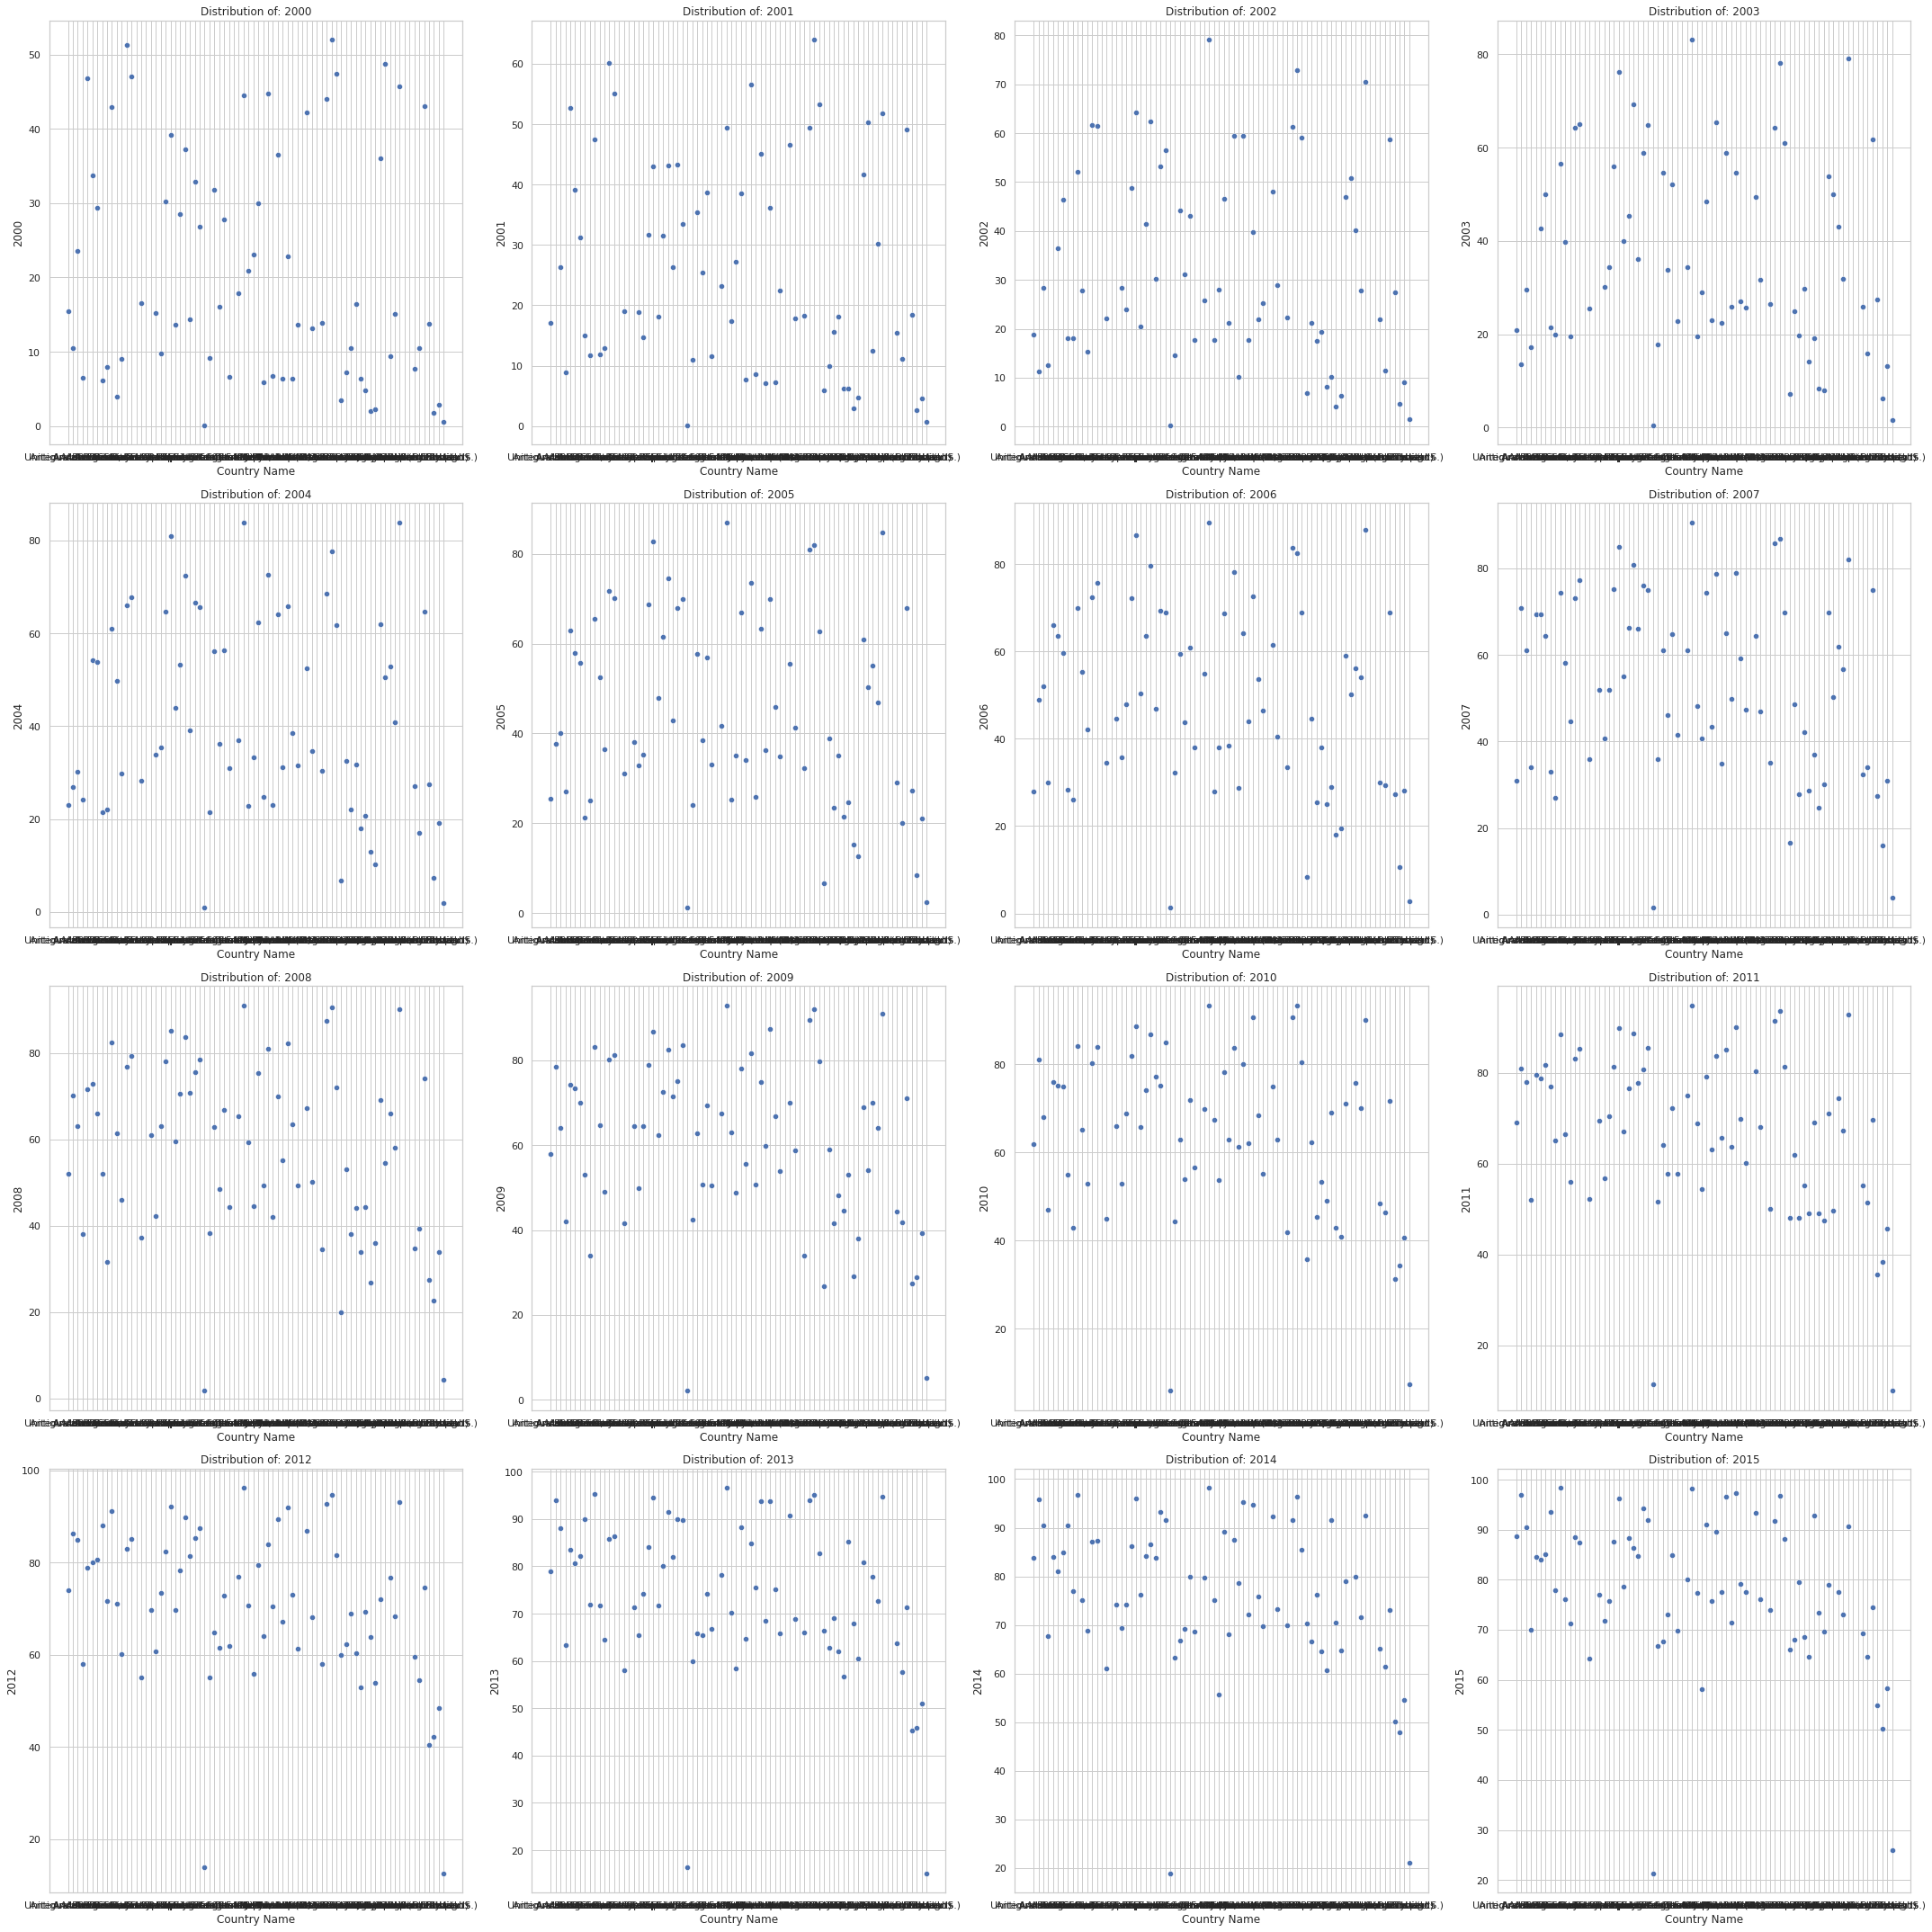

In [450]:
x_ax = range(len(data_int))
plt.figure(figsize=(30,30))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of: " + v   )
    sns.scatterplot(x = data_int['Country Name'], y=data_int[v])
    plt.tight_layout()
    plt.plot()

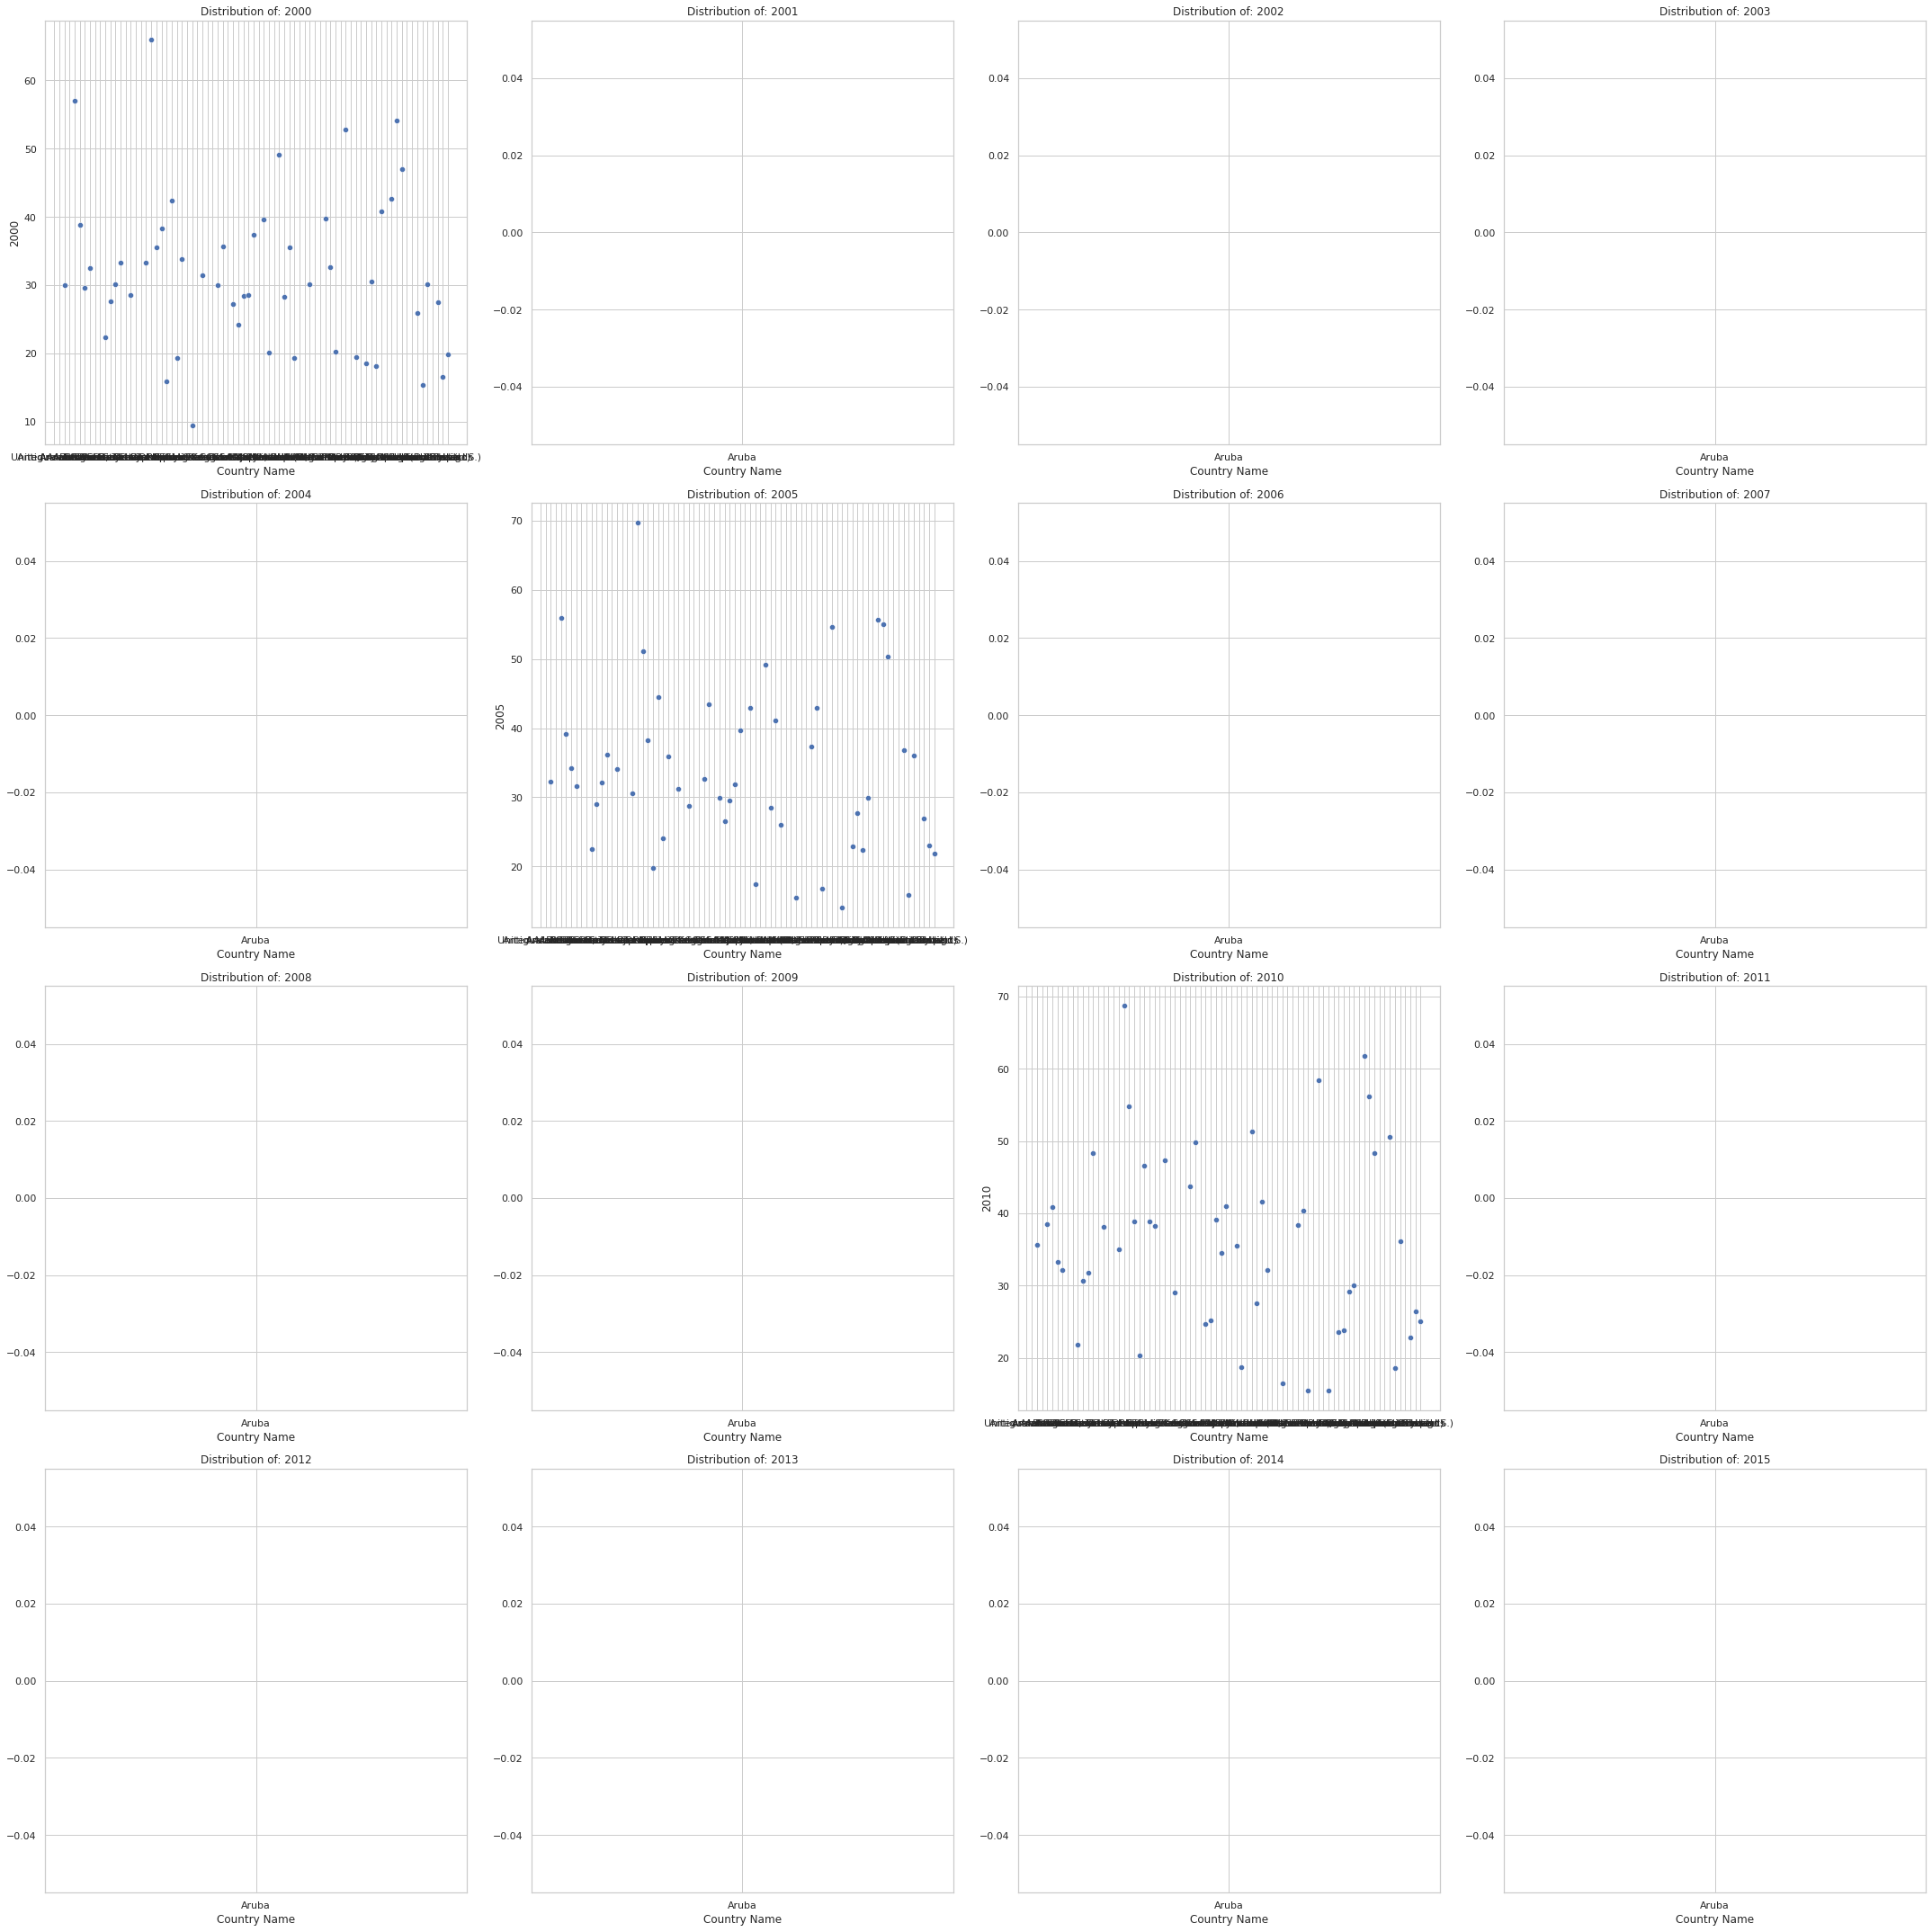

In [451]:
x_ax = range(len(data_PHS15))
plt.figure(figsize=(30,30))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of: " + v   )
    sns.scatterplot(x = data_PHS15['Country Name'], y=data_PHS15[v])
    plt.tight_layout()
    plt.plot()

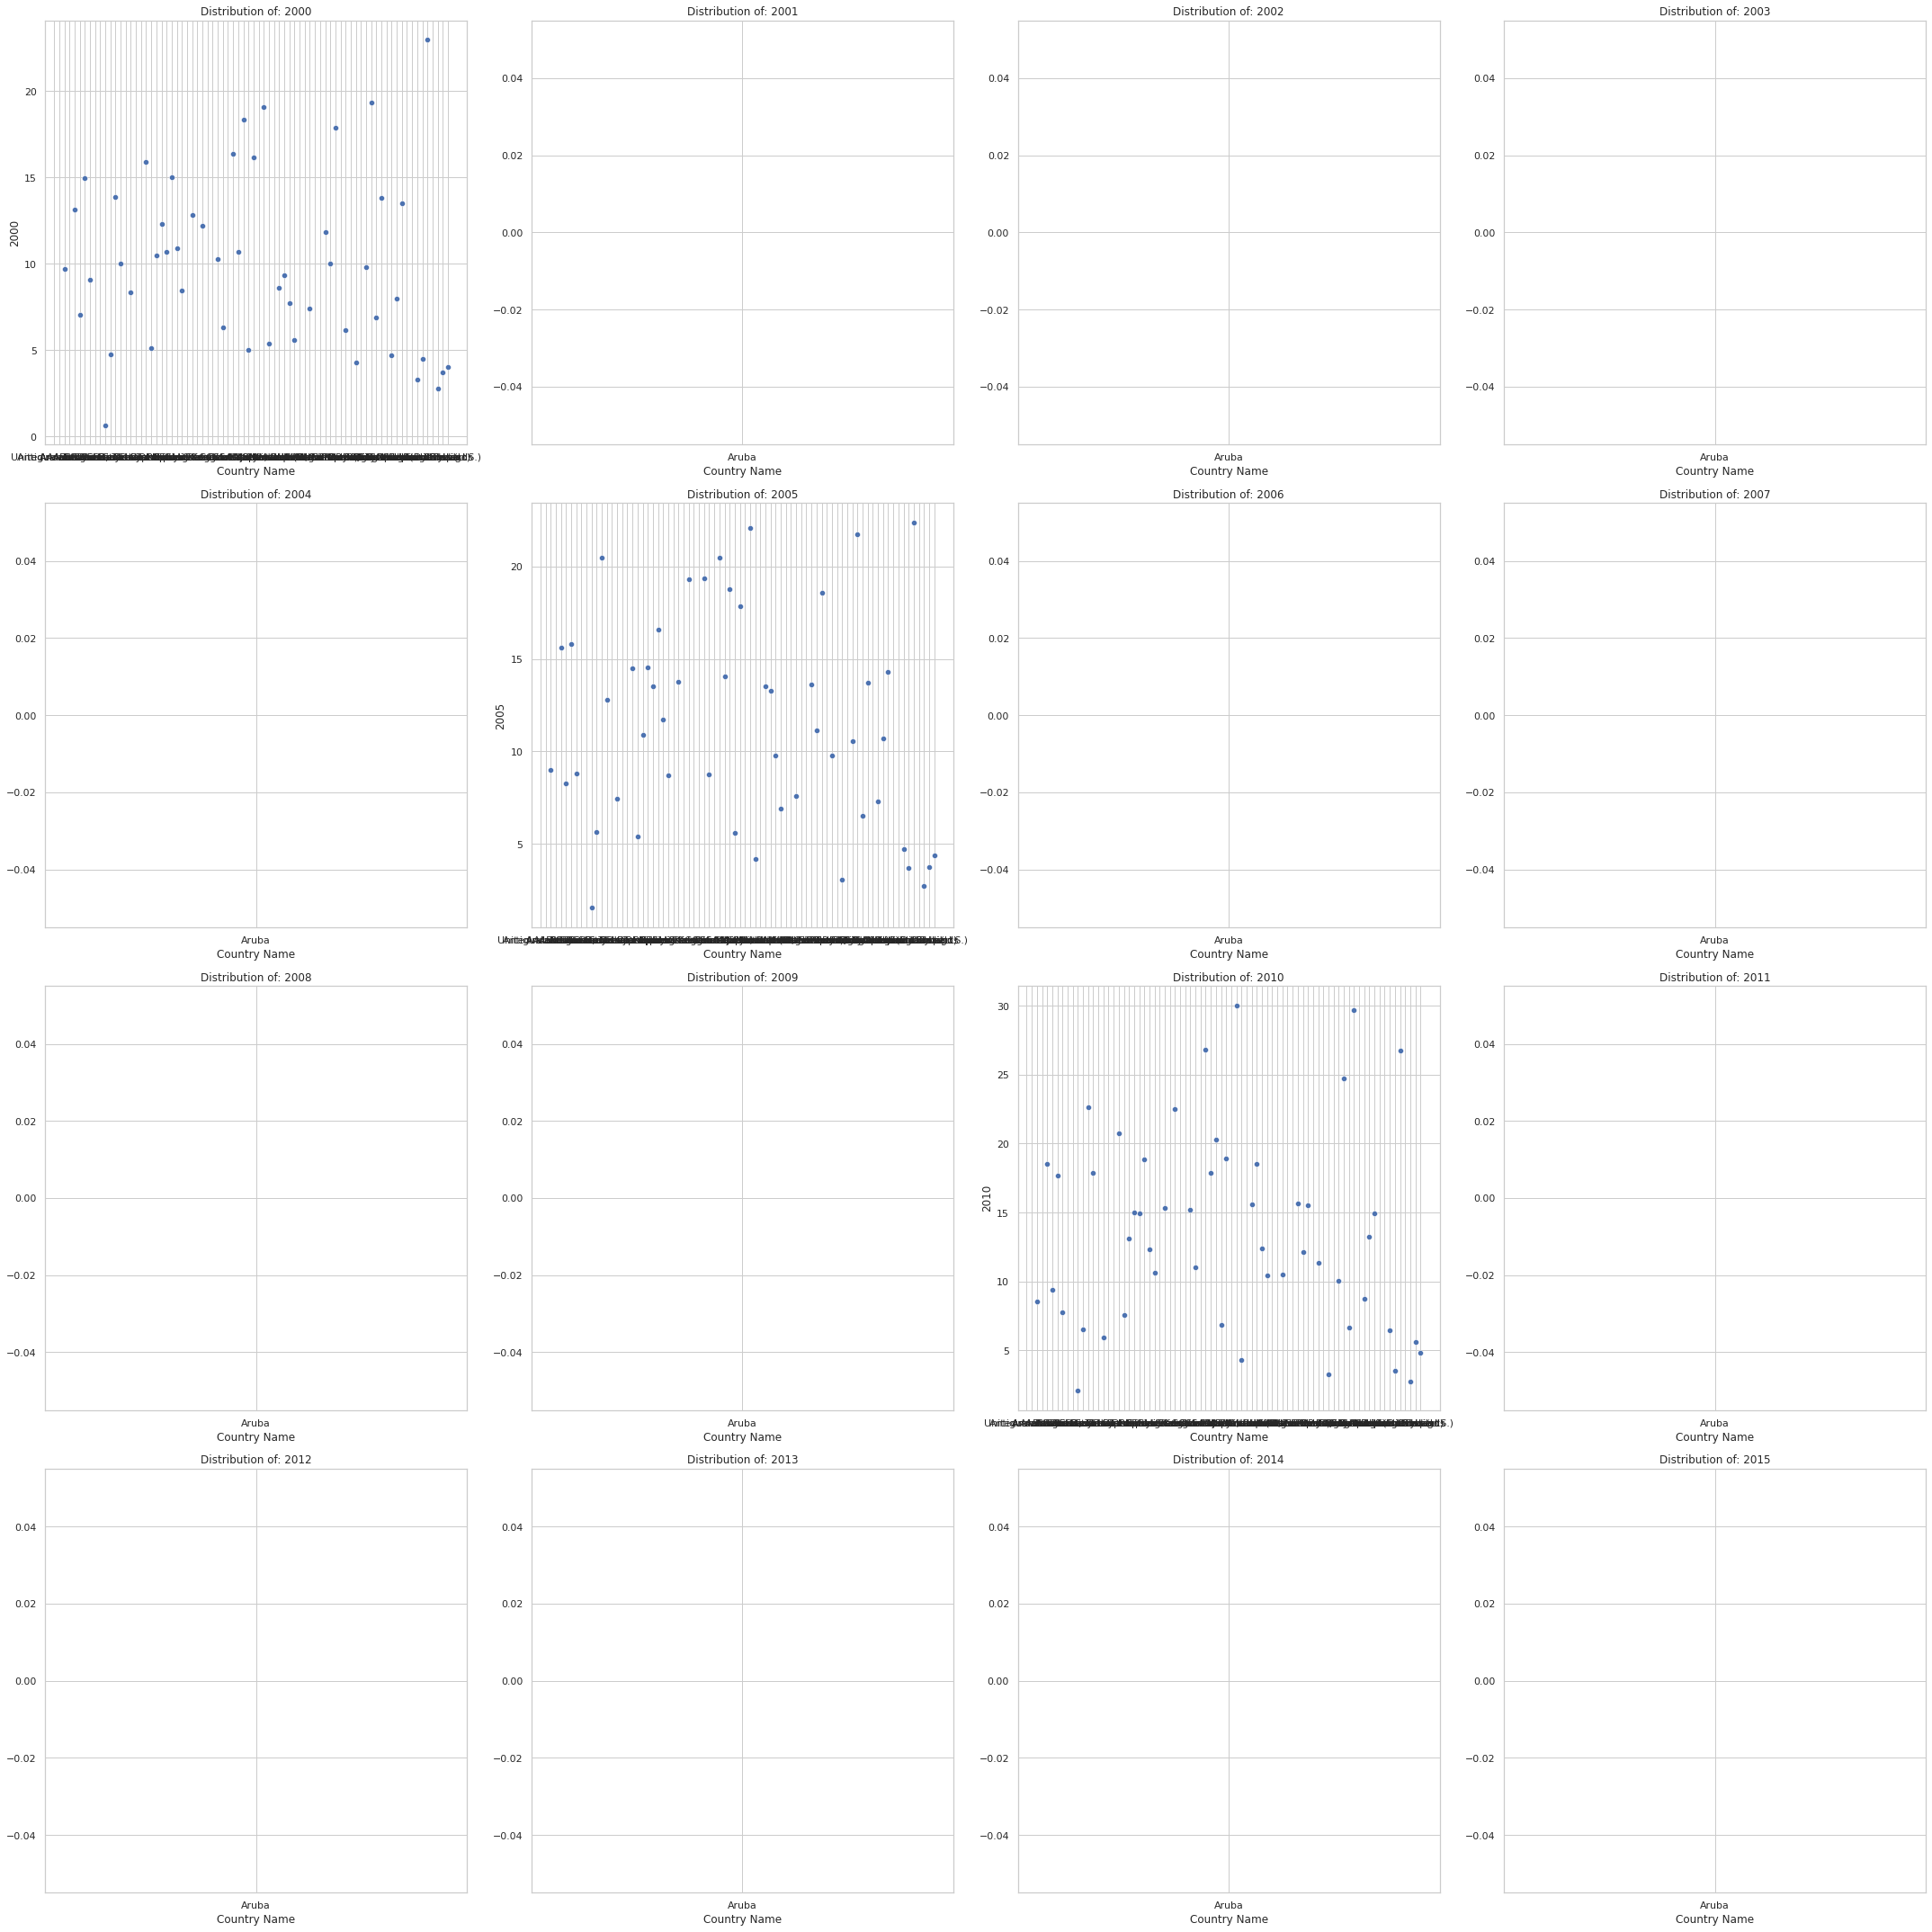

In [452]:
x_ax = range(len(data_PT15))
plt.figure(figsize=(30,30))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"Distribution of: " + v   )
    sns.scatterplot(x = data_PT15['Country Name'], y=data_PT15[v])
    plt.tight_layout()
    plt.plot()

In [453]:
data_int2.columns

Index(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'Bahamas, The', 'Bermuda',
       'Barbados', 'Brunei Darussalam', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'Faroe Islands', 'United Kingdom', 'Equatorial Guinea',
       'Greece', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Croatia',
       'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Monaco', 'Malta',
       'Northern Mariana Islands', 'New Caledonia', 'Netherlands', 'Norway',
       'New Zealand', 'Oman', 'Poland', 'Puerto Rico', 'Portugal',
       'French Polynesia', 'Qatar', 'Russian Federation', 'Saudi Arabia',
   

In [454]:
data_int2.head(1)

Aruba    Andorra  United Arab Emirates  Antigua and Barbuda  \
2000  15.442823  10.538836             23.625301             6.482226   

      Australia    Austria    Belgium   Bahrain  Bahamas, The   Bermuda  ...  \
2000  46.756116  33.730133  29.431692  6.153733           8.0  42.94986  ...   

         Sweden  Sint Maarten (Dutch part)  Turks and Caicos Islands  \
2000  45.687652                        NaN                       NaN   

      Trinidad and Tobago    Uruguay  United States  Virgin Islands (U.S.)  \
2000             7.721411  10.539058      43.079163              13.815081   

         China    Brazil     India  
2000  1.775913  2.870685  0.527532  

[1 rows x 78 columns]

In [455]:
data_int.columns

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

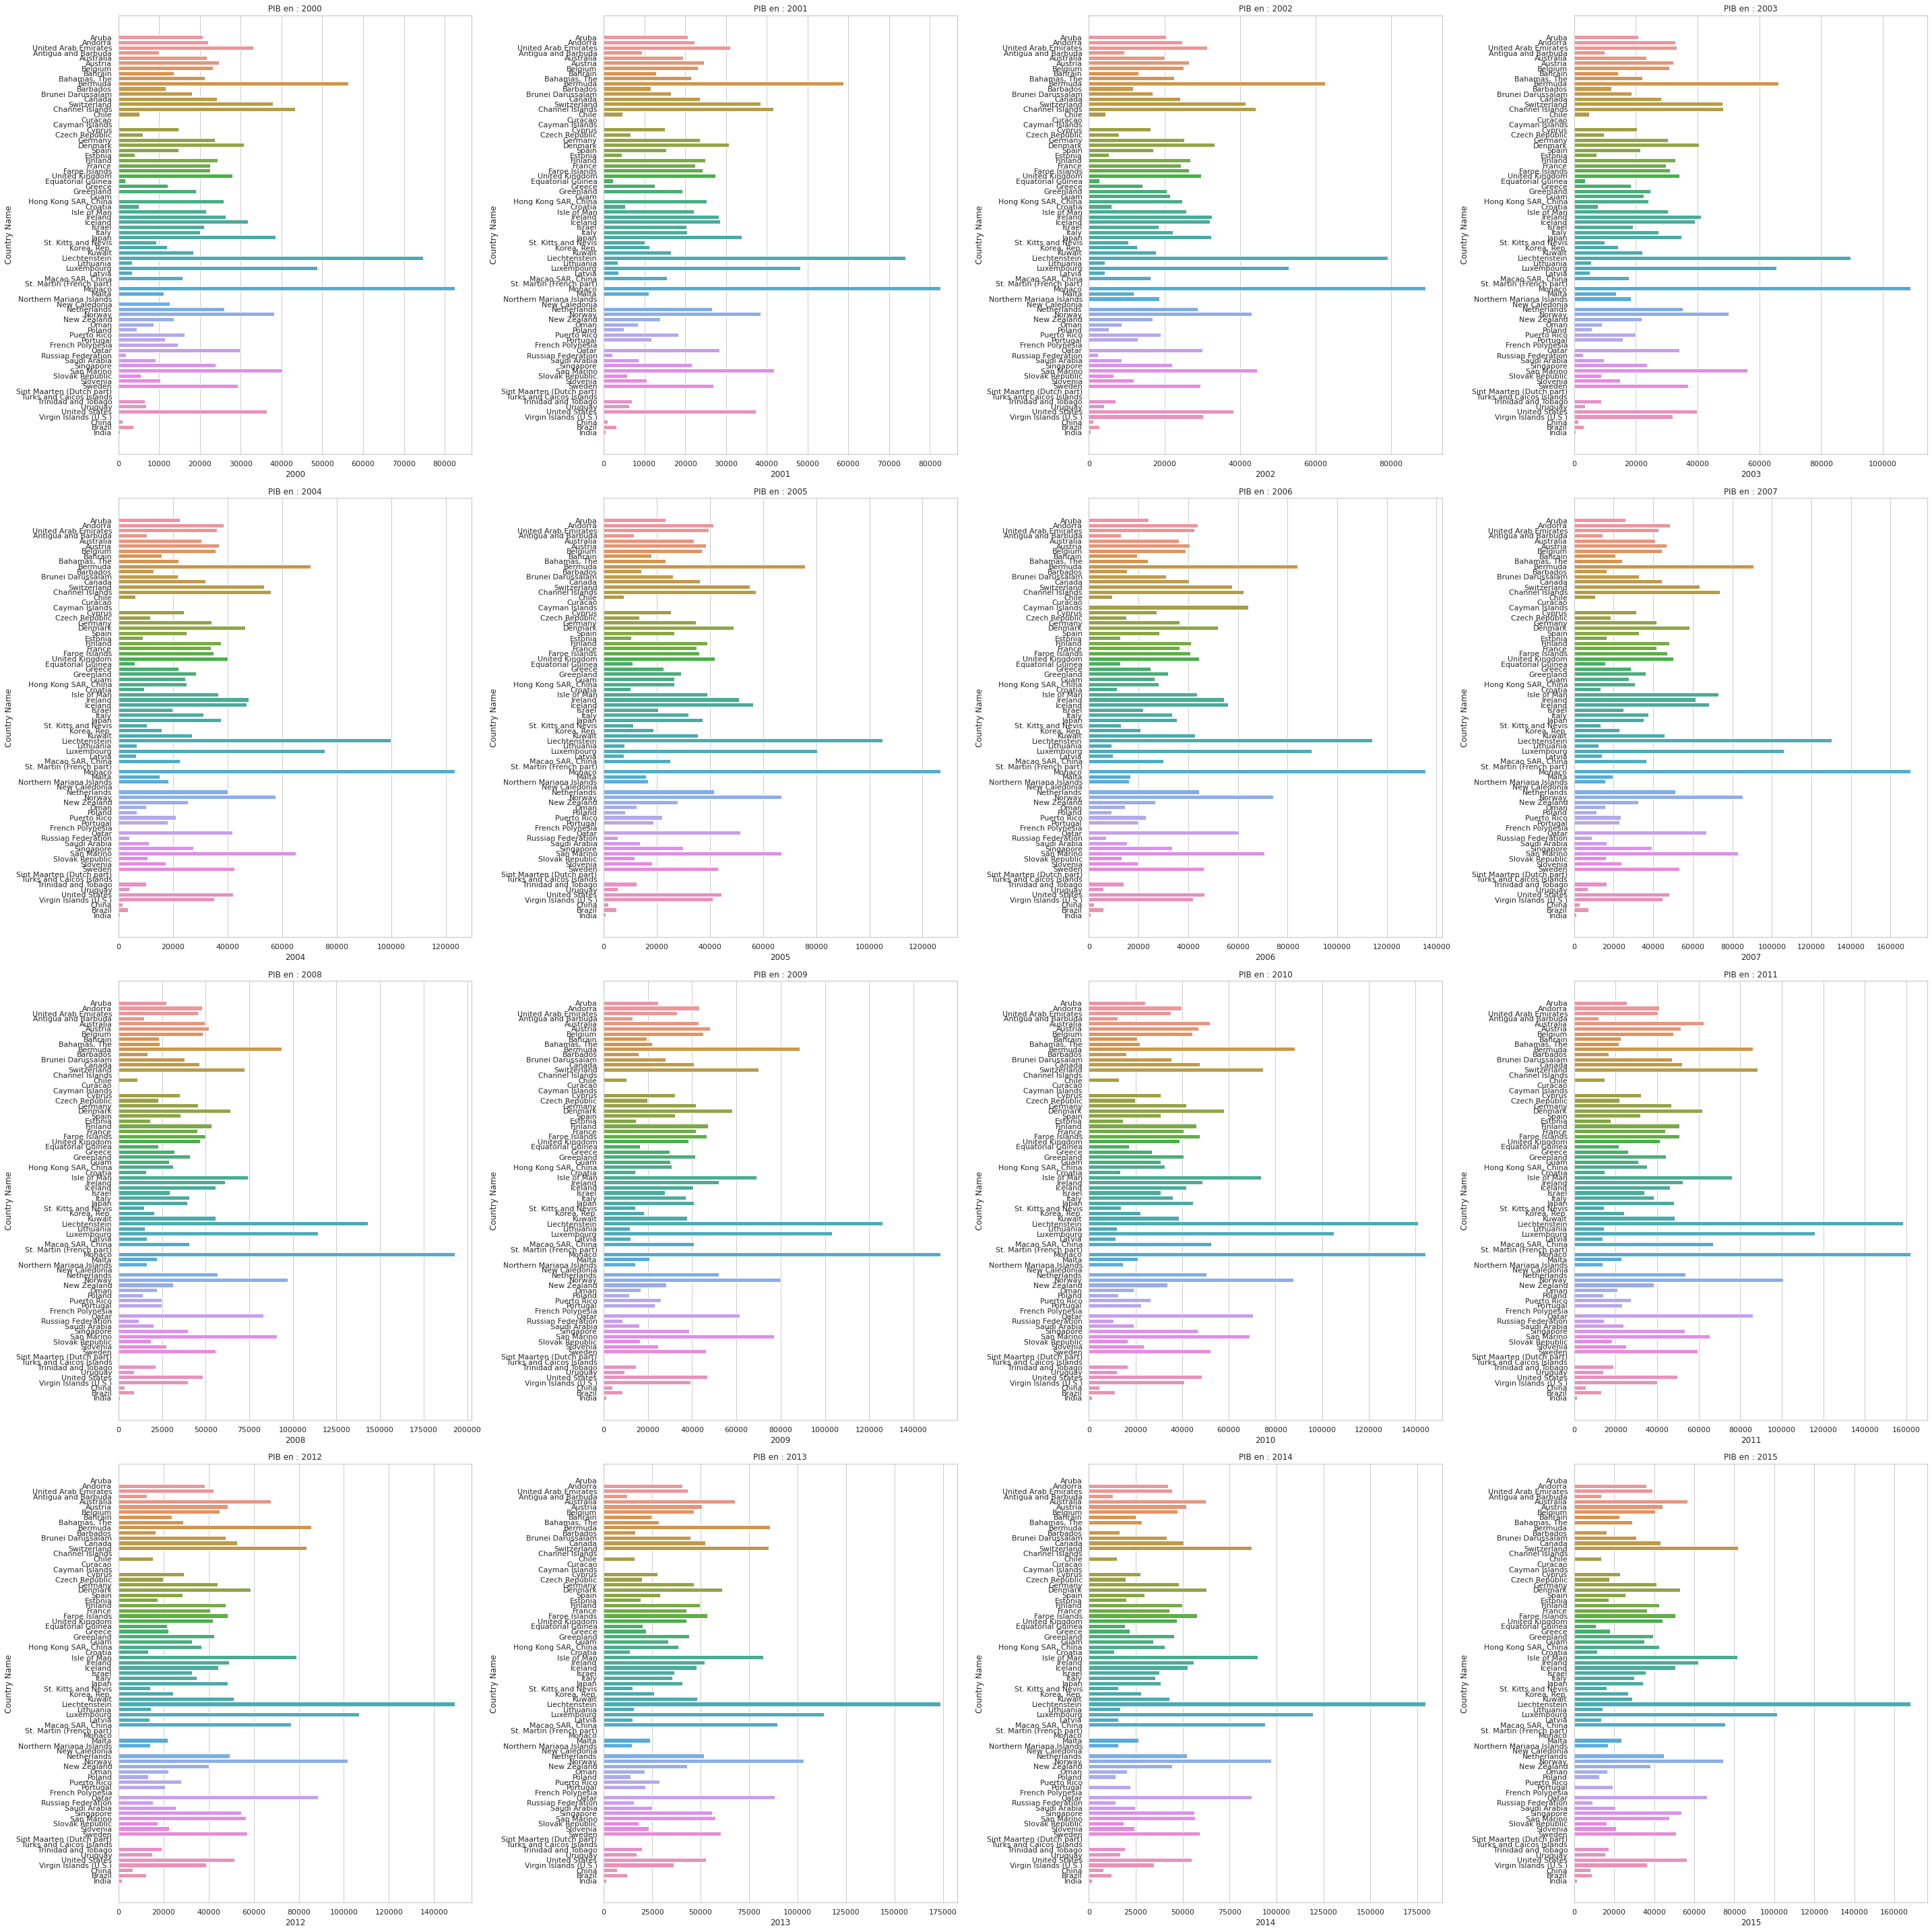

In [456]:
x_ax = range(len(data_gpd))
plt.figure(figsize=(40,40))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"PIB en : " + v   )
    sns.barplot(x = data_gpd[v], y=data_gpd['Country Name'])
    plt.tight_layout()
    plt.plot()

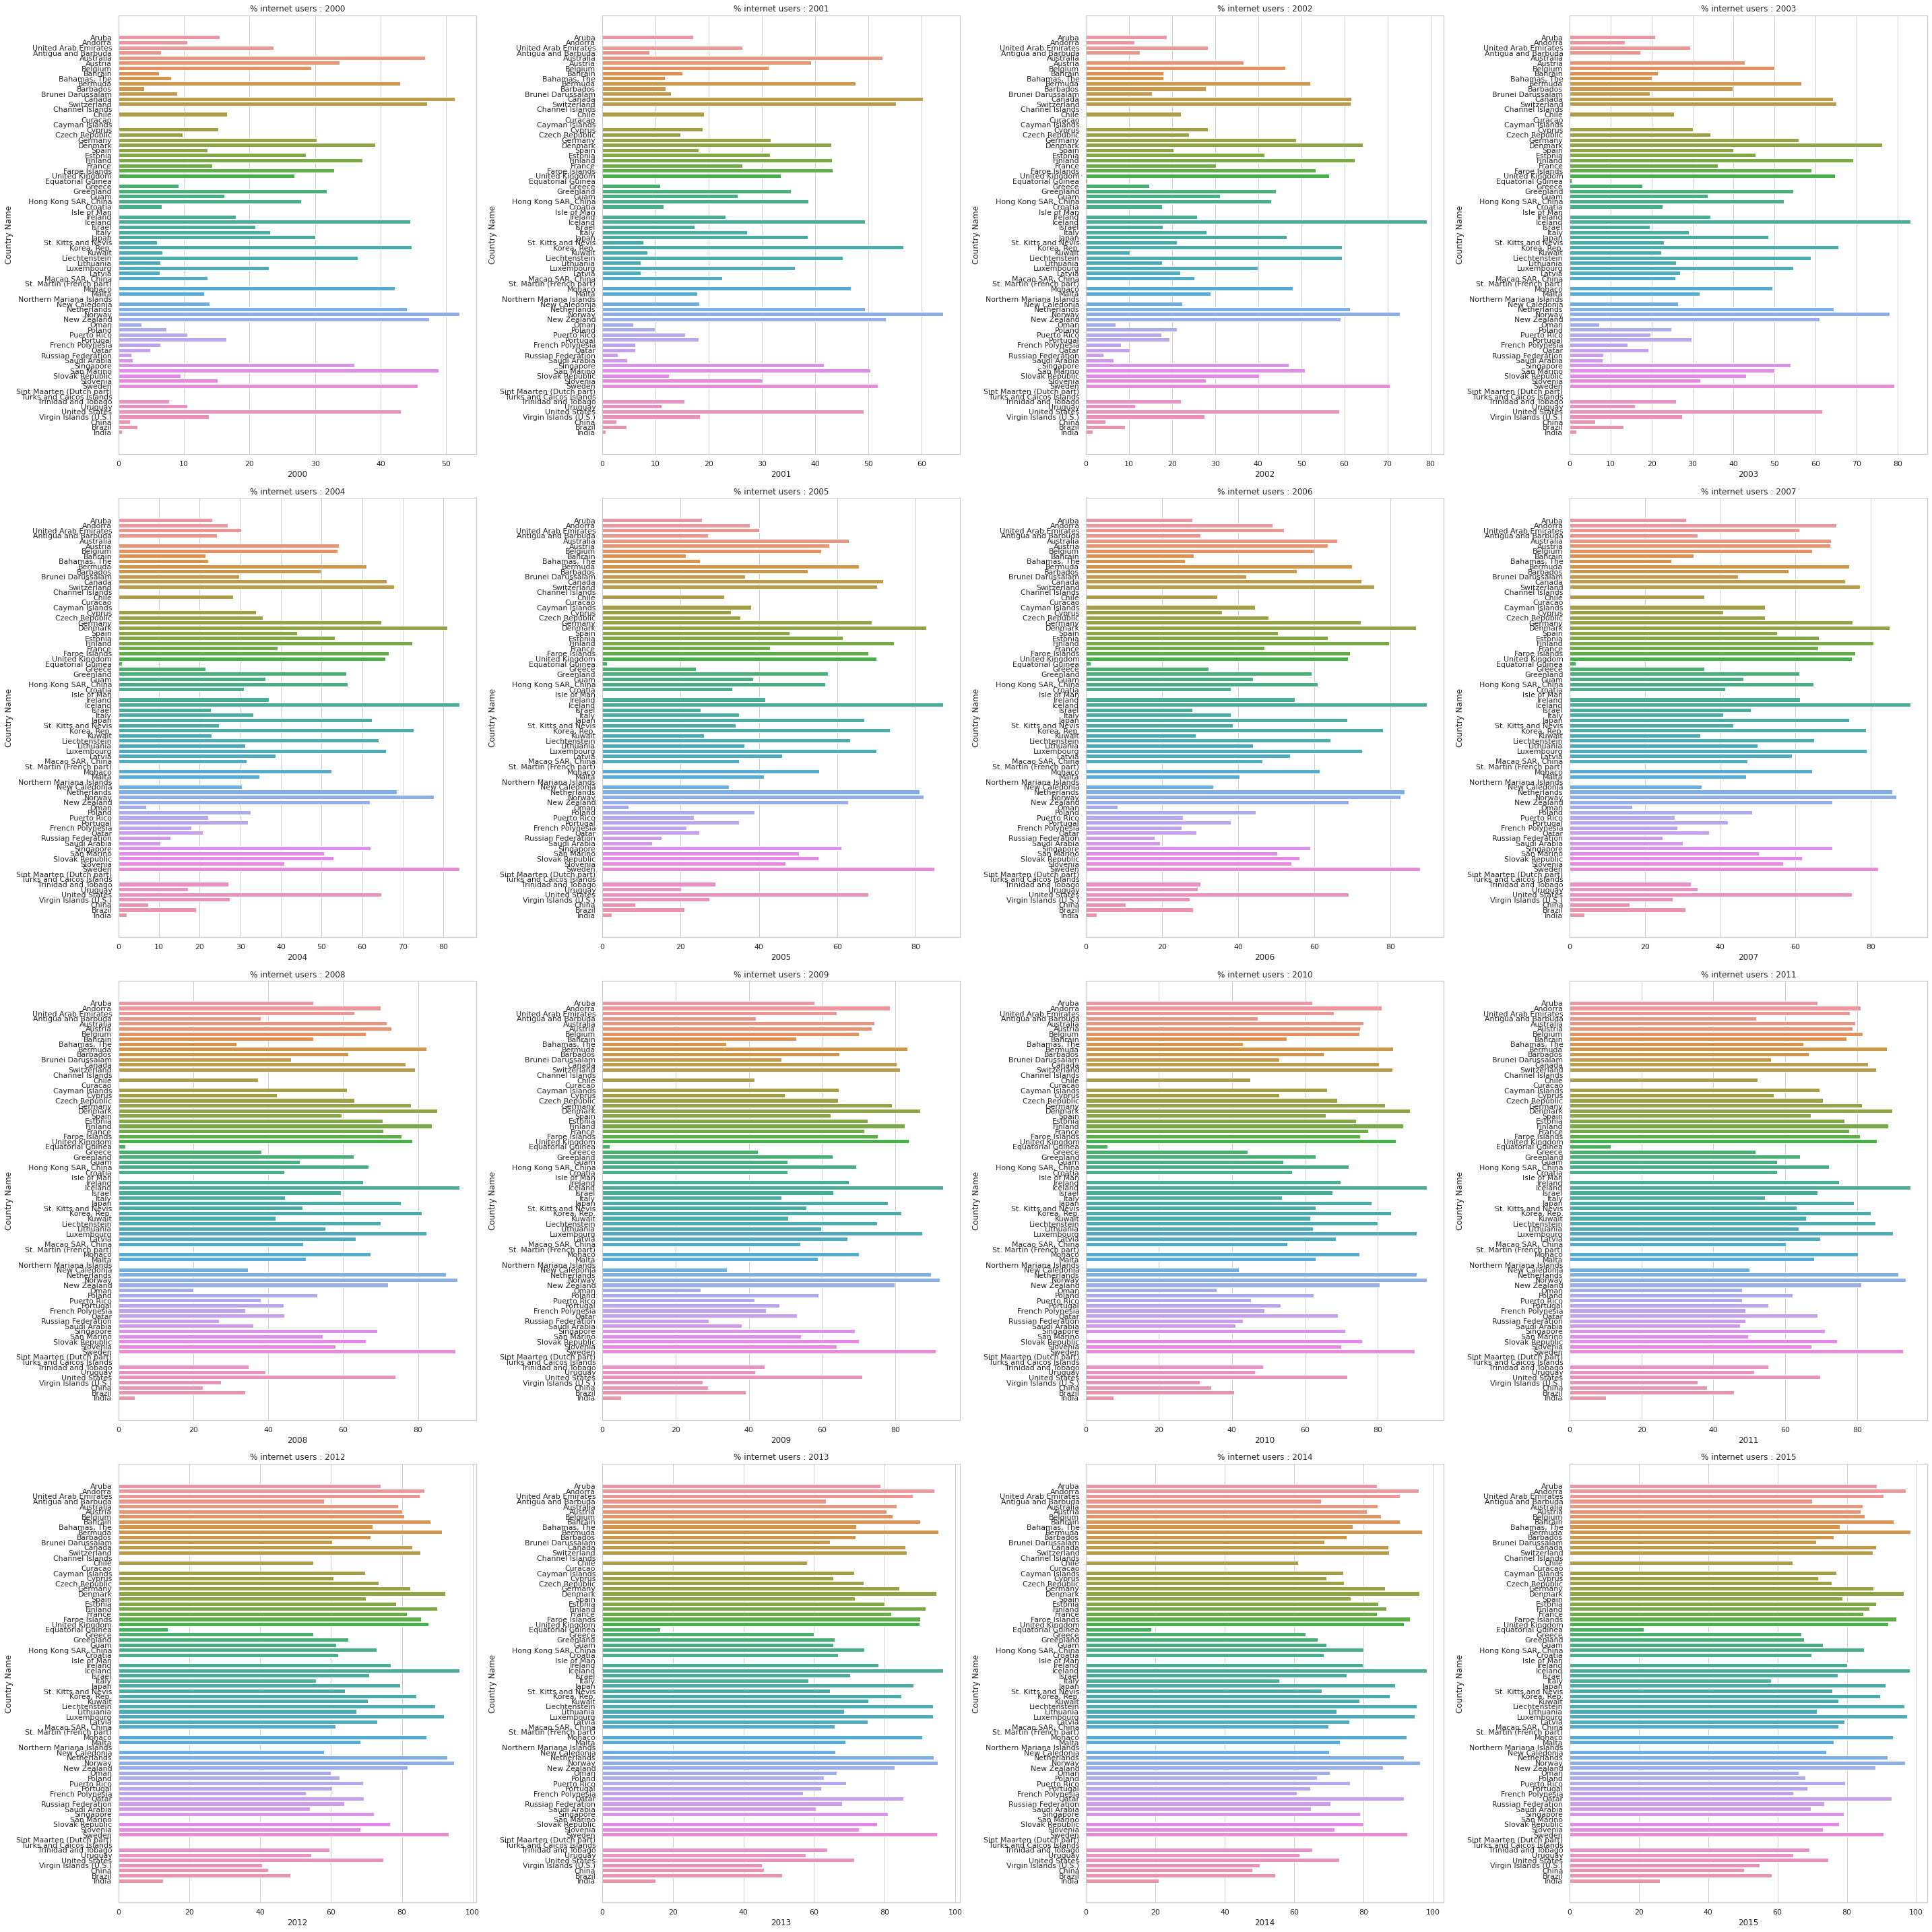

In [457]:
x_ax = range(len(data_int))
plt.figure(figsize=(40,40))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"% internet users : " + v   )
    sns.barplot(x = data_int[v], y=data_int['Country Name'])
    plt.tight_layout()
    plt.plot()

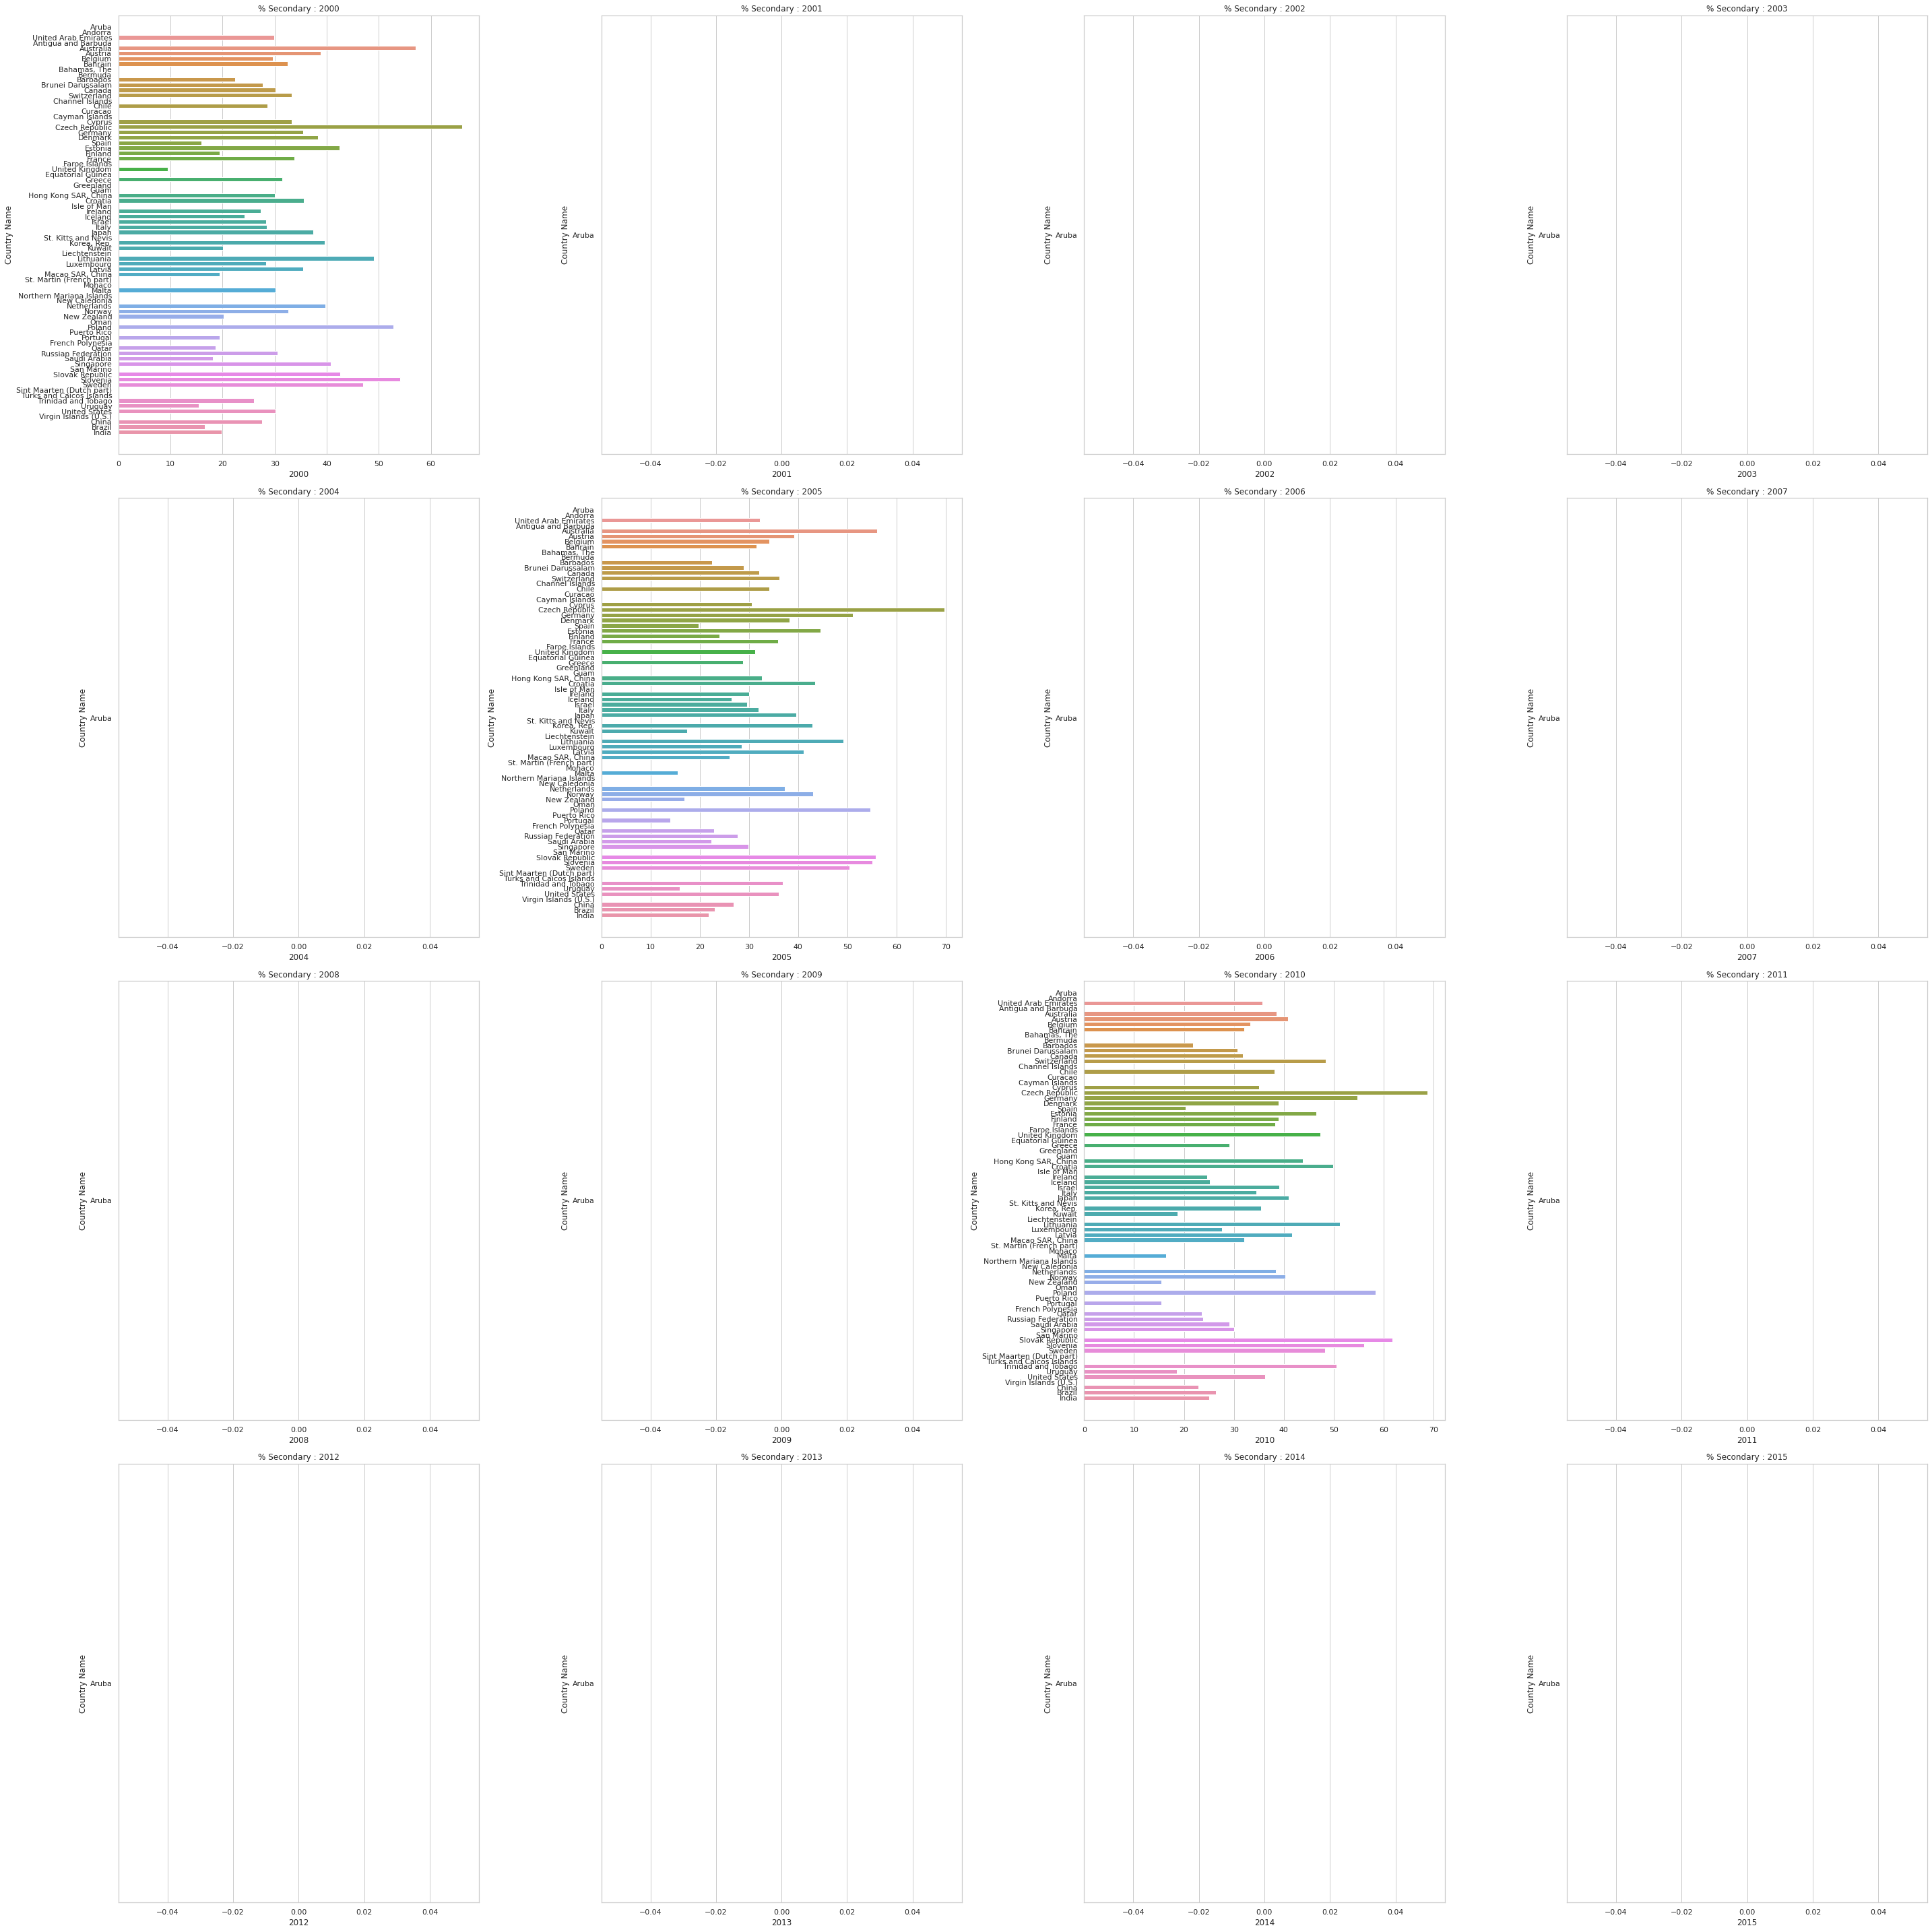

In [458]:
x_ax = range(len(data_PHS15))
plt.figure(figsize=(40,40))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"% Secondary : " + v   )
    sns.barplot(x = data_PHS15[v], y=data_PHS15['Country Name'])
    plt.tight_layout()
    plt.plot()

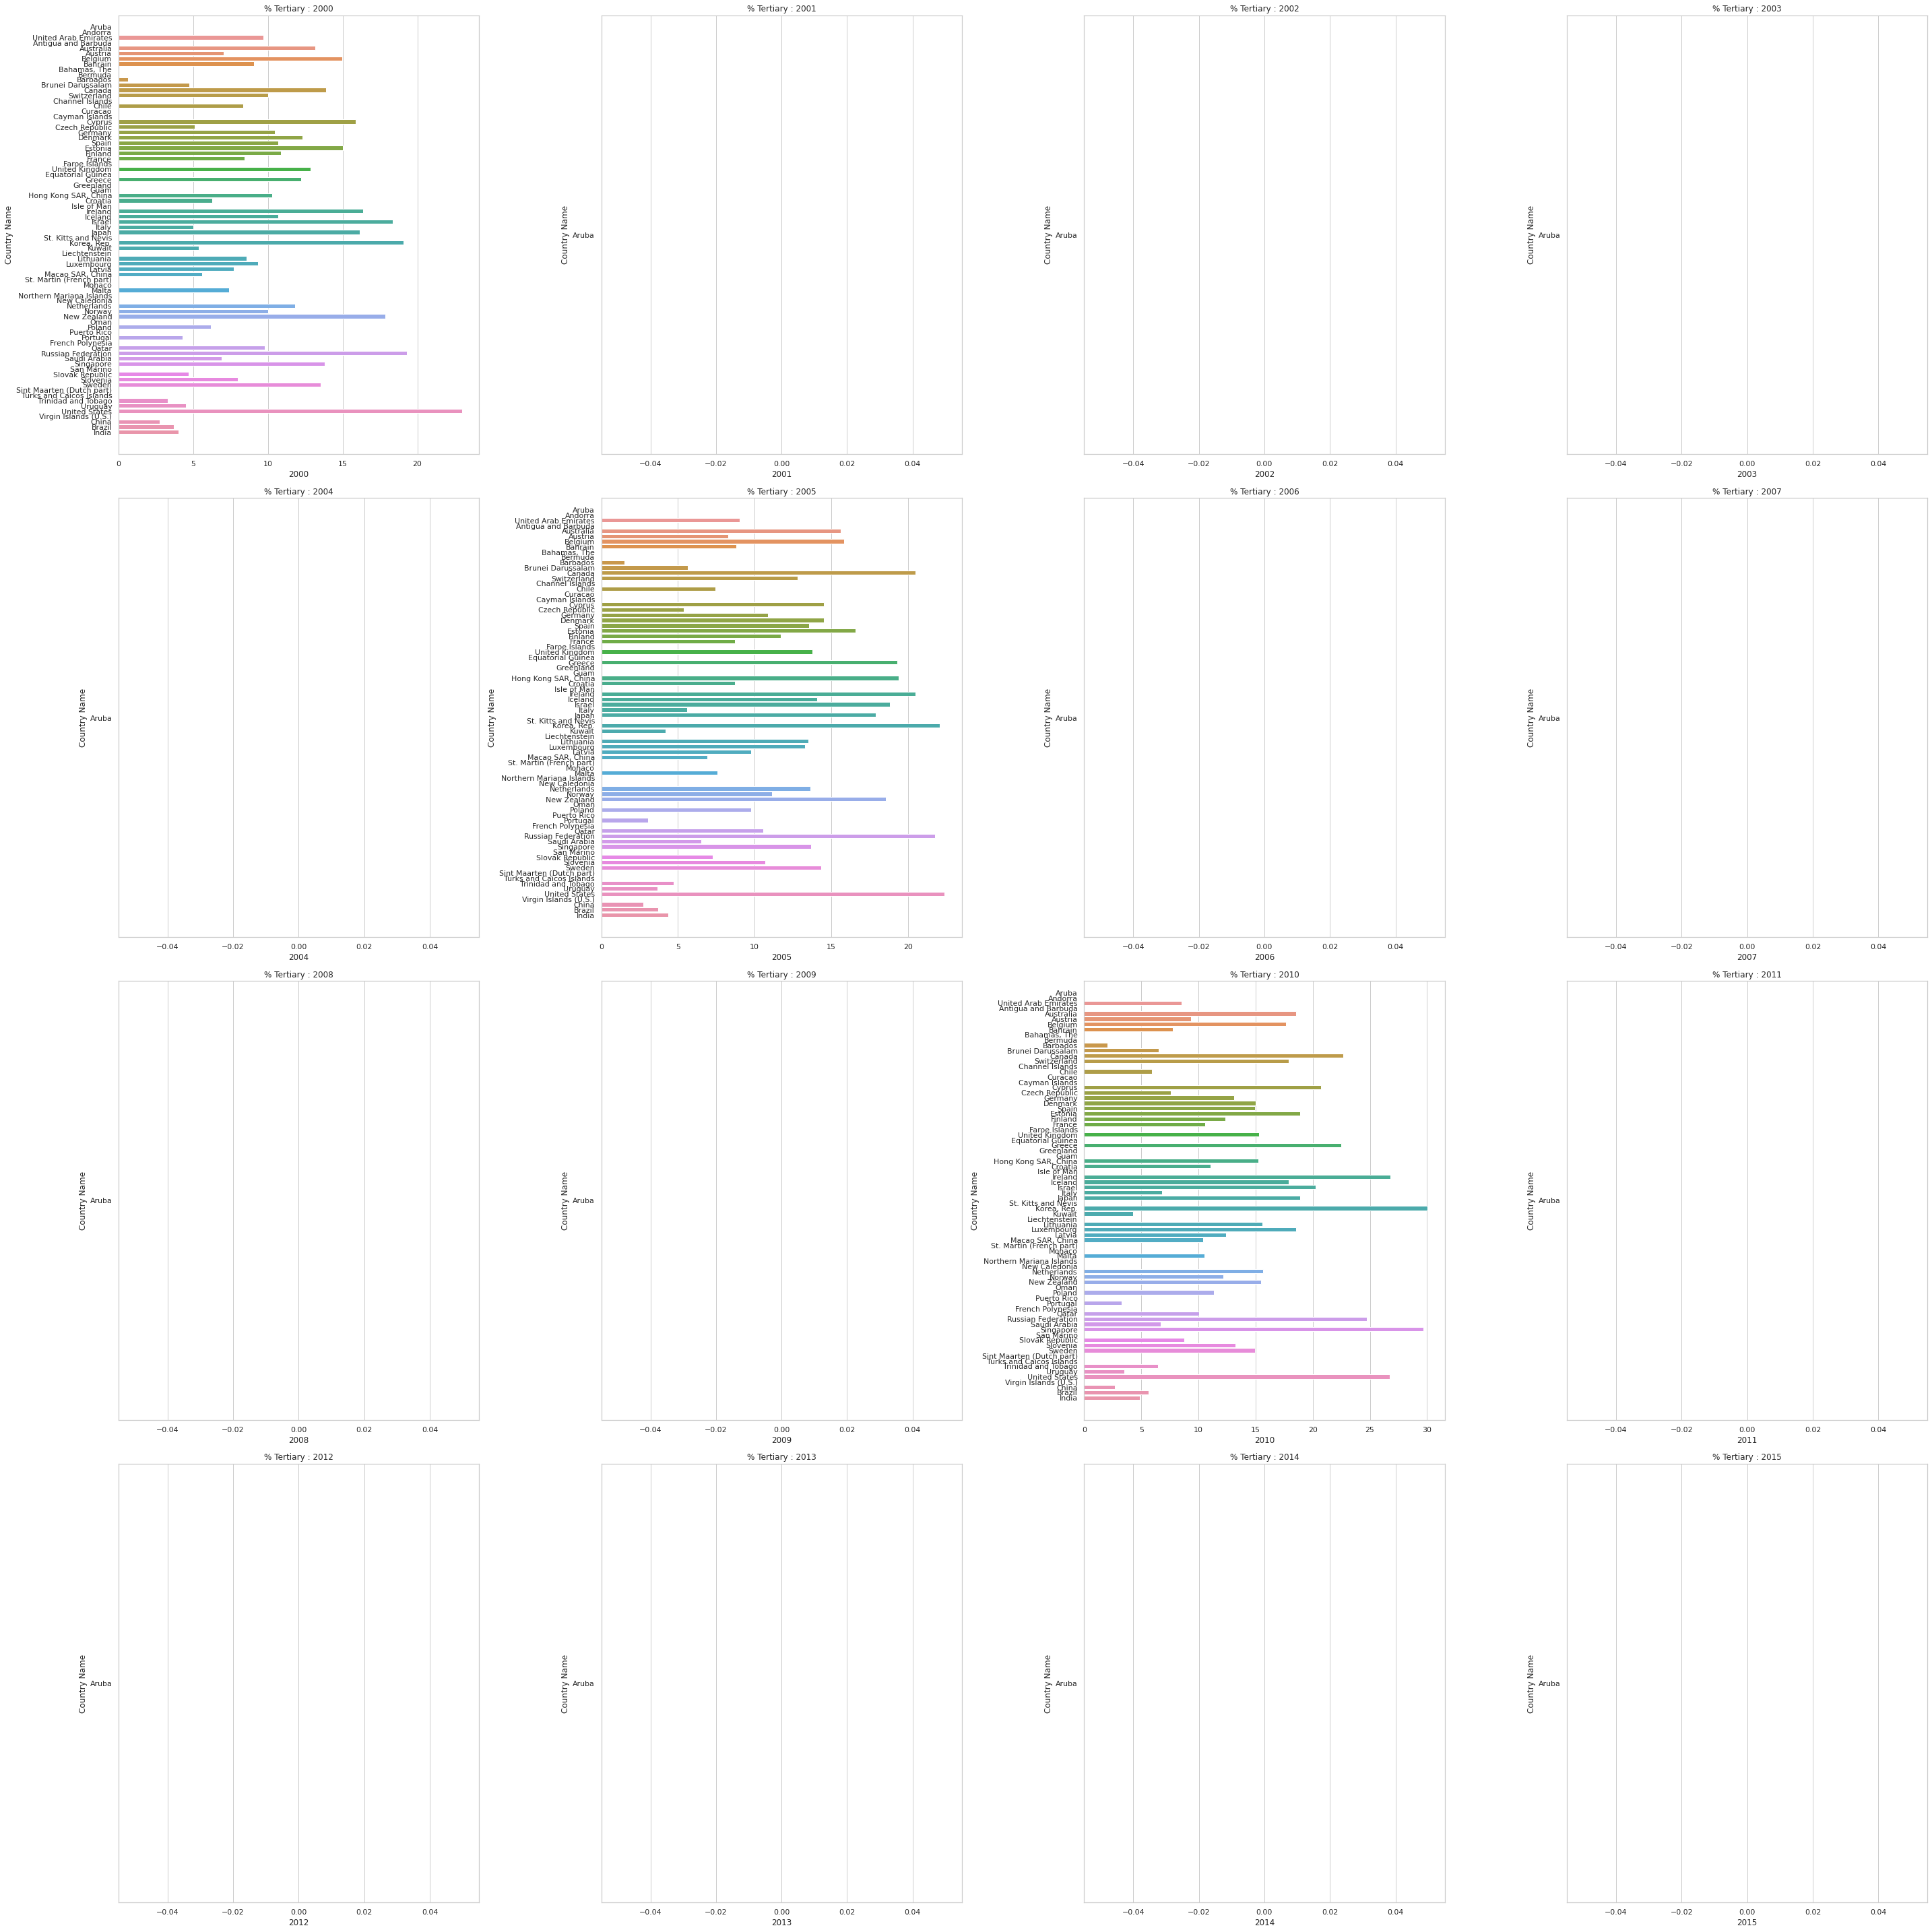

In [459]:
x_ax = range(len(data_PT15))
plt.figure(figsize=(40,40))
plt.setp(ax.get_xticklabels(), rotation=90)

for i,v in enumerate(time,1):
    plt.subplot(4,4,i)
    plt.title(f"% Tertiary : " + v   )
    sns.barplot(x = data_PT15[v], y=data_PT15['Country Name'])
    plt.tight_layout()
    plt.plot()

## Moyenne

In [460]:
# filtrons les pays selon les 10 moyennes les plus hautes
gdp21 = (data_gpd2.mean(axis= 0)).dropna(how = all).sort_values(axis = 0 , ascending = False).head(5) # les moyennes des PIB des pays par ordre decroissant , on retire les valeurs nan
int21 = (data_int2.mean(axis= 0)).dropna(how = all).sort_values(axis = 0 , ascending = False).head(5)  # les moyennes des Internet users 
psh21 = (data_PHS152.mean(axis= 0)).dropna(how = all).sort_values(axis = 0 , ascending = False).head(5) # les moyennes des pourcentages des population plus de 15 ans ayant fini le secondaire
th21 = (data_PT152.mean(axis= 0)).dropna(how = all).sort_values(axis = 0 , ascending = False).head(5) #les moyennes des pourcentages des  population plus de 15 ans ayant fini le tertiaire

In [461]:
#Affichons le top 5 des moyennes des pays par indicateurs (PIB, utilsateurs internet, secadry completed 15+, tertiary completed 15+)
for x in [gdp21, int21, psh21, th21]:
  print ("le top 5\n", x ,"--------------------------" )

le top 5
 Monaco           130851.110457
Liechtenstein    125304.549217
Luxembourg        90395.114611
Bermuda           78023.047081
Norway            74719.115657
dtype: float64 --------------------------
le top 5
 Iceland        85.527488
Norway         84.279604
Sweden         82.531693
Denmark        80.474386
Netherlands    79.214663
dtype: float64 --------------------------
le top 5
 Czech Republic     68.146667
Poland             55.300000
Slovenia           55.083333
Slovak Republic    53.366667
Australia          50.503333
dtype: float64 --------------------------
le top 5
 United States         24.040000
Korea, Rep.           23.736667
Russian Federation    21.940000
Ireland               21.213333
Israel                19.133333
dtype: float64 --------------------------


## Mediane

In [462]:
# filtrons les pays selon les 5 medianes les plus hautes
gdp21m = ((data_gpd2.median(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = False).head(5) # les moyennes des PIB des pays par ordre decroissant , on retire les valeurs nan
int21m = ((data_int2.median(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = False).head(5)   # les moyennes des Internet users 
psh21m = ((data_PHS152.median(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = False).head(5)  # les moyennes des pourcentages des population plus de 15 ans ayant fini le secondaire
th21m =( (data_PT152.median(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = False).head(5)   # population plus de 15 ans ayant fini le tertiaire

In [463]:
#Affichons le top 5 des medianes pays par indicateurs (PIB, utilsateurs internet, secadry completed 15+, tertiary completed 15+)
for x in [gdp21m, int21m, psh21m, th21m]:
  print ("le top 5\n", x ,"--------------------------" )

le top 5
 Monaco           131095.300248
Liechtenstein    128106.126448
Luxembourg       102322.727808
Bermuda           84685.576653
Norway            77294.373285
dtype: float64 --------------------------
le top 5
 Iceland        90.80
Sweden         88.88
Norway         88.75
Netherlands    86.62
Denmark        85.84
dtype: float64 --------------------------
le top 5
 Czech Republic     68.77
Australia          55.98
Slovak Republic    55.71
Slovenia           55.03
Poland             54.67
dtype: float64 --------------------------
le top 5
 United States         22.97
Korea, Rep.           22.09
Russian Federation    21.77
Ireland               20.47
Canada                20.47
dtype: float64 --------------------------


## Ecart-type

In [464]:
# filtrons les pays selon les 5 Ecarts-types les plus hautes
gdp21e = ((data_gpd2.std(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = True).head(5) # les moyennes des PIB des pays par ordre decroissant , on retire les valeurs nan
int21e = ((data_int2.std(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = True).head(5)  # les moyennes des Internet users 
psh21e = ((data_PHS152.std(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = True).head(5) # les moyennes des pourcentages des population plus de 15 ans ayant fini le secondaire
th21e =( (data_PT152.std(axis= 0)).dropna(how = all)).sort_values(axis = 0 , ascending = True).head(5) #population plus de 15 ans ayant fini le tertiaire

In [465]:
#Affichons le top 5 des ecarts-types pays par indicateurs (PIB, utilsateurs internet, secadry completed 15+, tertiary completed 15+)
for x in [gdp21e, int21e, psh21e, th21e]:
  print ("le top 5\n", x ,"--------------------------" )

le top 5
 India                        433.469025
Northern Mariana Islands    1691.340829
Antigua and Barbuda         1717.236542
Barbados                    2066.400531
St. Kitts and Nevis         2285.333139
dtype: float64 --------------------------
le top 5
 San Marino            1.804575
Equatorial Guinea     7.557254
India                 7.683911
United States         9.410371
Greenland            10.933171
dtype: float64 --------------------------
le top 5
 Denmark       0.327159
Barbados      0.400666
Bahrain       0.457639
Luxembourg    0.480729
Slovenia      1.011056
dtype: float64 --------------------------
le top 5
 China           0.020000
Saudi Arabia    0.205994
Qatar           0.381881
India           0.420991
Uruguay         0.535070
dtype: float64 --------------------------


In [466]:
data_gpd2.columns

Index(['Aruba', 'Andorra', 'United Arab Emirates', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Belgium', 'Bahrain', 'Bahamas, The', 'Bermuda',
       'Barbados', 'Brunei Darussalam', 'Canada', 'Switzerland',
       'Channel Islands', 'Chile', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland',
       'France', 'Faroe Islands', 'United Kingdom', 'Equatorial Guinea',
       'Greece', 'Greenland', 'Guam', 'Hong Kong SAR, China', 'Croatia',
       'Isle of Man', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'St. Kitts and Nevis', 'Korea, Rep.', 'Kuwait', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao SAR, China',
       'St. Martin (French part)', 'Monaco', 'Malta',
       'Northern Mariana Islands', 'New Caledonia', 'Netherlands', 'Norway',
       'New Zealand', 'Oman', 'Poland', 'Puerto Rico', 'Portugal',
       'French Polynesia', 'Qatar', 'Russian Federation', 'Saudi Arabia',
   

## Rassemblons tous les indicateurs

In [467]:
pays_gdp = ["Monaco", "Liechtenstein", "Luxembourg" , "Bermuda","Norway"]    
moyenne_gdp = [130851.110457, 125304.549217,90395.114611,78023.047081,74719.115657]    
mediane_gdp =  [131095.300248, 128106.126448, 102322.727808, 84685.576653,77294.373285 ] 
ecart_type_gpd = [data_gpd2["Monaco"].std(), data_gpd2["Liechtenstein"].std(),data_gpd2["Luxembourg"].std(),data_gpd2["Bermuda"].std(),data_gpd2["Norway"].std() ]
     
pib = {    
      "pays" : pays_gdp,
      "moyenne" : moyenne_gdp,
      "mediane": mediane_gdp,
     "ecart_type": ecart_type_gpd
}

# Selon internet users:

pays_intu = ["Iceland", "Norway ","Sweden","Denmark ","Netherlands" ]
moyenne_intu = [85.527488, 84.279604, 82.531693, 80.474386, 79.214663]
mediane_intu = [90.80, 88.88, 88.75, 86.62, 85.84 ]
ecart_type_intu = [data_int2["Iceland"].std(), data_int2["Norway"].std(),data_int2["Sweden"].std(),data_int2["Denmark"].std(),data_int2["Netherlands"].std()]       
#dictionnaire
intu  = {"pays" : pays_intu,
      "moyenne" : moyenne_intu,
      "mediane": mediane_intu ,
      "ecart_type": ecart_type_intu
}          
 
# Selon age +15, secondary complete

pays_sec = ["Czech Republic ", "Poland   ","Slovenia ","Slovak Republic ","Australia" ]
moyenne_sec = [68.146667,55.300000, 55.083333, 53.366667,50.503333]
mediane_sec = [68.77,55.98, 55.71,55.03,54.67]
ecart_type_sec = [data_PHS152["Czech Republic"].std(), data_PHS152["Poland"].std(),data_PHS152["Slovenia"].std(),data_PHS152["Slovak Republic"].std(),data_PHS152["Australia"].std()]       
sec = {
      "pays" : pays_sec,
      "moyenne" : moyenne_sec,
      "mediane": mediane_sec ,
      "ecart_type": ecart_type_sec
}          

# Selon age +15, tertiary complete

pays_ter = ["United States  ", "Korea, Rep.  ","Russian Federation ","Ireland ", "Israel", "Canada" ]
moyenne_ter= [22.97,22.09, 21.77, 19.01,data_PT152["Israel"].median(),data_PT152["Canada"].median()]
mediane_ter = [data_PT152["United States"].median(), data_PT152["Korea, Rep."].median(),data_PT152['Russian Federation'].median(),data_PT152["Ireland"].median(),data_PT152["Israel"].median(),data_PT152["Canada"].median()]      
ecart_type_sec = [data_PT152["United States"].std(),data_PT152["Korea, Rep."].std(),data_PT152['Russian Federation'].std(),data_PT152["Ireland"].std(),data_PT152["Israel"].std(),data_PT152["Canada"].std()]

ter = {
      "pays" : pays_ter,
      "moyenne" : moyenne_ter,
      "mediane": mediane_ter,
      "ecart_type": ecart_type_sec  
}

In [468]:
# nouveaux dataframe
pib = pd.DataFrame(pib) 
intu = pd.DataFrame(intu)
sec = pd.DataFrame(sec)
ter = pd.DataFrame(ter)


In [469]:
pib

pays        moyenne        mediane    ecart_type
0         Monaco  130851.110457  131095.300248  35669.871467
1  Liechtenstein  125304.549217  128106.126448  35723.938490
2     Luxembourg   90395.114611  102322.727808  25109.141690
3        Bermuda   78023.047081   84685.576653  12756.249155
4         Norway   74719.115657   77294.373285  23275.845878

In [470]:
intu

pays    moyenne  mediane  ecart_type
0      Iceland  85.527488    90.80   16.071227
1      Norway   84.279604    88.88   12.842564
2       Sweden  82.531693    88.75   14.628807
3     Denmark   80.474386    86.62   17.332711
4  Netherlands  79.214663    85.84   16.385894

In [471]:
intu.dtypes

pays           object
moyenne       float64
mediane       float64
ecart_type    float64
dtype: object

In [472]:
sec

pays    moyenne  mediane  ecart_type
0   Czech Republic   68.146667    68.77    1.989631
1         Poland     55.300000    55.98    2.828127
2         Slovenia   55.083333    55.71    1.011056
3  Slovak Republic   53.366667    55.03    9.807264
4         Australia  50.503333    54.67   10.417343

In [473]:
ter

pays  moyenne  mediane  ecart_type
0      United States      22.97    22.97    2.373373
1        Korea, Rep.      22.09    22.09    5.662511
2  Russian Federation     21.77    21.77    2.718989
3             Ireland     19.01    20.47    5.254582
4               Israel    18.80    18.80    1.002464
5               Canada    20.47    20.47    4.568457

In [474]:
pib['pays']

0           Monaco
1    Liechtenstein
2       Luxembourg
3          Bermuda
4           Norway
Name: pays, dtype: object

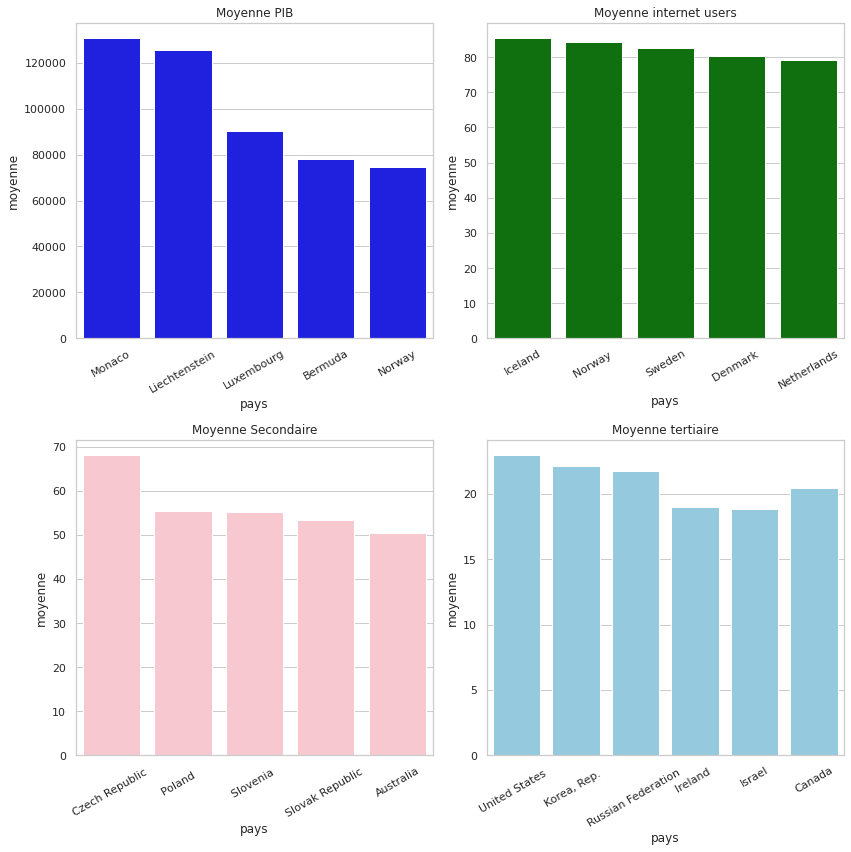

In [475]:
# graphiques moyenne pays par indicateur

#Pib
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.xticks(rotation=30)
sns.barplot(data=pib, x=pib['pays'], y=pib['moyenne'],  color="blue")
plt.title("Moyenne PIB")


#Internet users per 100

plt.subplot(2,2,2)
plt.xticks(rotation=30)
sns.barplot(data=intu, x=intu['pays'], y=intu['moyenne'],color="green")
plt.title("Moyenne internet users")



# Popluation age +15 ans sencodaire complete
plt.subplot(2,2,3)
plt.xticks(rotation=30)
sns.barplot(data=sec, x=sec['pays'], y=sec['moyenne'],  color="pink")
plt.title("Moyenne Secondaire")


# Popluation age +15 ans tertiaire complete

plt.subplot(2,2,4)
plt.xticks(rotation=30)
sns.barplot(data=ter, x=ter['pays'], y=ter['moyenne'],color="skyblue")
plt.title("Moyenne tertiaire")


plt.tight_layout()
plt.show()




In [476]:
ter

pays  moyenne  mediane  ecart_type
0      United States      22.97    22.97    2.373373
1        Korea, Rep.      22.09    22.09    5.662511
2  Russian Federation     21.77    21.77    2.718989
3             Ireland     19.01    20.47    5.254582
4               Israel    18.80    18.80    1.002464
5               Canada    20.47    20.47    4.568457

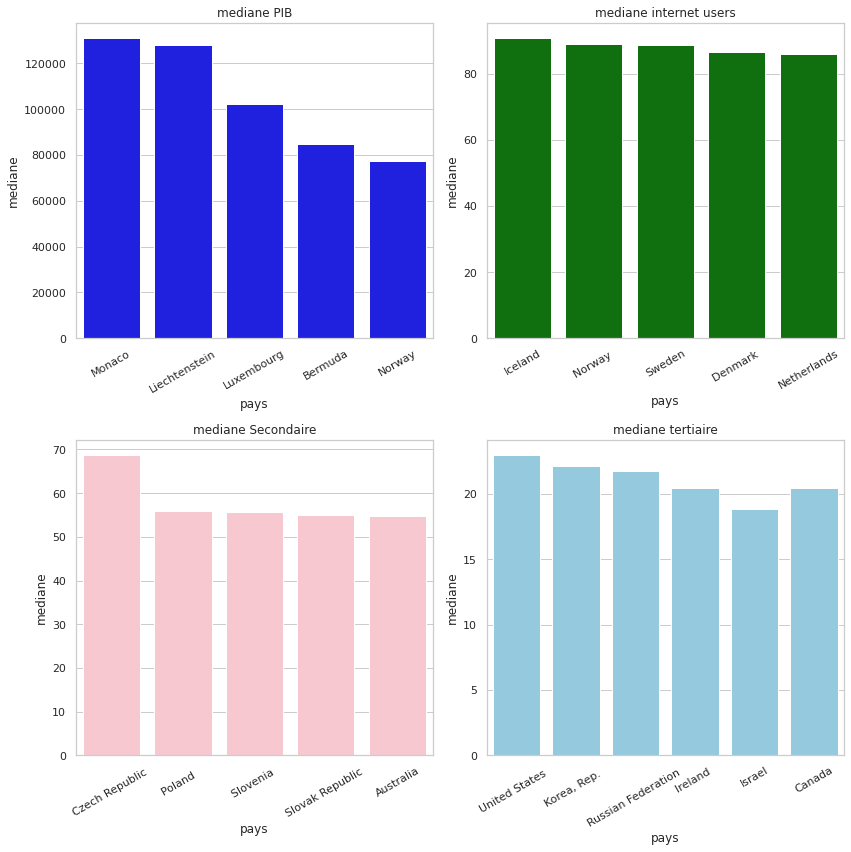

In [477]:
# graphiques mediane pays par indicateur

#Pib
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.xticks(rotation=30)
sns.barplot(data=pib, x=pib['pays'], y=pib['mediane'],  color="blue")
plt.title("mediane PIB")


#Internet users
plt.subplot(2,2,2)
plt.xticks(rotation=30)
sns.barplot(data=intu, x=intu['pays'], y=intu['mediane'],color="green")
plt.title("mediane internet users")



# Popluatio age +15 ans sencodaire complete
plt.subplot(2,2,3)
plt.xticks(rotation=30)
sns.barplot(data=sec, x=sec['pays'], y=sec['mediane'],  color="pink")
plt.title("mediane Secondaire")


# Popluatio age +15 ans tertiaire complete

plt.subplot(2,2,4)
plt.xticks(rotation=30)
sns.barplot(data=ter, x=ter['pays'], y=ter['mediane'],color="skyblue")
plt.title("mediane tertiaire")


plt.tight_layout()
plt.show()

# **Conclusion**




creer une fonction moyenne par pays sur les années
par indicateur
filtrer les pays qui sont au dessus de cette moyenne 

#Previsions

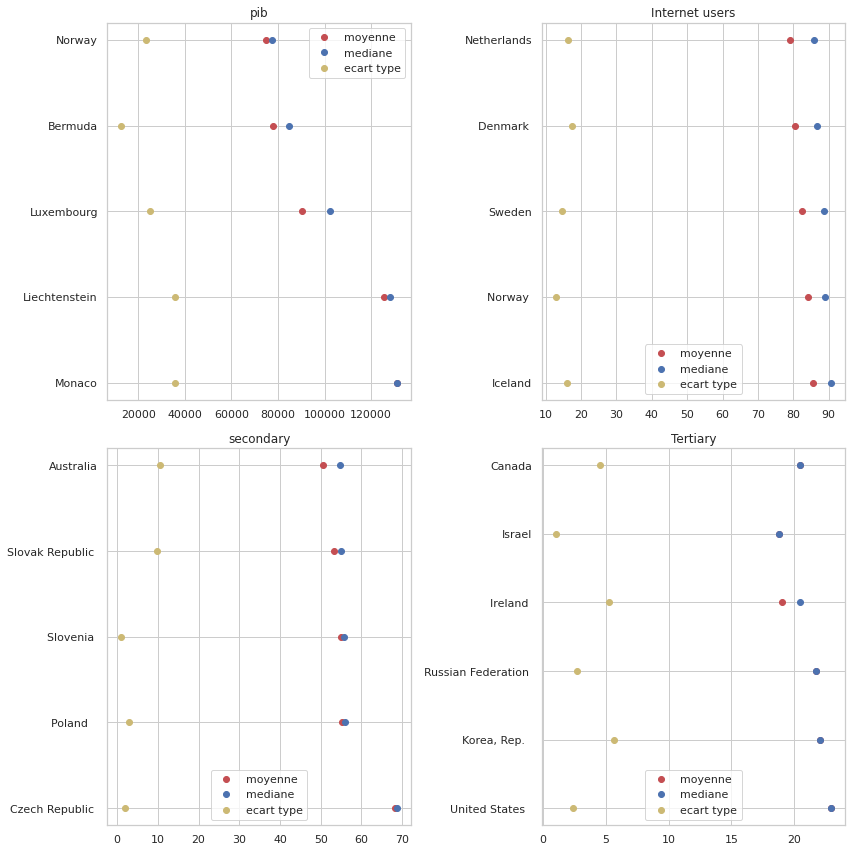

In [478]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(pib['moyenne'],pib['pays'],"or", label = 'moyenne') 
plt.plot(pib['mediane'],pib['pays'],"ob", label = 'mediane')
plt.plot(pib['ecart_type'],pib['pays'],"oy", label = 'ecart type')  
plt.legend()
plt.title('pib')


plt.subplot(2,2,3)
plt.plot(sec['moyenne'],sec['pays'],"or", label = 'moyenne') 
plt.plot(sec['mediane'],sec['pays'],"ob", label = 'mediane')  
plt.plot(sec['ecart_type'],sec['pays'],"oy", label = 'ecart type')  
plt.legend()
plt.title('secondary')

plt.subplot(2,2,2)
plt.plot(intu['moyenne'],intu['pays'],"or", label = 'moyenne') 
plt.plot(intu['mediane'],intu['pays'],"ob", label = 'mediane')  
plt.plot(intu['ecart_type'],intu['pays'],"oy", label = 'ecart type')  
plt.legend()
plt.title('Internet users')

plt.subplot(2,2,4)
plt.plot(ter['moyenne'],ter['pays'],"or", label = 'moyenne') 
plt.plot(ter['mediane'],ter['pays'],"ob", label = 'mediane')  
plt.plot(ter['ecart_type'],ter['pays'],"oy", label = 'ecart type')  
plt.legend()
plt.title('Tertiary')



plt.tight_layout()
plt.show()

## Dataset

# Construisons notre dataset

Pour cette etude nous abandonnons l'indicateur tertiaire vu que nous avons beaucoup de valeurs manquantes.

Nous allons aussi abandonner des pays tels que Monaco ou bermudes a cause des valeiurs manquantes.

Pour notre regression linéaire nous retirons les pays avec des valeurs manquantes de tous les indicateurs.

In [479]:
T = np.array(data_gpd.drop(['Country Code', 'Country Name', 'Indicator Name'], axis =1).columns)
T

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype=object)

In [480]:
countries = ['Norway', 'Sweden', 'Denmark', 'Netherlands','Czech Republic', 'Poland', 'Slovenia', 'Slovak Republic', 'Australia','Liechtenstein', 'Luxembourg' ]

## PIB



In [481]:
# Prévisions selon PIB

for x in countries :
    X = np.array(data_gpd2[x]).reshape(-1,1)
    y = T
    reg = LinearRegression().fit(X, y)
    reg.score(X, y)
    prediction = reg.predict(np.array([2020,2025,2030]).reshape(-1,1))
    print(x, prediction)


Norway [1994.66827189 1994.66915441 1994.67003694]
Sweden [1990.65824037 1990.66012054 1990.66200071]
Denmark [1990.54260759 1990.54433303 1990.54605847]
Netherlands [1991.54587453 1991.54777345 1991.54967237]
Czech Republic [1997.59765335 1997.60129111 1997.60492886]
Poland [1997.883297   1997.88926512 1997.89523323]
Slovenia [1995.09697947 1995.10045366 1995.10392786]
Slovak Republic [1997.21873815 1997.22316701 1997.22759588]
Australia [1996.7871666  1996.78847544 1996.78978427]
Liechtenstein [1991.43783542 1991.43848685 1991.43913828]
Luxembourg [1992.52023856 1992.52108607 1992.52193358]


## Internet user

In [482]:
# Prévisions selon Internet user per 100

for x in countries :
    X = np.array(data_int2[x]).reshape(-1,1)
    y = T
    reg = LinearRegression().fit(X, y)
    reg.score(X, y)
    prediction = reg.predict(np.array([2020,2025,2030]).reshape(-1,1))
    print(x, prediction) 

Norway [2666.6662841  2668.36892226 2670.07156042]
Sweden [2521.18502429 2522.51068475 2523.8363452 ]
Denmark [2463.20437583 2464.37915891 2465.553942  ]
Netherlands [2515.92155673 2517.23139133 2518.54122593]
Czech Republic [2407.19617874 2408.21119923 2409.22621971]
Poland [2448.86191291 2449.97942108 2451.09692924]
Slovenia [2487.43662311 2488.65660985 2489.8765966 ]
Slovak Republic [2392.78078119 2393.76268542 2394.74458965]


ValueError: ignored

## Secondary

In [ ]:
# Prévisions selon Internet user per 100

for x in countries :
    X = np.array(data_PHS152[x]).reshape(-1,1)
    y = ['2000', '2005', '2010']
    reg = LinearRegression().fit(X, y)
    reg.score(X, y)
    prediction = reg.predict(np.array([2020,2025,2030]).reshape(-1,1))
    print(x, prediction)

Nous remarquons selon l'erreur que le nombre de valeurs manquantes impacte notre etude 

et donc Nous abondonnons cet indicateur

## Tertiaire

Vu le nombre de valeur manquantes, toute prediction n'est pas fiable.

# Conclusion:

Les pays les plus interessants (top 3):


*   Norway
*   Sweden
*   Denmark





